#FASE 0: Configuración inicial

In [1]:
# %%capture
# !pip install upsetplot

In [2]:
# %%capture
# !pip install feature_engine

In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import plot, from_indicators
from upsetplot import UpSet, from_indicators

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [5]:
from sklearn.compose import ColumnTransformer

In [6]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import WoEEncoder
from feature_engine.selection import DropCorrelatedFeatures


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

In [8]:
from sklearn.experimental import enable_iterative_imputer  # 👈 habilita la clase experimental
from sklearn.impute import IterativeImputer

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [10]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [13]:
import joblib

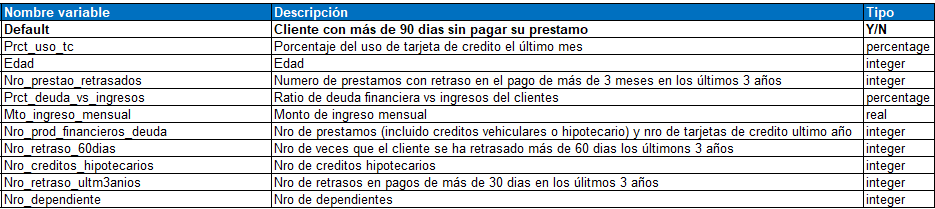

## **1. Entendimiento y Analisis Exploratorio de datos**

In [14]:
df_clase = pd.read_csv('Base de Datos_CS.csv', sep = ";")
df_clase.head(10)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


## 2. EDA

In [15]:
df_clase.shape

(150000, 12)

In [16]:
df_clase=df_clase.drop(['ID'], axis=1)
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Default                     150000 non-null  int64  
 1   Prct_uso_tc                 150000 non-null  float64
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Prct_deuda_vs_ingresos      150000 non-null  float64
 5   Mto_ingreso_mensual         120269 non-null  float64
 6   Nro_prod_financieros_deuda  150000 non-null  int64  
 7   Nro_retraso_60dias          150000 non-null  int64  
 8   Nro_creditos_hipotecarios   150000 non-null  int64  
 9   Nro_retraso_ultm3anios      150000 non-null  int64  
 10  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [17]:
df_clase

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [18]:
df_clase['Default'].value_counts(normalize=True)

Default
0    0.93316
1    0.06684
Name: proportion, dtype: float64

In [19]:
def crear_categorias_credito(df):
    df = df.copy()
    # 1️⃣ Prct_uso_tc
    df["Prct_uso_tc_cat"] = pd.cut(
        df["Prct_uso_tc"],
        bins=[-np.inf, 0.25, 0.75, 1, 10, np.inf],
        labels=["Muy Bajo", "Bajo", "Moderado", "Alto", "Extremo"]
    )
    # 2️⃣ Edad
    df["Edad_cat"] = pd.cut(
        df["Edad"],
        bins=[0, 30, 40, 50, 60,70,80 ,np.inf],
        labels=["<30", "30-40", "41-50", "51-60", "60-70","70-80",">80"]
    )
    # 4️⃣ Prct_deuda_vs_ingresos
    df["Prct_deuda_vs_ingresos_cat"] = pd.cut(
        df["Prct_deuda_vs_ingresos"],
        bins=[-np.inf, 0.3, 0.6, 1, 2, np.inf],
        labels=["Muy Bajo", "Bajo", "Medio", "Alto", "Extremo"]
    )
    # 5️⃣ Mto_ingreso_mensual
    df["Ingreso_cat"] = pd.cut(
        df["Mto_ingreso_mensual"],
        bins=[-np.inf, 3000, 6000, 10000, np.inf],
        labels=["Bajo", "Medio", "Alto", "Muy Alto"]
    )

    return df


In [20]:
df_clase = crear_categorias_credito(df_clase)

# Buen_Pagador: 139974
# 1 Mora_12M: 10026
Bad rate: 0.06684


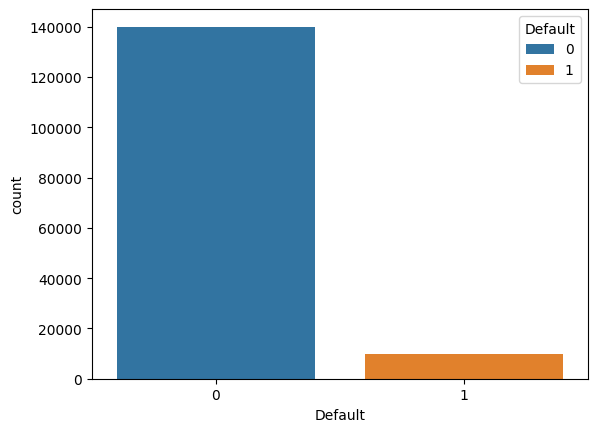

In [21]:
sns.countplot(data = df_clase, x = "Default", hue="Default")
target_count = df_clase.Default.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

In [22]:
#Muestreo
#df_clase_train, df_clase_test = train_test_split(df_clase, test_size=0.99, random_state=42, stratify=df_clase['Default'])    

##2.Analisis Univariado

In [23]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
Default,0,0.000000
Prct_uso_tc,0,0.000000
Edad,0,0.000000
Nro_prestao_retrasados,0,0.000000
Prct_deuda_vs_ingresos,0,0.000000
Mto_ingreso_mensual,29731,0.198207
Nro_prod_financieros_deuda,0,0.000000
Nro_retraso_60dias,0,0.000000
Nro_creditos_hipotecarios,0,0.000000
Nro_retraso_ultm3anios,0,0.000000


In [24]:
df_clase.columns

Index(['Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Prct_uso_tc_cat', 'Edad_cat',
       'Prct_deuda_vs_ingresos_cat', 'Ingreso_cat'],
      dtype='object')

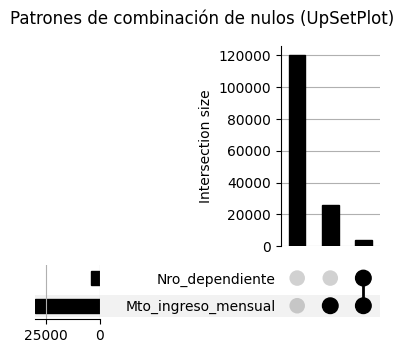

In [25]:
# 1. Filtrar columnas con al menos un nulo
feactures=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente']

columnas_con_nulos = df_clase[feactures].columns[df_clase[feactures].isnull().any()]

# 2. Crear DataFrame booleano
nulos_bool = df_clase[columnas_con_nulos].isnull()

# 3. Generar Series con MultiIndex y contar ocurrencias
upset_data = from_indicators(indicators=nulos_bool, data=pd.Series(1, index=nulos_bool.index))
upset_counts = upset_data.groupby(level=list(range(nulos_bool.shape[1]))).count()

# 4. Graficar
UpSet(upset_counts).plot()
plt.suptitle("Patrones de combinación de nulos (UpSetPlot)")
plt.show()

In [26]:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Default,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
Prct_uso_tc,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
Edad,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
Nro_prestao_retrasados,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
Prct_deuda_vs_ingresos,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
Mto_ingreso_mensual,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
Nro_prod_financieros_deuda,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
Nro_retraso_60dias,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
Nro_creditos_hipotecarios,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
Nro_retraso_ultm3anios,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


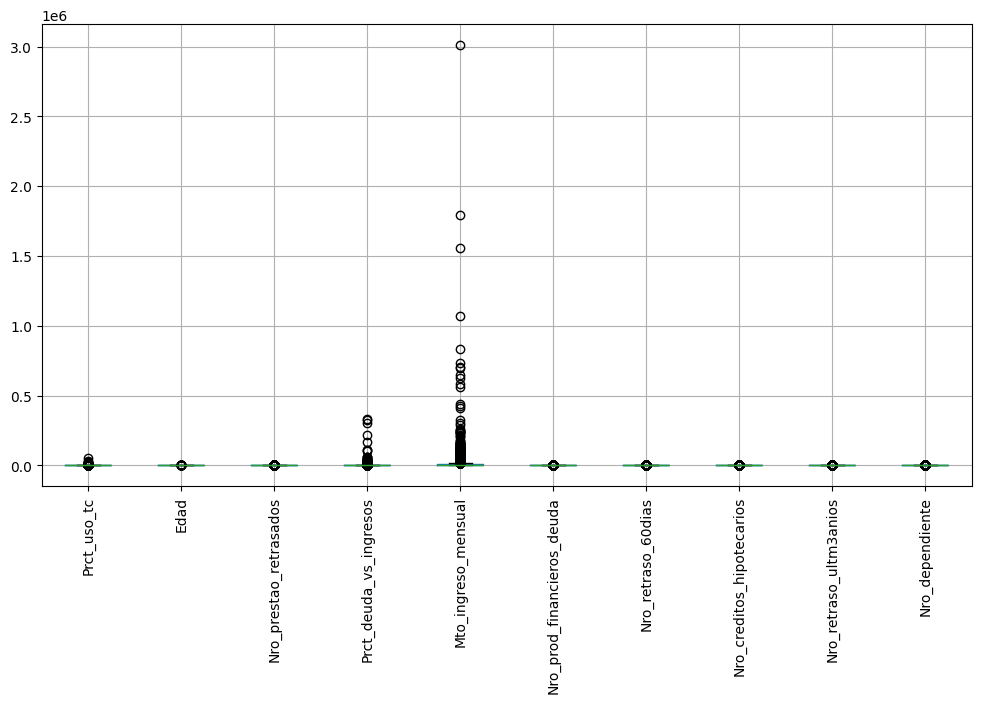

In [27]:
df_clase[feactures].boxplot(figsize=(12, 6))
plt.xticks(rotation=90)  # 🔹 Rotar etiquetas del eje X a 90 grados
plt.show()

In [28]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 5)
      q3 = stats.scoreatpercentile(df[columna], 95)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))
      print("Límites: [{:.2f}, {:.2f}]".format(lim_inf, lim_sup))

In [29]:
df_clase.columns

Index(['Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente', 'Prct_uso_tc_cat', 'Edad_cat',
       'Prct_deuda_vs_ingresos_cat', 'Ingreso_cat'],
      dtype='object')

In [30]:
outliers_col(df_clase[['Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente']])

Default | 0 | 0
Límites: [-1.50, 2.50]
Prct_uso_tc | 0 | 311
Límites: [-1.50, 2.50]
Edad | 0 | 0
Límites: [-44.50, 151.50]
Nro_prestao_retrasados | 0 | 508
Límites: [-3.00, 5.00]
Prct_deuda_vs_ingresos | 0 | 776
Límites: [-3673.49, 6122.49]
Mto_ingreso_mensual | 0 | 0
Límites: [nan, nan]
Nro_prod_financieros_deuda | 0 | 50
Límites: [-22.00, 42.00]
Nro_retraso_60dias | 0 | 1540
Límites: [-1.50, 2.50]
Nro_creditos_hipotecarios | 0 | 302
Límites: [-4.50, 7.50]
Nro_retraso_ultm3anios | 0 | 755
Límites: [-1.50, 2.50]
Nro_dependiente | 0 | 2
Límites: [-6.00, 10.00]


## **3. Feature Engineering**

### 3.1 Tratamiento de Outlier principales:
####Según el caso elegiremos detectas y tratas outliers preliminares

In [31]:
df_clase.describe().T

,count,mean,std,min,25%,50%,75%,max
Default,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
Prct_uso_tc,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
Edad,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
Nro_prestao_retrasados,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
Prct_deuda_vs_ingresos,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
Mto_ingreso_mensual,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
Nro_prod_financieros_deuda,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
Nro_retraso_60dias,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
Nro_creditos_hipotecarios,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
Nro_retraso_ultm3anios,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [32]:
# percentiles_ = np.arange(0.75, 1.0, 0.001)

# # Calcular los valores para la columna
# col = "Prct_deuda_vs_ingresos"
# percentile_values = df_clase[col].quantile(percentiles_).round(2)

# # Crear DataFrame para mostrar
# percentile_df = pd.DataFrame({
#     "Percentil (%)": (percentiles_ * 100).round(2),
#     "Valor": percentile_values.values
# })

# display(percentile_df)  # 👈 muestra la tabla

# # --- Gráfico ---
# plt.figure(figsize=(8,5))
# plt.plot(percentile_df["Percentil (%)"], percentile_df["Valor"], marker='o')
# plt.title(f"Distribución percentilar de {col}")
# plt.xlabel("Percentil (%)")
# plt.ylabel("Valor")
# plt.grid(True)
# plt.show()

In [33]:
# sns.scatterplot(data=df_limpio, x="Prct_deuda_vs_ingresos", y="Mto_ingreso_mensual", hue="Default")


In [34]:
percentiles_ = np.arange(0, 1.01, 0.01)
df_clase.describe(percentiles=percentiles_).round(2).T

,count,mean,std,min,0%,1%,2%,3%,4%,5%,...,92%,93%,94%,95%,96%,97%,98%,99%,100%,max
Default,150000.0,0.07,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,1.00,1.0,1.00,1.0,1.00,1.00,1.0,1.0
Prct_uso_tc,150000.0,6.05,249.76,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.00,1.00,1.0,1.00,1.0,1.01,1.09,50708.0,50708.0
Edad,150000.0,52.30,14.77,0.0,0.0,24.0,25.0,27.0,28.00,29.0,...,74.0,75.00,76.00,78.0,79.00,81.0,84.00,87.00,109.0,109.0
Nro_prestao_retrasados,150000.0,0.42,4.19,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.00,1.00,2.0,2.00,2.0,3.00,4.00,98.0,98.0
Prct_deuda_vs_ingresos,150000.0,353.01,2037.82,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1685.0,1917.07,2172.06,2449.0,2791.00,3225.0,3839.00,4979.04,329664.0,329664.0
Mto_ingreso_mensual,120269.0,6670.22,14384.67,0.0,0.0,0.0,250.0,800.0,1012.16,1300.0,...,12500.0,13000.00,13716.00,14587.6,15636.28,17000.0,19600.00,25000.00,3008750.0,3008750.0
Nro_prod_financieros_deuda,150000.0,8.45,5.15,0.0,0.0,0.0,1.0,1.0,1.00,2.0,...,16.0,17.00,17.00,18.0,19.00,20.0,22.00,24.00,58.0,58.0
Nro_retraso_60dias,150000.0,0.27,4.17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,1.0,1.00,1.0,2.00,3.00,98.0,98.0
Nro_creditos_hipotecarios,150000.0,1.02,1.13,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2.0,2.00,3.00,3.0,3.00,3.0,4.00,4.00,54.0,54.0
Nro_retraso_ultm3anios,150000.0,0.24,4.16,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,1.0,1.00,1.0,1.00,2.00,98.0,98.0


In [35]:
class PercentileOutlierRemover(BaseEstimator, TransformerMixin):
    """
    Elimina filas que contienen valores fuera de los percentiles definidos.
    Solo afecta columnas numéricas. Mantiene las categóricas sin tocar.
    """
    def __init__(self, percentiles=None):
        self.percentiles = percentiles or {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        self.bounds_ = {}

        # Calcular límites por columna numérica
        for col in X.select_dtypes(include=[np.number]).columns:
            p_low, p_high = self.percentiles.get(col, (0.01, 0.99))
            low = X[col].quantile(p_low)
            high = X[col].quantile(p_high)
            self.bounds_[col] = (low, high)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        mask = pd.Series(True, index=X.index)

        # Crear una máscara para cada columna numérica
        for col, (low, high) in self.bounds_.items():
            if col in X.columns:
                mask &= X[col].between(low, high) | X[col].isna()  # mantiene los NaN si existen

        n_removed = (~mask).sum()
        print(f"🧹 Filtradas {n_removed} filas con outliers ({round(n_removed / len(X) * 100, 2)}%)")
        return X[mask]


In [36]:
# 🔹 Definición de percentiles personalizados
percentiles = {
    'Prct_uso_tc': (0, .99),
    'Prct_deuda_vs_ingresos': (0.06, .79),
    'Mto_ingreso_mensual': (0.05, .955), #para que no elimine los NaN
    'Nro_retraso_60dias': (0, .99),
    'Nro_creditos_hipotecarios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_dependiente': (0, .99)
    
}
# 🔹 Crear pipeline
pipe_1 = Pipeline([
    ('remove_outliers', PercentileOutlierRemover(percentiles=percentiles))
])

# 🔹 Aplicar
df_limpio = pipe_1.fit_transform(df_clase)

print(f"Antes: {df_clase.shape}")
print(f"Después: {df_limpio.shape}")

🧹 Filtradas 53289 filas con outliers (35.53%)
Antes: (150000, 15)
Después: (96711, 15)


In [37]:
pipe_1

,steps,"[('remove_outliers', ...)]"
,transform_input,None
,memory,None
,verbose,False
,percentiles,"{'Mto_ingreso_mensual': (0.05, ...), 'Nro_creditos_hipotecarios': (0, ...), 'Nro_dependiente': (0, ...), 'Nro_retraso_60dias': (0, ...), ...}"


In [38]:
# 🔹 Aplicar transformación
df_limpio = pipe_1.fit_transform(df_clase)

print(f"Antes: {df_clase.shape}")
print(f"Después: {df_limpio.shape}")

🧹 Filtradas 53289 filas con outliers (35.53%)
Antes: (150000, 15)
Después: (96711, 15)


In [39]:
df_limpio

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,Moderado,30-40,Muy Bajo,Bajo
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,Bajo,30-40,Muy Bajo,Medio
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,Muy Bajo,<30,Muy Bajo,Medio
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,Muy Bajo,70-80,Bajo,Medio
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,Moderado,30-40,Muy Bajo,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0,Muy Bajo,51-60,Bajo,Muy Alto
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,Bajo,41-50,Bajo,Medio
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,Muy Bajo,70-80,Muy Bajo,Bajo
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,Bajo,41-50,Medio,Medio


In [40]:
percentiles_ = np.arange(0, 1.01, 0.01)
df_clase.describe(percentiles=percentiles_).T.round(2)

,count,mean,std,min,0%,1%,2%,3%,4%,5%,...,92%,93%,94%,95%,96%,97%,98%,99%,100%,max
Default,150000.0,0.07,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,1.00,1.0,1.00,1.0,1.00,1.00,1.0,1.0
Prct_uso_tc,150000.0,6.05,249.76,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.00,1.00,1.0,1.00,1.0,1.01,1.09,50708.0,50708.0
Edad,150000.0,52.30,14.77,0.0,0.0,24.0,25.0,27.0,28.00,29.0,...,74.0,75.00,76.00,78.0,79.00,81.0,84.00,87.00,109.0,109.0
Nro_prestao_retrasados,150000.0,0.42,4.19,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.00,1.00,2.0,2.00,2.0,3.00,4.00,98.0,98.0
Prct_deuda_vs_ingresos,150000.0,353.01,2037.82,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1685.0,1917.07,2172.06,2449.0,2791.00,3225.0,3839.00,4979.04,329664.0,329664.0
Mto_ingreso_mensual,120269.0,6670.22,14384.67,0.0,0.0,0.0,250.0,800.0,1012.16,1300.0,...,12500.0,13000.00,13716.00,14587.6,15636.28,17000.0,19600.00,25000.00,3008750.0,3008750.0
Nro_prod_financieros_deuda,150000.0,8.45,5.15,0.0,0.0,0.0,1.0,1.0,1.00,2.0,...,16.0,17.00,17.00,18.0,19.00,20.0,22.00,24.00,58.0,58.0
Nro_retraso_60dias,150000.0,0.27,4.17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,1.0,1.00,1.0,2.00,3.00,98.0,98.0
Nro_creditos_hipotecarios,150000.0,1.02,1.13,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2.0,2.00,3.00,3.0,3.00,3.0,4.00,4.00,54.0,54.0
Nro_retraso_ultm3anios,150000.0,0.24,4.16,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,1.0,1.00,1.0,1.00,2.00,98.0,98.0


In [41]:
percentiles_ = np.arange(0, 1.01, 0.01)
df_limpio.describe(percentiles=percentiles_).T.round(2)

,count,mean,std,min,0%,1%,2%,3%,4%,5%,...,92%,93%,94%,95%,96%,97%,98%,99%,100%,max
Default,96711.0,0.06,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00
Prct_uso_tc,96711.0,0.33,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.97,0.99,1.00,1.00,1.00,1.0,1.00,1.01,1.09,1.09
Edad,96711.0,51.00,13.61,24.00,24.00,26.00,27.00,28.00,29.00,30.00,...,71.00,72.00,73.00,75.00,76.00,78.0,80.00,82.00,87.00,87.00
Nro_prestao_retrasados,96711.0,0.24,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,2.00,2.00,2.0,2.00,3.00,4.00,4.00
Prct_deuda_vs_ingresos,96711.0,0.36,0.26,0.01,0.01,0.01,0.01,0.02,0.02,0.03,...,0.74,0.78,0.82,0.87,0.93,1.0,1.11,1.30,1.76,1.76
Mto_ingreso_mensual,96531.0,6058.79,3057.42,1300.00,1300.00,1500.00,1650.00,1800.00,1984.20,2004.00,...,11000.00,11332.00,11700.00,12009.00,12500.00,13000.0,13526.40,14300.00,15000.00,15000.00
Nro_prod_financieros_deuda,96711.0,8.81,4.53,0.00,0.00,1.00,2.00,2.00,2.00,3.00,...,16.00,16.00,17.00,17.50,18.00,19.0,20.00,22.00,24.00,24.00
Nro_retraso_60dias,96711.0,0.06,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.0,1.00,2.00,3.00,3.00
Nro_creditos_hipotecarios,96711.0,1.05,0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,2.00,2.00,3.00,3.00,3.0,3.00,4.00,4.00,4.00
Nro_retraso_ultm3anios,96711.0,0.05,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.0,1.00,1.00,2.00,2.00


<Axes: ylabel='Prct_deuda_vs_ingresos'>

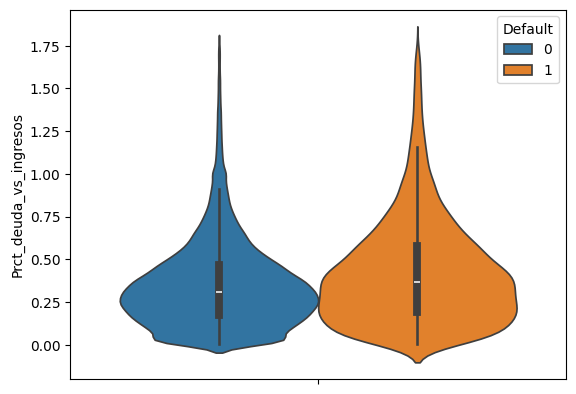

In [42]:
sns.violinplot(data=df_limpio, y="Prct_deuda_vs_ingresos", hue="Default")

<Axes: ylabel='Mto_ingreso_mensual'>

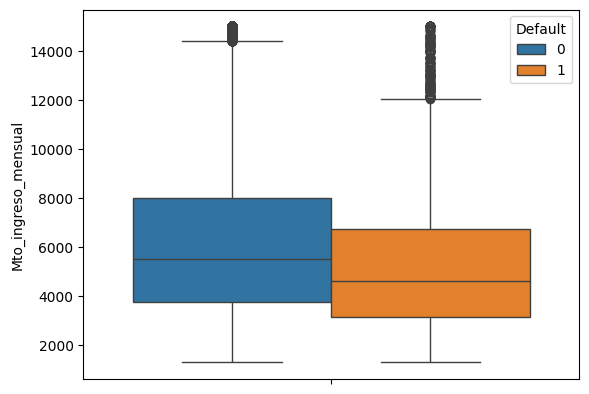

In [43]:
sns.boxplot(data=df_limpio, y="Mto_ingreso_mensual", hue="Default")

In [44]:
# # Crear categorías por rangos de Prct_deuda_vs_ingresos
# df_clase["Prct_deuda_cat"] = pd.cut(
#     df_clase["Prct_deuda_vs_ingresos"],
#     bins=[-float("inf"),0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 1, 1.5, 2, 3, 5, 10, 20, 50, 100, float("inf")],
#     labels=[
#         "0%",
#         "<=1%",
#         "1-5%",
#         "6-10%",
#         "11-20%",
#         "21-30%",
#         "31-40%",
#         "41-50%",
#         "51-60%",
#         "61-75%",
#         "76-100%",
#         "101-150%",
#         "151-200%",
#         "201-300%",
#         "301-500%",
#         "501-1000%",
#         "1001-2000%",
#         "2001-5000%",
#         "5001-10000%",
#         ">10000%"
#     ]

# )

# # Crear categorías por rangos de Prct_deuda_vs_ingresos
# df_limpio["Prct_deuda_cat"] = pd.cut(
#     df_limpio["Prct_deuda_vs_ingresos"],
#     bins=[-float("inf"),0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 1, 1.5, 2, 3, 5, 10, 20, 50, 100, float("inf")],
#     labels=[
#         "0%",
#         "<=1%",
#         "1-5%",
#         "6-10%",
#         "11-20%",
#         "21-30%",
#         "31-40%",
#         "41-50%",
#         "51-60%",
#         "61-75%",
#         "76-100%",
#         "101-150%",
#         "151-200%",
#         "201-300%",
#         "301-500%",
#         "501-1000%",
#         "1001-2000%",
#         "2001-5000%",
#         "5001-10000%",
#         ">10000%"
#     ]

# )

In [45]:
# df_clase.groupby("Prct_deuda_cat").agg({
#     "Mto_ingreso_mensual": ["max", "min","mean", "median", "size", lambda x: x.isnull().sum()],
#     "Nro_dependiente": ["max", "min","mean", "median", "size", lambda x: x.isnull().sum()],
#     "Nro_retraso_ultm3anios": ["max", "min","mean", "median", "size", lambda x: x.isnull().sum()],
#     "Default": ["mean", "size", lambda x: x.isnull().sum()]
# })

In [46]:
# df_limpio.groupby("Prct_deuda_cat").agg({
#     "Mto_ingreso_mensual": ["max", "min","mean", "median", "size", lambda x: x.isnull().sum()],
#     "Nro_dependiente": ["max", "min","mean", "median", "size", lambda x: x.isnull().sum()],
#     "Nro_retraso_ultm3anios": ["max", "min","mean", "median", "size", lambda x: x.isnull().sum()],
#     "Default": ["mean", "size", lambda x: x.isnull().sum()]
# })

### 3.2 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("Default", axis=1),
    df_clase["Default"],
    test_size=0.2, #Modificar por 0.2, cuando se necesite realizar toda la base
    random_state=0,
    stratify=df_clase["Default"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((120000, 14), (30000, 14))

In [48]:
X_train

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat
77522,0.000000,55,0,0.326553,6439.0,10,0,1,0,0.0,Muy Bajo,51-60,Bajo,Alto
49457,0.078184,54,0,0.141058,4366.0,4,0,0,0,2.0,Muy Bajo,51-60,Muy Bajo,Medio
114702,0.000000,35,0,0.366606,6000.0,5,0,1,0,0.0,Muy Bajo,30-40,Bajo,Medio
126322,1.000000,70,0,1.000000,NaN,0,0,0,0,0.0,Moderado,60-70,Medio,NaN
69315,0.399871,63,0,0.608568,10900.0,18,0,3,0,0.0,Bajo,60-70,Medio,Muy Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119587,0.546718,84,2,0.583658,4625.0,7,0,4,0,0.0,Bajo,>80,Bajo,Medio
89110,0.000000,71,0,0.471128,4900.0,12,0,1,0,0.0,Muy Bajo,70-80,Bajo,Medio
93992,0.218599,51,0,3521.000000,NaN,11,0,2,0,0.0,Muy Bajo,51-60,Extremo,NaN
20627,0.388499,54,0,0.473450,4500.0,8,0,1,0,2.0,Bajo,51-60,Bajo,Medio


In [49]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

np.float64(0.06684166666666666)

In [50]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

np.float64(0.06683333333333333)

In [51]:
# Revisión de la proporción de nulos por variable
X_train.isnull().mean().where(X_train.isnull().mean()>0)

Prct_uso_tc                        NaN
Edad                               NaN
Nro_prestao_retrasados             NaN
Prct_deuda_vs_ingresos             NaN
Mto_ingreso_mensual           0.197725
Nro_prod_financieros_deuda         NaN
Nro_retraso_60dias                 NaN
Nro_creditos_hipotecarios          NaN
Nro_retraso_ultm3anios             NaN
Nro_dependiente               0.026533
Prct_uso_tc_cat                    NaN
Edad_cat                      0.000008
Prct_deuda_vs_ingresos_cat         NaN
Ingreso_cat                   0.197725
dtype: float64

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 77522 to 5744
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Prct_uso_tc                 120000 non-null  float64 
 1   Edad                        120000 non-null  int64   
 2   Nro_prestao_retrasados      120000 non-null  int64   
 3   Prct_deuda_vs_ingresos      120000 non-null  float64 
 4   Mto_ingreso_mensual         96273 non-null   float64 
 5   Nro_prod_financieros_deuda  120000 non-null  int64   
 6   Nro_retraso_60dias          120000 non-null  int64   
 7   Nro_creditos_hipotecarios   120000 non-null  int64   
 8   Nro_retraso_ultm3anios      120000 non-null  int64   
 9   Nro_dependiente             116816 non-null  float64 
 10  Prct_uso_tc_cat             120000 non-null  category
 11  Edad_cat                    119999 non-null  category
 12  Prct_deuda_vs_ingresos_cat  120000 non-null  category
 13  In

In [53]:
class IterativeImputerDF(BaseEstimator, TransformerMixin):
    def __init__(self, estimator=None, initial_strategy="median", max_iter=10, random_state=None):
        self.estimator = estimator
        self.initial_strategy = initial_strategy
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        self.columns_ = X.columns
        self.imputer_ = IterativeImputer(
            estimator=self.estimator,
            initial_strategy=self.initial_strategy,
            max_iter=self.max_iter,
            random_state=self.random_state
        )
        self.imputer_.fit(X)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        X_imputed = self.imputer_.transform(X)
        return pd.DataFrame(X_imputed, columns=self.columns_, index=X.index)

In [54]:
class DataFrameRobustMinMaxScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pipeline = Pipeline([
            ('robust', RobustScaler()),
            ('minmax', MinMaxScaler(feature_range=(0, 1)))
        ])

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        self.columns_ = X.columns
        self.pipeline.fit(X)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        X_scaled = self.pipeline.transform(X)
        return pd.DataFrame(X_scaled, columns=self.columns_, index=X.index)

In [55]:
# 
# # Pipeline final
# pipe_2 = Pipeline([
#     # Si tienes pasos previos, los puedes incluir aquí:
#     ("pipe_1", pipe_1),
#     ("scaler", DataFrameMinMaxScaler()),
#     ("nn_imputer", IterativeImputerDF(
#         estimator=MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42),
#         initial_strategy="median",
#         max_iter=10,
#         random_state=42
#     ))
# ])

In [56]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

In [57]:
categorical_features

Index(['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat',
       'Ingreso_cat'],
      dtype='object')

In [58]:
class ColumnTransformerDF(ColumnTransformer):
    def fit(self, X, y=None):
        super().fit(X, y)
        self.feature_names_ = self.get_feature_names_out()
        return self

    def transform(self, X):
        X_trans = super().transform(X)
        return pd.DataFrame(X_trans, columns=self.feature_names_, index=X.index)


In [59]:
class ToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, columns, index=None):
        self.columns = columns
        self.index = index

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.columns, index=self.index)


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class DataFrameColumnTransformer(BaseEstimator, TransformerMixin):
    """
    ColumnTransformer que devuelve un DataFrame conservando:
    - índice original
    - nombres de columnas
    - tipos originales de columnas passthrough
    """
    def __init__(self, column_transformer):
        self.column_transformer = column_transformer
        self._dtypes_original = None

    def fit(self, X, y=None):
        # Guardar tipos originales antes de transformar
        self._dtypes_original = X.dtypes.to_dict()
        self.column_transformer.fit(X, y)
        return self

    def transform(self, X):
        X_t = self.column_transformer.transform(X)

        # Si el resultado ya es DataFrame
        if isinstance(X_t, pd.DataFrame):
            return X_t

        # Obtener columnas
        new_columns = []
        for name, trans, cols in self.column_transformer.transformers_:
            if name != 'remainder':
                new_columns.extend(cols)

        # Columnas passthrough
        passthrough_cols = []
        if self.column_transformer.remainder == 'passthrough':
            passthrough_cols = [c for c in X.columns if c not in new_columns]
            new_columns.extend(passthrough_cols)

        # Crear DataFrame
        df_out = pd.DataFrame(X_t, columns=new_columns, index=X.index)

        # Restaurar tipos de las columnas passthrough
        for col in passthrough_cols:
            dtype_orig = self._dtypes_original.get(col)
            if pd.api.types.is_numeric_dtype(dtype_orig):
                df_out[col] = pd.to_numeric(df_out[col], errors='coerce')
            elif pd.api.types.is_categorical_dtype(dtype_orig):
                df_out[col] = pd.Categorical(df_out[col])
            else:
                df_out[col] = df_out[col].astype(dtype_orig)

        # 🔹 Convertir numéricas que quedaron como object a float
        for col in df_out.columns:
            if df_out[col].dtype == "object":
                try:
                    df_out[col] = df_out[col].astype(float)
                except Exception:
                    pass

        return df_out


In [61]:
X_train_t1 = pipe_1.fit_transform(X_train)
X_test_t1 = pipe_1.fit_transform(X_test)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtradas 10695 filas con outliers (35.65%)


In [62]:
numeric_features

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [63]:

numeric_transformer = Pipeline([
    ("scaler", DataFrameRobustMinMaxScaler()),
    ("nn_imputer", IterativeImputerDF(
        estimator=MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42),
        initial_strategy="median",
        max_iter=10,
        random_state=42
    ))
])

# # 🔹 Ensamblar en un ColumnTransformer (solo aplica a numéricas)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Lo envolvemos para mantener DataFrame
preprocessor = DataFrameColumnTransformer(preprocessor)

# Y sigues igual con tu pipeline


In [64]:
# pipe_imputacion = Pipeline([
#     ("pipe_1", pipe_1),
#     ("mode_imputer", CategoricalImputer(
#         imputation_method="frequent",
#         variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat']
#     ))])
# pipe_2 = Pipeline([
#     ("pipe_imputacion", pipe_imputacion),
#     ("preprocessor", preprocessor)
# ]) 

In [65]:
pipe_2 = Pipeline([
    ('remove_outliers', PercentileOutlierRemover(percentiles=percentiles)),
    ("mode_imputer", CategoricalImputer(
        imputation_method="frequent",
        variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat']
    )),
    ("preprocessor", preprocessor)
]) 

In [66]:
X_train_t=pipe_1.fit_transform(X_train)
X_train_t.info()

🧹 Filtradas 42423 filas con outliers (35.35%)
<class 'pandas.core.frame.DataFrame'>
Index: 77577 entries, 77522 to 5744
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Prct_uso_tc                 77577 non-null  float64 
 1   Edad                        77577 non-null  int64   
 2   Nro_prestao_retrasados      77577 non-null  int64   
 3   Prct_deuda_vs_ingresos      77577 non-null  float64 
 4   Mto_ingreso_mensual         77432 non-null  float64 
 5   Nro_prod_financieros_deuda  77577 non-null  int64   
 6   Nro_retraso_60dias          77577 non-null  int64   
 7   Nro_creditos_hipotecarios   77577 non-null  int64   
 8   Nro_retraso_ultm3anios      77577 non-null  int64   
 9   Nro_dependiente             77529 non-null  float64 
 10  Prct_uso_tc_cat             77577 non-null  category
 11  Edad_cat                    77577 non-null  category
 12  Prct_deuda_vs_ingresos_cat  77

In [67]:
pipe_2

,steps,"[('remove_outliers', ...), ('mode_imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,percentiles,"{'Mto_ingreso_mensual': (0.05, ...), 'Nro_creditos_hipotecarios': (0, ...), 'Nro_dependiente': (0, ...), 'Nro_retraso_60dias': (0, ...), ...}"
,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['Prct_uso_tc_cat', 'Edad_cat', ...]"
,return_object,False
,ignore_format,False
,column_transformer,ColumnTransfo...e='object'))])


In [68]:
# 🔹 Aplicar
X_train_t2 = pipe_2.fit_transform(X_train)
X_train_t2.info()

🧹 Filtradas 42423 filas con outliers (35.35%)
<class 'pandas.core.frame.DataFrame'>
Index: 77577 entries, 77522 to 5744
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Prct_uso_tc                 77577 non-null  float64 
 1   Edad                        77577 non-null  float64 
 2   Nro_prestao_retrasados      77577 non-null  float64 
 3   Prct_deuda_vs_ingresos      77577 non-null  float64 
 4   Mto_ingreso_mensual         77577 non-null  float64 
 5   Nro_prod_financieros_deuda  77577 non-null  float64 
 6   Nro_retraso_60dias          77577 non-null  float64 
 7   Nro_creditos_hipotecarios   77577 non-null  float64 
 8   Nro_retraso_ultm3anios      77577 non-null  float64 
 9   Nro_dependiente             77577 non-null  float64 
 10  Prct_uso_tc_cat             77577 non-null  category
 11  Edad_cat                    77577 non-null  category
 12  Prct_deuda_vs_ingresos_cat  77

**Nota adicional**

El IterativeImputer luego entrena un modelo (regresor o clasificador) para predecir los valores faltantes basándose en las demás variables.

La estrategia inicial solo define el primer paso de imputación para poder arrancar el algoritmo iterativo.

In [69]:
#Esto activar
pipe_2.fit(X_train)
pipe_2.transform(X_train)
pipe_2.transform(X_train).describe().T.round(2)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtradas 42423 filas con outliers (35.35%)


,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,77577.0,0.30,0.31,0.0,0.04,0.17,0.51,1.0
Edad,77577.0,0.43,0.22,0.0,0.27,0.41,0.59,1.0
Nro_prestao_retrasados,77577.0,0.06,0.15,0.0,0.00,0.00,0.00,1.0
Prct_deuda_vs_ingresos,77577.0,0.21,0.15,0.0,0.10,0.18,0.27,1.0
Mto_ingreso_mensual,77577.0,0.35,0.22,-0.1,0.17,0.31,0.49,1.0
Nro_prod_financieros_deuda,77577.0,0.35,0.18,0.0,0.20,0.32,0.44,1.0
Nro_retraso_60dias,77577.0,0.02,0.11,0.0,0.00,0.00,0.00,1.0
Nro_creditos_hipotecarios,77577.0,0.26,0.23,0.0,0.00,0.25,0.50,1.0
Nro_retraso_ultm3anios,77577.0,0.03,0.12,0.0,0.00,0.00,0.00,1.0
Nro_dependiente,77577.0,0.21,0.27,-0.0,0.00,0.00,0.50,1.0


In [70]:
X_train_t2 = pipe_2.transform(X_train)
X_test_t2 = pipe_2.transform(X_test)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtradas 10740 filas con outliers (35.8%)


In [71]:
X_train_t2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77577 entries, 77522 to 5744
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Prct_uso_tc                 77577 non-null  float64 
 1   Edad                        77577 non-null  float64 
 2   Nro_prestao_retrasados      77577 non-null  float64 
 3   Prct_deuda_vs_ingresos      77577 non-null  float64 
 4   Mto_ingreso_mensual         77577 non-null  float64 
 5   Nro_prod_financieros_deuda  77577 non-null  float64 
 6   Nro_retraso_60dias          77577 non-null  float64 
 7   Nro_creditos_hipotecarios   77577 non-null  float64 
 8   Nro_retraso_ultm3anios      77577 non-null  float64 
 9   Nro_dependiente             77577 non-null  float64 
 10  Prct_uso_tc_cat             77577 non-null  category
 11  Edad_cat                    77577 non-null  category
 12  Prct_deuda_vs_ingresos_cat  77577 non-null  category
 13  Ingreso_cat       

In [72]:
percentiles_ = np.arange(0, 1.01, 0.05)
X_train_t2.describe(percentiles=percentiles_).T

,count,mean,std,min,0%,5%,10%,15%,20%,25%,...,60%,65%,70%,75%,80%,85%,90%,95%,100%,max
Prct_uso_tc,77577.0,0.297638,0.306941,0.000000,0.000000,0.000000,0.005792,0.015196,0.025507,0.037976,...,0.275252,0.340340,0.418256,0.508296,0.615501,0.735887,0.850826,0.914952,1.0,1.0
Edad,77577.0,0.428494,0.216102,0.000000,0.000000,0.095238,0.142857,0.190476,0.222222,0.269841,...,0.476190,0.507937,0.555556,0.587302,0.619048,0.666667,0.714286,0.809524,1.0,1.0
Nro_prestao_retrasados,77577.0,0.059322,0.154448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.500000,1.0,1.0
Prct_deuda_vs_ingresos,77577.0,0.205733,0.153745,0.000000,0.000000,0.013398,0.039325,0.060842,0.080114,0.097630,...,0.211607,0.229840,0.251039,0.274544,0.303479,0.342917,0.399568,0.503474,1.0,1.0
Mto_ingreso_mensual,77577.0,0.346780,0.223698,-0.103157,-0.103157,0.051095,0.087591,0.122628,0.146861,0.173139,...,0.363723,0.401460,0.441095,0.489051,0.534964,0.598540,0.671533,0.782496,1.0,1.0
Nro_prod_financieros_deuda,77577.0,0.353353,0.183314,0.000000,0.000000,0.120000,0.160000,0.160000,0.200000,0.200000,...,0.360000,0.400000,0.440000,0.440000,0.480000,0.560000,0.600000,0.720000,1.0,1.0
Nro_retraso_60dias,77577.0,0.021286,0.106719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
Nro_creditos_hipotecarios,77577.0,0.262871,0.231317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.250000,0.250000,0.500000,0.500000,0.500000,0.500000,0.750000,1.0,1.0
Nro_retraso_ultm3anios,77577.0,0.025929,0.124637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
Nro_dependiente,77577.0,0.210921,0.270232,-0.003011,-0.003011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.250000,0.250000,0.500000,0.500000,0.500000,0.500000,0.750000,1.0,1.0


### 3.3 Tratamiento de Outliers:

In [73]:
class OutlierRemoverCols(BaseEstimator, TransformerMixin):
    """
    Remueve outliers basados en un subconjunto de columnas.
    Soporta 'isolation_forest' o 'lof'.
    Retorna el DataFrame sin outliers.
    """
    def __init__(self, columns=None, method="isolation_forest", contamination=0.05, random_state=42):
        self.columns = columns  # lista de columnas a usar
        self.method = method
        self.contamination = contamination
        self.random_state = random_state

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        # Si no se especifican columnas, usa todas las numéricas
        self.columns_ = self.columns or X.select_dtypes(include=[np.number]).columns.tolist()

        # Entrenar el modelo en las columnas seleccionadas
        if self.method == "isolation_forest":
            self.model_ = IsolationForest(
                contamination=self.contamination, random_state=self.random_state
            )
            self.model_.fit(X[self.columns_])
        elif self.method == "lof":
            from sklearn.neighbors import LocalOutlierFactor
            self.model_ = LocalOutlierFactor(
                contamination=self.contamination, novelty=True
            )
            self.model_.fit(X[self.columns_])
        else:
            raise ValueError("Método no válido. Usa 'isolation_forest' o 'lof'.")
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        X_subset = X[self.columns_]
        pred = self.model_.predict(X_subset)
        mask = pred == 1  # 1 = normal, -1 = outlier
        print(f"🧹 Filtrados {np.sum(~mask)} outliers de {len(X)} filas totales usando columnas {self.columns_}.")
        return X.loc[mask]

In [74]:
pipe_3 = Pipeline([
    ('remove_outliers', PercentileOutlierRemover(percentiles={
    'Prct_uso_tc': (0, .99),
    'Prct_deuda_vs_ingresos': (0.06, .79),
    'Mto_ingreso_mensual': (0.05, .955), #para que no elimine los NaN
    'Nro_retraso_60dias': (0, .99),
    'Nro_creditos_hipotecarios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_dependiente': (0, .99)
})),
    ("mode_imputer", CategoricalImputer(
        imputation_method="frequent",
        variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat']
    )),
    ("preprocessor", preprocessor),
    ("outlier_final", OutlierRemoverCols(
    #columns=["Mto_ingreso_mensual", "Prct_deuda_vs_ingresos"], 
    columns=["Prct_deuda_vs_ingresos"],
    method="isolation_forest", 
    contamination=0.05
))
])

In [75]:
pipe_3.fit(X_train)

🧹 Filtradas 42423 filas con outliers (35.35%)


,steps,"[('remove_outliers', ...), ('mode_imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,percentiles,"{'Mto_ingreso_mensual': (0.05, ...), 'Nro_creditos_hipotecarios': (0, ...), 'Nro_dependiente': (0, ...), 'Nro_retraso_60dias': (0, ...), ...}"
,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['Prct_uso_tc_cat', 'Edad_cat', ...]"
,return_object,False
,ignore_format,False
,column_transformer,ColumnTransfo...e='object'))])


In [76]:
X_train_t3= pipe_3.transform(X_train)
X_test_t3= pipe_3.transform(X_test)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].
🧹 Filtradas 10740 filas con outliers (35.8%)
🧹 Filtrados 983 outliers de 19260 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


In [77]:
percentiles_ = np.arange(0, 1.01, 0.01)
X_train_t3.describe(percentiles=percentiles_).T

,count,mean,std,min,0%,1%,2%,3%,4%,5%,...,92%,93%,94%,95%,96%,97%,98%,99%,100%,max
Prct_uso_tc,73707.0,0.294052,0.305962,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.889528,0.906593,0.914952,0.914952,0.914952,0.914952,0.914952,0.921716,1.00000,1.00000
Edad,73707.0,0.428038,0.216447,0.00000,0.00000,0.031746,0.047619,0.063492,0.079365,0.095238,...,0.746032,0.761905,0.777778,0.809524,0.825397,0.857143,0.888889,0.920635,1.00000,1.00000
Nro_prestao_retrasados,73707.0,0.058502,0.153187,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.250000,0.250000,0.250000,0.500000,0.500000,0.500000,0.750000,1.00000,1.00000
Prct_deuda_vs_ingresos,73707.0,0.184106,0.116609,0.00036,0.00036,0.001744,0.003579,0.006018,0.009160,0.013543,...,0.371015,0.381764,0.393810,0.407199,0.422511,0.438658,0.459225,0.483622,0.51344,0.51344
Mto_ingreso_mensual,73707.0,0.355684,0.223264,0.00000,0.00000,0.014599,0.029197,0.042774,0.051095,0.058394,...,0.715328,0.744526,0.771361,0.790299,0.817518,0.854015,0.897810,0.952073,1.00000,1.00000
Nro_prod_financieros_deuda,73707.0,0.349988,0.182272,0.00000,0.00000,0.040000,0.080000,0.080000,0.080000,0.120000,...,0.640000,0.640000,0.680000,0.720000,0.720000,0.760000,0.800000,0.880000,1.00000,1.00000
Nro_retraso_60dias,73707.0,0.021314,0.106936,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.666667,1.00000,1.00000
Nro_creditos_hipotecarios,73707.0,0.255057,0.227207,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.750000,0.750000,0.750000,0.750000,1.000000,1.00000,1.00000
Nro_retraso_ultm3anios,73707.0,0.025785,0.124297,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,1.00000,1.00000
Nro_dependiente,73707.0,0.212039,0.270840,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,1.000000,1.000000,1.00000,1.00000


In [78]:
# pipe_3_ = Pipeline([
#     ('Pipe_2', pipe_2),
#     ("outliers", OutlierRemoverCols(
#     columns=["Nro_prestao_retrasados","Nro_prod_financieros_deuda"], 
#     method="isolation_forest", 
#     contamination=0.005)),
#     ("outlier_", OutlierRemoverCols(
#     columns=["Prct_deuda_vs_ingresos"], 
#     method="isolation_forest", 
#     contamination=0.005)),
# ])


# pipe_3_.fit(X_train_t2)

# X_train_t3_= pipe_3_.transform(X_train_t2)
# X_test_t3_= pipe_3_.transform(X_test_t2)

## **4. Feature Selection**
Planteemos algunos filtros básicos inicialmente

In [79]:
num_cols= X_train_t3.select_dtypes(include=['int64', 'float64']).columns
cat_cols= X_train_t3.select_dtypes(include=['object', 'category']).columns

In [80]:
constant_features_num = [feat for feat in X_train_t3[num_cols].columns if X_train_t3[feat].std() == 0]
len(constant_features_num)

0

In [81]:
constant_features_cat = [feat for feat in X_train_t3[cat_cols].columns if X_train_t3[feat].nunique() == 1]
len(constant_features_cat)

0

### 4.1 Cuasi constante

In [82]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train_t3[num_cols])

,threshold,0.01


In [83]:
sum(sel.get_support())

np.int64(10)

In [84]:
quasi_constant = X_train_t3[num_cols].columns[~sel.get_support()]
len(quasi_constant)

0

In [85]:
quasi_constant_feat = []
for feature in X_train_t3[cat_cols].columns:
    predominant = X_train[feature].value_counts(
        normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.99:
        quasi_constant_feat.append(feature)
len(quasi_constant_feat)

0

In [86]:
y_train = y_train.loc[X_train_t3.index]
y_test = y_test.loc[X_test_t3.index]

In [87]:
tot_train_t=pd.concat([X_train_t3[cat_cols], y_train], axis=1)
tot_train_t.head()

,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat,Default
77522,Muy Bajo,51-60,Bajo,Alto,0
49457,Muy Bajo,51-60,Muy Bajo,Medio,0
114702,Muy Bajo,30-40,Bajo,Medio,0
69315,Bajo,60-70,Medio,Muy Alto,0
54353,Muy Bajo,30-40,Bajo,Medio,0


### 4.2 Analisis WOE e IV

⚖️ Weight of Evidence (WoE)
El **WoE (Weight of Evidence)** mide la fuerza y dirección de la relación entre una variable independiente y una variable objetivo binaria (por ejemplo, *default* vs *no default*).

Para un grupo $i$:

$$ WoE_i = \ln \left( \frac{\% \text{ Buenos}_i}{\% \text{ Malos}_i} \right) $$

Donde:
- **% Buenos** = proporción de observaciones sin default en el grupo.
- **% Malos** = proporción de observaciones con default en el grupo.

🔹 Un WoE positivo indica menor riesgo (más "buenos").  
🔹 Un WoE negativo indica mayor riesgo (más "malos").

---

📊 Information Value (IV)

El **IV (Information Value)** evalúa la **capacidad predictiva total** de una variable:

$$ IV = \sum_i (\% \text{ Buenos}_i - \% \text{ Malos}_i) \times WoE_i $$

Interpretación común:

| IV | Significado |
|----|--------------|
| < 0.02 | No predictiva |
| 0.02 – 0.1 | Débil |
| 0.1 – 0.3 | Moderada |
| 0.3 – 0.5 | Fuerte |
| > 0.5 | Sospechosa o demasiado buena (posible sobreajuste) |

---

**En resumen:**
- *WoE* codifica cada categoría según su relación con el riesgo.  
- *IV* cuantifica cuán útil es la variable para predecir el default.

- **WoE (Weight of Evidence)**
- Es una forma de codificar variables categóricas o numéricas binned según su relación con la variable objetivo binaria (por ejemplo, default vs no default).
Mide la fuerza y dirección del efecto de cada grupo o categoría sobre la probabilidad de default.
Cuanto mayor el WoE (positivo o negativo), más fuerte es la relación.

- **IV (Information Value)**
- Mide la capacidad predictiva global de una variable respecto al objetivo.
Se calcula combinando las diferencias de proporciones de buenos y malos ponderadas por el WoE.
Cuanto mayor el IV, mayor la capacidad discriminante de la variable

In [88]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [89]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [90]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    #display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))
    return pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False)

In [91]:
iv_df_cat=getFeatureIV_Importance(tot_train_t,cat_cols,"Default")

In [92]:
iv_df_cat

,Feature,IV
0,Prct_uso_tc_cat,0.808671
1,Edad_cat,0.146256
3,Ingreso_cat,0.074474
2,Prct_deuda_vs_ingresos_cat,0.034591


In [93]:
#### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [94]:
len(cat_cols)

4

In [95]:
cat_cols_2=iv_df_cat[(iv_df_cat['IV'] > 0.02) & (iv_df_cat['IV'] < 0.5)]['Feature'].tolist()

In [96]:
cat_cols_2

['Edad_cat', 'Ingreso_cat', 'Prct_deuda_vs_ingresos_cat']

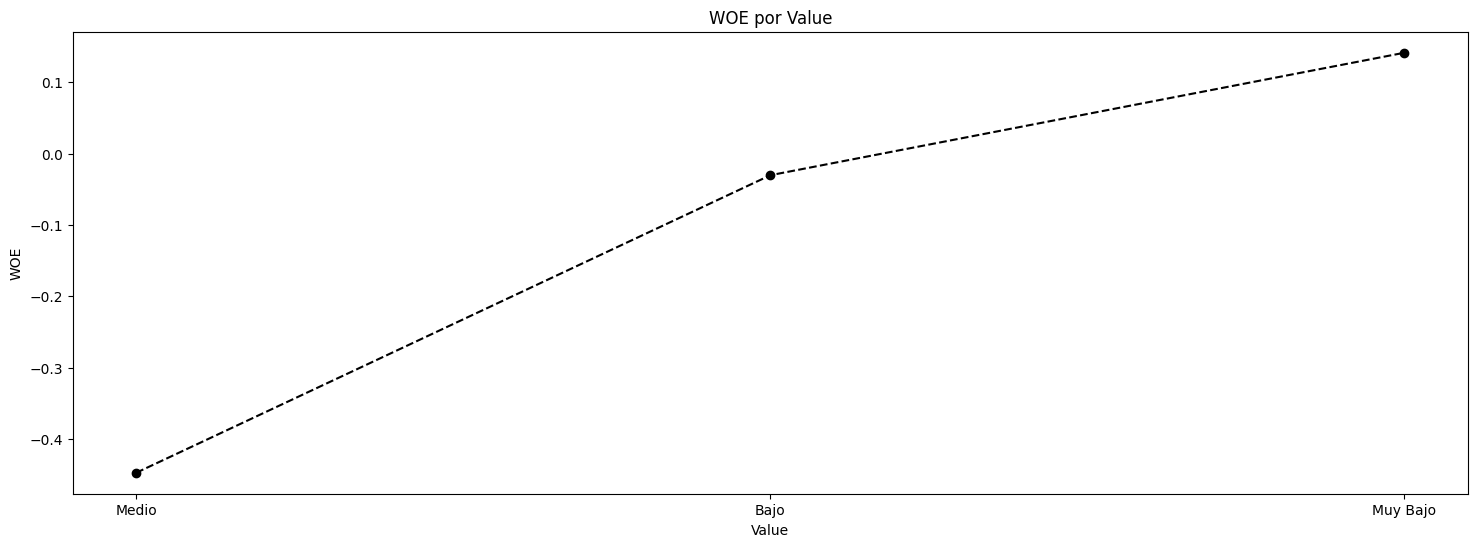

In [97]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'Prct_deuda_vs_ingresos_cat', 'Default')
plot_by_woe(ReporteWoe_v1)

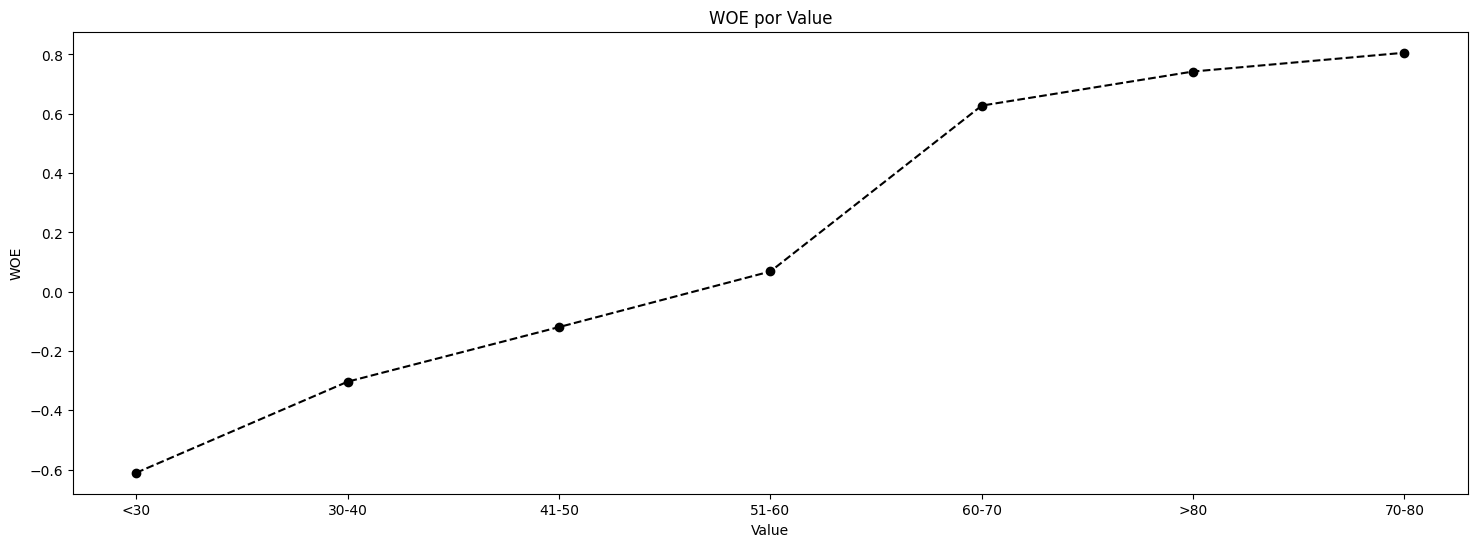

In [98]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'Edad_cat', 'Default')
plot_by_woe(ReporteWoe_v1)

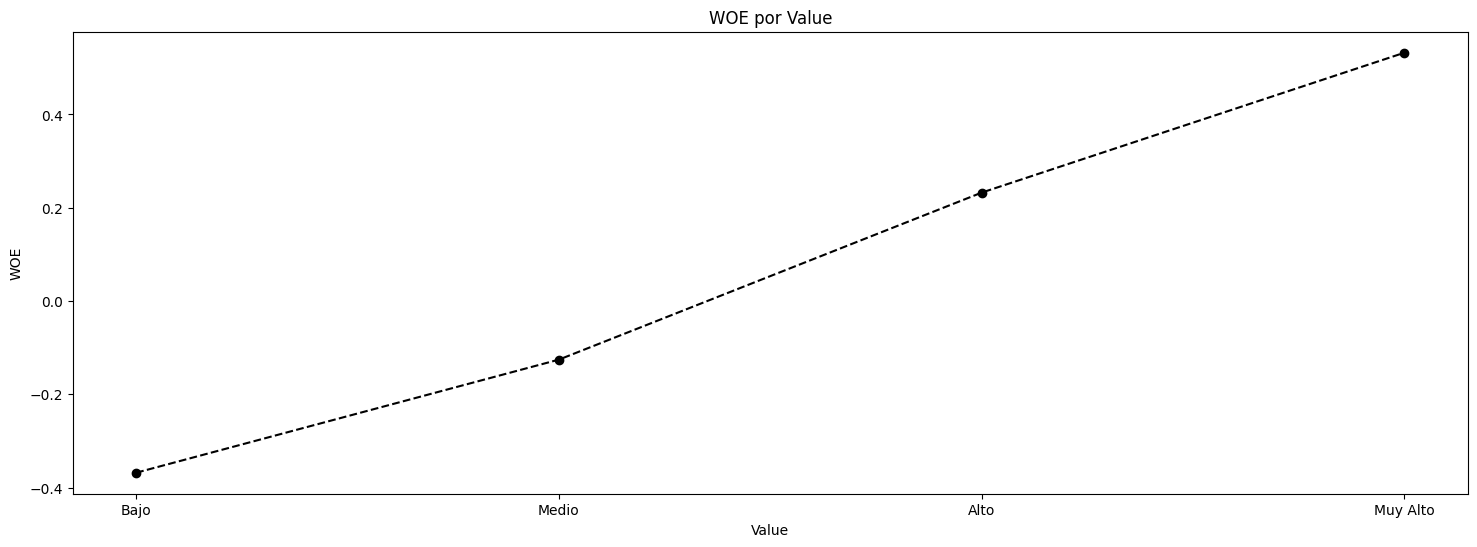

In [99]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'Ingreso_cat', 'Default')
plot_by_woe(ReporteWoe_v1)

### 4.2 Variables numéricas: 
En este punto discretizo para luego encontrar el IV de las variables

In [100]:
X_train

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat
77522,0.000000,55,0,0.326553,6439.0,10,0,1,0,0.0,Muy Bajo,51-60,Bajo,Alto
49457,0.078184,54,0,0.141058,4366.0,4,0,0,0,2.0,Muy Bajo,51-60,Muy Bajo,Medio
114702,0.000000,35,0,0.366606,6000.0,5,0,1,0,0.0,Muy Bajo,30-40,Bajo,Medio
126322,1.000000,70,0,1.000000,NaN,0,0,0,0,0.0,Moderado,60-70,Medio,NaN
69315,0.399871,63,0,0.608568,10900.0,18,0,3,0,0.0,Bajo,60-70,Medio,Muy Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119587,0.546718,84,2,0.583658,4625.0,7,0,4,0,0.0,Bajo,>80,Bajo,Medio
89110,0.000000,71,0,0.471128,4900.0,12,0,1,0,0.0,Muy Bajo,70-80,Bajo,Medio
93992,0.218599,51,0,3521.000000,NaN,11,0,2,0,0.0,Muy Bajo,51-60,Extremo,NaN
20627,0.388499,54,0,0.473450,4500.0,8,0,1,0,2.0,Bajo,51-60,Bajo,Medio


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 77522 to 5744
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Prct_uso_tc                 120000 non-null  float64 
 1   Edad                        120000 non-null  int64   
 2   Nro_prestao_retrasados      120000 non-null  int64   
 3   Prct_deuda_vs_ingresos      120000 non-null  float64 
 4   Mto_ingreso_mensual         96273 non-null   float64 
 5   Nro_prod_financieros_deuda  120000 non-null  int64   
 6   Nro_retraso_60dias          120000 non-null  int64   
 7   Nro_creditos_hipotecarios   120000 non-null  int64   
 8   Nro_retraso_ultm3anios      120000 non-null  int64   
 9   Nro_dependiente             116816 non-null  float64 
 10  Prct_uso_tc_cat             120000 non-null  category
 11  Edad_cat                    119999 non-null  category
 12  Prct_deuda_vs_ingresos_cat  120000 non-null  category
 13  In

In [102]:
X_train_t2.isnull().sum()

Prct_uso_tc                   0
Edad                          0
Nro_prestao_retrasados        0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
Prct_uso_tc_cat               0
Edad_cat                      0
Prct_deuda_vs_ingresos_cat    0
Ingreso_cat                   0
dtype: int64

In [103]:
X_train_t2.shape, X_train_t3.shape

((77577, 14), (73707, 14))

In [104]:
num_cols

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [105]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=list(X_train[num_cols].columns),
                                  return_boundaries=True,)
disc1.fit(X_train_t3[num_cols])

,variables,"['Prct_uso_tc', 'Edad', ...]"
,q,10
,return_object,False
,return_boundaries,True
,precision,3


In [106]:
num_cols

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [107]:
pipe_4 = Pipeline([
    ('remove_outliers', PercentileOutlierRemover(percentiles={
    'Prct_uso_tc': (0, .99),
    'Prct_deuda_vs_ingresos': (0.06, .79),
    'Mto_ingreso_mensual': (0.05, .955),
    'Nro_retraso_60dias': (0, .99),
    'Nro_creditos_hipotecarios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_dependiente': (0, .99)
})),
    ("mode_imputer", CategoricalImputer(
        imputation_method="frequent",
        variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat']
    )),
    ("preprocessor", preprocessor),
    ("outlier_final", OutlierRemoverCols(
        
    #columns=["Mto_ingreso_mensual", "Prct_deuda_vs_ingresos"], 
    columns=["Prct_deuda_vs_ingresos"],
    method="isolation_forest", 
    contamination=0.05)),
    ('Ecual_Freq_Disc', EqualFrequencyDiscretiser(q=10,
                                  variables=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],return_boundaries=True,))
])

In [108]:
X_train_t_numdisc=disc1.transform(X_train_t3[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t3[num_cols])

In [109]:
X_train_t4 = pipe_4.fit_transform(X_train)
X_test_t4 = pipe_4.transform(X_test)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].
🧹 Filtradas 10740 filas con outliers (35.8%)
🧹 Filtrados 983 outliers de 19260 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


In [110]:
# X_train_t4=disc1.transform(X_train_t3[num_cols])
# X_test_t4=disc1.transform(X_test_t3[num_cols])

In [111]:
X_train_t4

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat
77522,"(-inf, 0.00578]","(0.476, 0.556]","(-inf, 0.25]","(0.171, 0.202]","(0.314, 0.378]","(0.36, 0.44]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]",Muy Bajo,51-60,Bajo,Alto
49457,"(0.052, 0.0952]","(0.413, 0.476]","(-inf, 0.25]","(0.0774, 0.111]","(0.207, 0.263]","(-inf, 0.16]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(0.25, 0.5]",Muy Bajo,51-60,Muy Bajo,Medio
114702,"(-inf, 0.00578]","(0.143, 0.222]","(-inf, 0.25]","(0.202, 0.237]","(0.314, 0.378]","(0.16, 0.2]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]",Muy Bajo,30-40,Bajo,Medio
69315,"(0.268, 0.409]","(0.556, 0.619]","(-inf, 0.25]","(0.35, inf]","(0.673, inf]","(0.6, inf]","(-inf, inf]","(0.5, inf]","(-inf, inf]","(-inf, 0.25]",Bajo,60-70,Medio,Muy Alto
54353,"(0.00578, 0.0251]","(-inf, 0.143]","(-inf, 0.25]","(0.281, 0.35]","(0.156, 0.207]","(0.2, 0.24]","(-inf, inf]","(0.25, 0.5]","(-inf, inf]","(-inf, 0.25]",Muy Bajo,30-40,Bajo,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115229,"(0.00578, 0.0251]","(0.619, 0.714]","(-inf, 0.25]","(-inf, 0.0382]","(0.156, 0.207]","(0.24, 0.28]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]",Muy Bajo,60-70,Muy Bajo,Medio
119587,"(0.409, 0.607]","(0.714, inf]","(0.25, inf]","(0.281, 0.35]","(0.207, 0.263]","(0.24, 0.28]","(-inf, inf]","(0.5, inf]","(-inf, inf]","(-inf, 0.25]",Bajo,>80,Bajo,Medio
89110,"(-inf, 0.00578]","(0.714, inf]","(-inf, 0.25]","(0.237, 0.281]","(0.207, 0.263]","(0.44, 0.48]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]",Muy Bajo,70-80,Bajo,Medio
20627,"(0.268, 0.409]","(0.413, 0.476]","(-inf, 0.25]","(0.237, 0.281]","(0.207, 0.263]","(0.28, 0.32]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(0.25, 0.5]",Bajo,51-60,Bajo,Medio


In [112]:
X_train_t_numdisc

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
77522,"(-inf, 0.00578]","(0.476, 0.556]","(-inf, 0.25]","(0.171, 0.202]","(0.314, 0.378]","(0.36, 0.44]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]"
49457,"(0.052, 0.0952]","(0.413, 0.476]","(-inf, 0.25]","(0.0774, 0.111]","(0.207, 0.263]","(-inf, 0.16]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(0.25, 0.5]"
114702,"(-inf, 0.00578]","(0.143, 0.222]","(-inf, 0.25]","(0.202, 0.237]","(0.314, 0.378]","(0.16, 0.2]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]"
69315,"(0.268, 0.409]","(0.556, 0.619]","(-inf, 0.25]","(0.35, inf]","(0.673, inf]","(0.6, inf]","(-inf, inf]","(0.5, inf]","(-inf, inf]","(-inf, 0.25]"
54353,"(0.00578, 0.0251]","(-inf, 0.143]","(-inf, 0.25]","(0.281, 0.35]","(0.156, 0.207]","(0.2, 0.24]","(-inf, inf]","(0.25, 0.5]","(-inf, inf]","(-inf, 0.25]"
...,...,...,...,...,...,...,...,...,...,...
115229,"(0.00578, 0.0251]","(0.619, 0.714]","(-inf, 0.25]","(-inf, 0.0382]","(0.156, 0.207]","(0.24, 0.28]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]"
119587,"(0.409, 0.607]","(0.714, inf]","(0.25, inf]","(0.281, 0.35]","(0.207, 0.263]","(0.24, 0.28]","(-inf, inf]","(0.5, inf]","(-inf, inf]","(-inf, 0.25]"
89110,"(-inf, 0.00578]","(0.714, inf]","(-inf, 0.25]","(0.237, 0.281]","(0.207, 0.263]","(0.44, 0.48]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]"
20627,"(0.268, 0.409]","(0.413, 0.476]","(-inf, 0.25]","(0.237, 0.281]","(0.207, 0.263]","(0.28, 0.32]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(0.25, 0.5]"


In [113]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Default
77522,"(-inf, 0.00578]","(0.476, 0.556]","(-inf, 0.25]","(0.171, 0.202]","(0.314, 0.378]","(0.36, 0.44]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]",0
49457,"(0.052, 0.0952]","(0.413, 0.476]","(-inf, 0.25]","(0.0774, 0.111]","(0.207, 0.263]","(-inf, 0.16]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(0.25, 0.5]",0
114702,"(-inf, 0.00578]","(0.143, 0.222]","(-inf, 0.25]","(0.202, 0.237]","(0.314, 0.378]","(0.16, 0.2]","(-inf, inf]","(-inf, 0.25]","(-inf, inf]","(-inf, 0.25]",0
69315,"(0.268, 0.409]","(0.556, 0.619]","(-inf, 0.25]","(0.35, inf]","(0.673, inf]","(0.6, inf]","(-inf, inf]","(0.5, inf]","(-inf, inf]","(-inf, 0.25]",0
54353,"(0.00578, 0.0251]","(-inf, 0.143]","(-inf, 0.25]","(0.281, 0.35]","(0.156, 0.207]","(0.2, 0.24]","(-inf, inf]","(0.25, 0.5]","(-inf, inf]","(-inf, 0.25]",0


In [114]:
iv_df_num = getFeatureIV_Importance(tot_train_t2,num_cols,"Default")
iv_df_num

,Feature,IV
0,Prct_uso_tc,0.874459
2,Nro_prestao_retrasados,0.380833
1,Edad,0.165059
4,Mto_ingreso_mensual,0.083933
5,Nro_prod_financieros_deuda,0.054680
3,Prct_deuda_vs_ingresos,0.046327
9,Nro_dependiente,0.016271
7,Nro_creditos_hipotecarios,0.011731
6,Nro_retraso_60dias,0.000000
8,Nro_retraso_ultm3anios,0.000000


Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 2% y menor a 50%

In [115]:
# Filtrar entre 2% y 50%
num_cols_2 = iv_df_num[(iv_df_num['IV'] > 0.02) & (iv_df_num['IV'] < 0.5)]['Feature'].tolist()
num_cols_2


['Nro_prestao_retrasados',
 'Edad',
 'Mto_ingreso_mensual',
 'Nro_prod_financieros_deuda',
 'Prct_deuda_vs_ingresos']

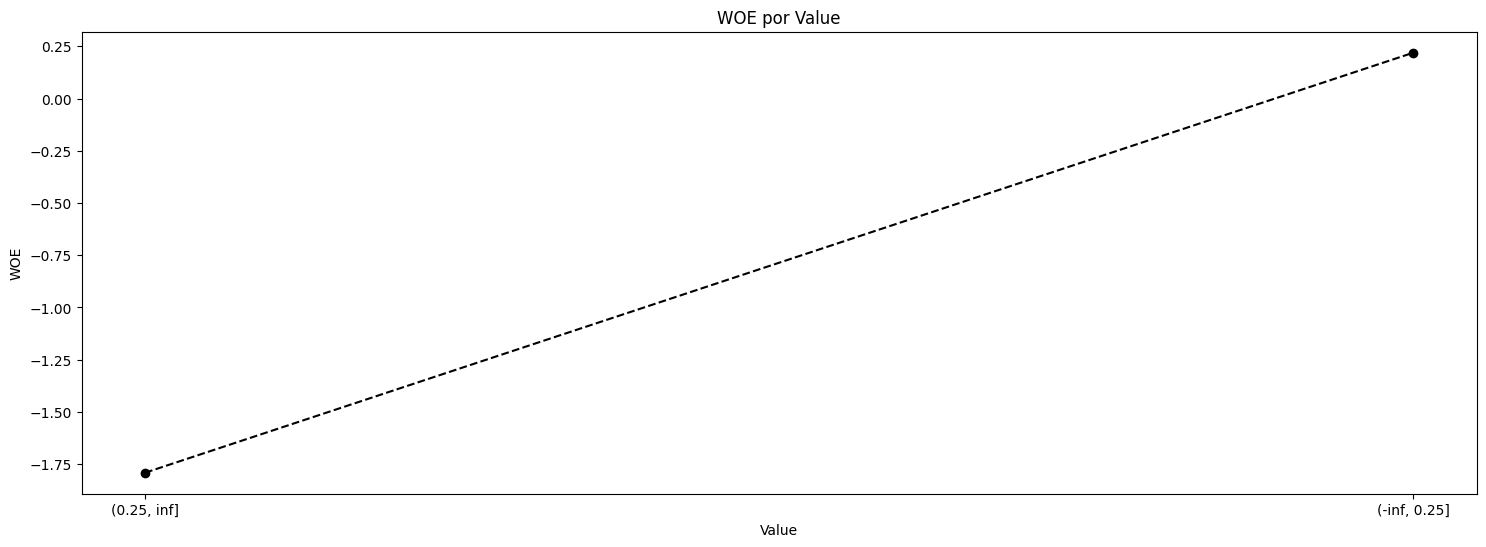

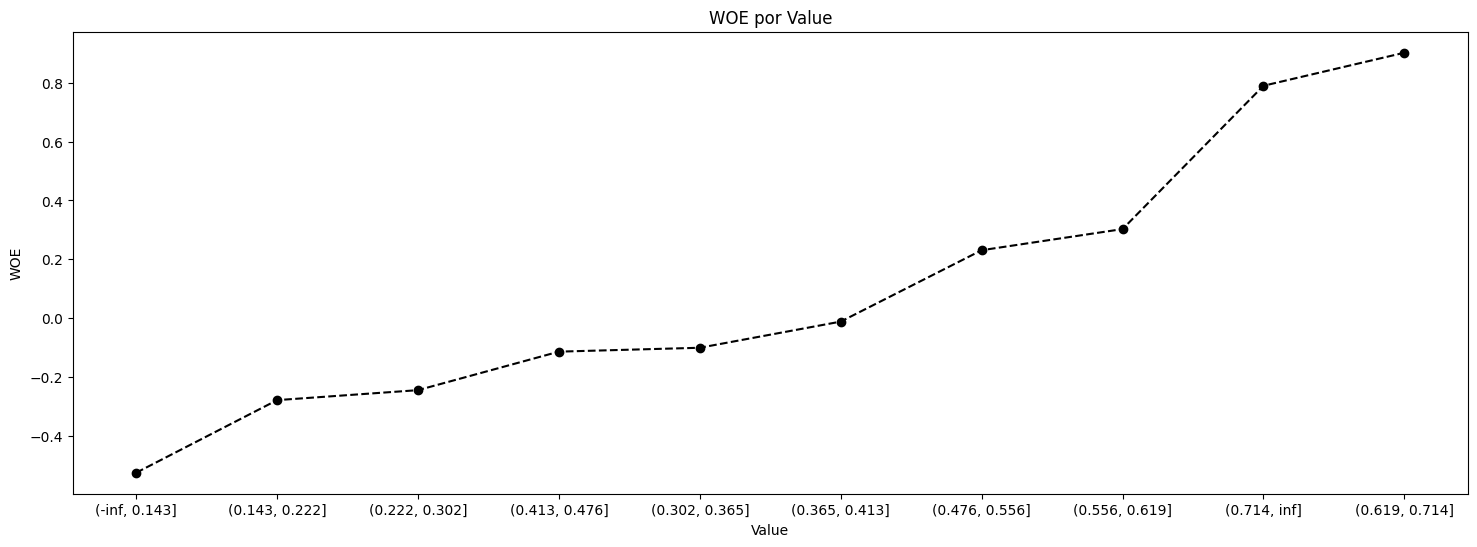

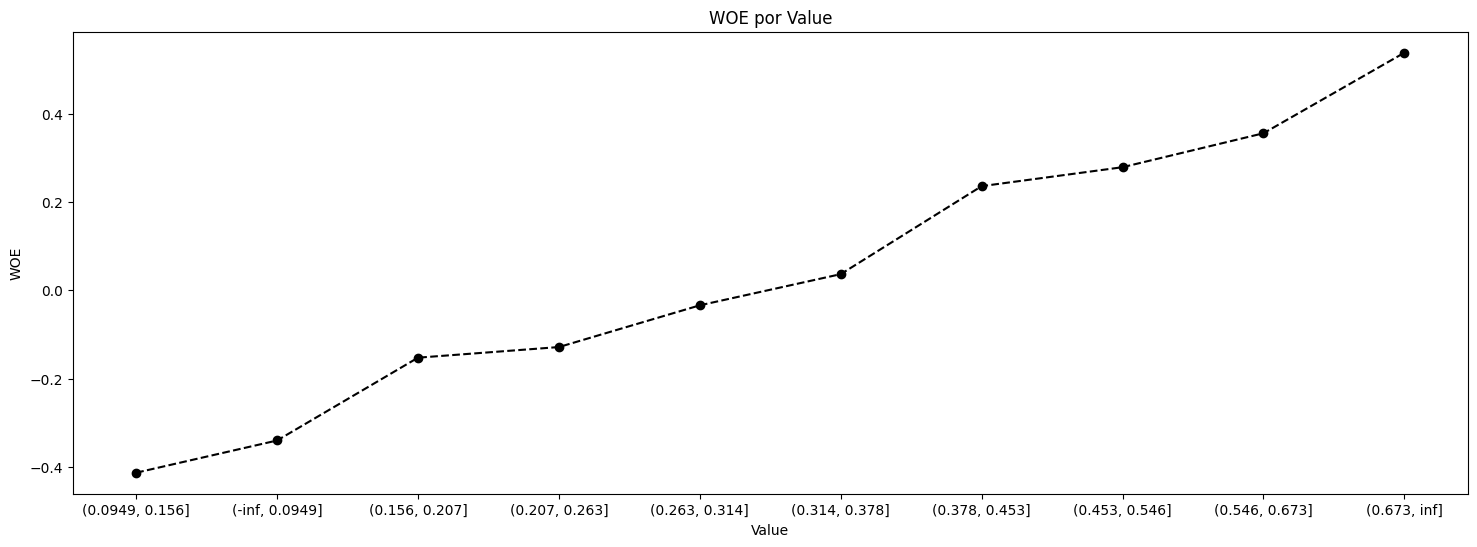

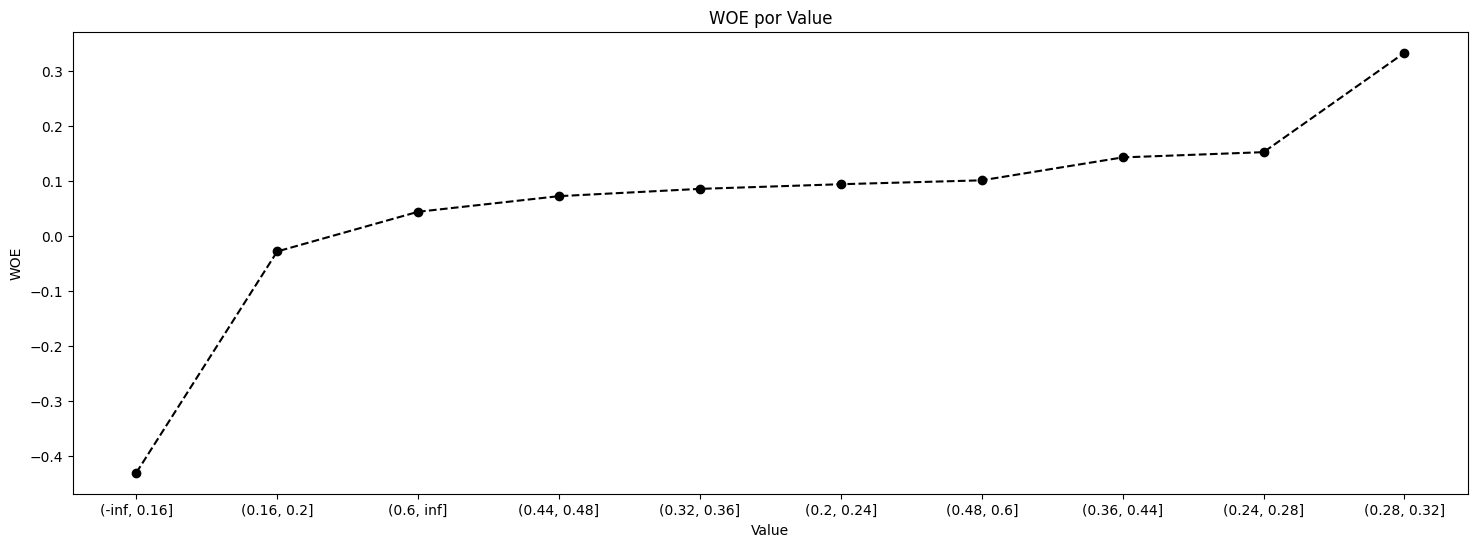

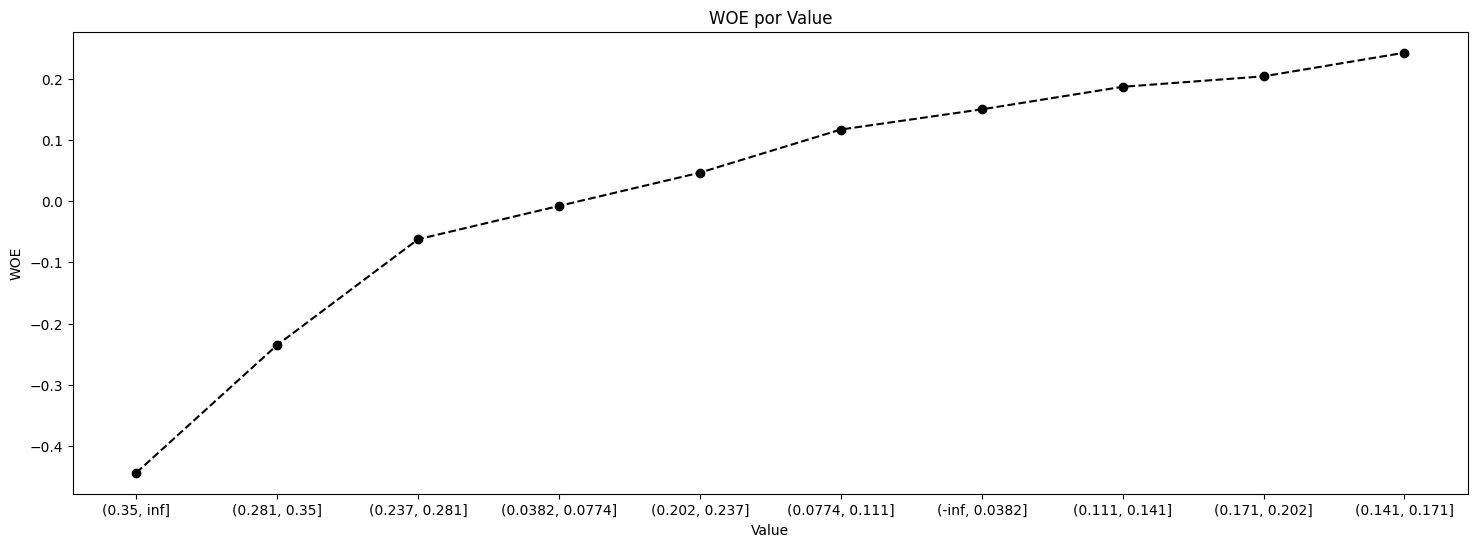

In [116]:
for i in num_cols_2:
    IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t2, i, 'Default')
    plot_by_woe(ReporteWoe_v1)

### 4.3 Codificación de variables

In [117]:
list(cat_cols)

['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat', 'Ingreso_cat']

In [118]:
pipe_5_woe = Pipeline([
    ('remove_outliers', PercentileOutlierRemover(percentiles={
    'Prct_uso_tc': (0, .99),
    'Prct_deuda_vs_ingresos': (0.06, .79),
    'Mto_ingreso_mensual': (0.05, .955),
    'Nro_retraso_60dias': (0, .99),
    'Nro_creditos_hipotecarios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_dependiente': (0, .99)
})),
    ("mode_imputer", CategoricalImputer(
        imputation_method="frequent",
        variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat']
    )),
    ("preprocessor", preprocessor),
    ("outlier_final", OutlierRemoverCols(
    #columns=["Mto_ingreso_mensual", "Prct_deuda_vs_ingresos"], 
    columns=["Prct_deuda_vs_ingresos"],
    method="isolation_forest", 
    contamination=0.05)),


    # ('Ecual_Freq_Disc', EqualFrequencyDiscretiser(q=10,
    #                                variables=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
    #     'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
    #     'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
    #     'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
    #     'Nro_dependiente'],return_boundaries=True,)),


    ("Woe", WoEEncoder(variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat'],fill_value=1e-1))
])

In [119]:
y_train=y_train.loc[pipe_3.transform(X_train).index]

pipe_5_woe.fit(X_train, y_train)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].
🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


,steps,"[('remove_outliers', ...), ('mode_imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,percentiles,"{'Mto_ingreso_mensual': (0.05, ...), 'Nro_creditos_hipotecarios': (0, ...), 'Nro_dependiente': (0, ...), 'Nro_retraso_60dias': (0, ...), ...}"
,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['Prct_uso_tc_cat', 'Edad_cat', ...]"
,return_object,False
,ignore_format,False
,column_transformer,ColumnTransfo...e='object'))])


In [120]:
y_train=y_train.loc[pipe_3.transform(X_train).index]
y_test=y_test.loc[pipe_3.transform(X_test).index]

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].
🧹 Filtradas 10740 filas con outliers (35.8%)
🧹 Filtrados 983 outliers de 19260 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


In [121]:

X_train_t5_woe = pipe_5_woe.transform(X_train)

X_test_t5_woe = pipe_5_woe.transform(X_test)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].
🧹 Filtradas 10740 filas con outliers (35.8%)
🧹 Filtrados 983 outliers de 19260 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


In [122]:
X_train_t5_woe

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat
77522,0.000000,0.492063,0.0,0.188150,0.375109,0.40,0.0,0.25,0.0,0.00,-1.007808,-0.068462,0.030323,-0.232504
49457,0.071535,0.476190,0.0,0.078992,0.223796,0.16,0.0,0.00,0.0,0.50,-1.007808,-0.068462,-0.141404,0.125464
114702,0.000000,0.174603,0.0,0.211720,0.343066,0.20,0.0,0.25,0.0,0.00,-1.007808,0.303252,0.030323,0.125464
69315,0.365863,0.619048,0.0,0.354108,0.700730,0.72,0.0,0.75,0.0,0.00,0.112963,-0.627620,0.447470,-0.532416
54353,0.013090,0.111111,0.0,0.302691,0.178832,0.24,0.0,0.50,0.0,0.25,-1.007808,0.303252,0.030323,0.125464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115229,0.012835,0.698413,0.0,0.027831,0.178832,0.28,0.0,0.00,0.0,0.25,-1.007808,-0.627620,-0.141404,0.125464
119587,0.500221,0.952381,0.5,0.339449,0.242701,0.28,0.0,1.00,0.0,0.00,0.112963,-0.742614,0.030323,0.125464
89110,0.000000,0.746032,0.0,0.273229,0.262774,0.48,0.0,0.25,0.0,0.00,-1.007808,-0.805949,0.030323,0.125464
20627,0.355458,0.476190,0.0,0.274595,0.233577,0.32,0.0,0.25,0.0,0.50,0.112963,-0.068462,0.030323,0.125464


### 4.4 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [123]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [124]:
X_train_t6=pd.concat([X_train_t5_woe[cat_cols_2], X_train_t5_woe[num_cols_2]], axis=1)
X_test_t6=pd.concat([X_test_t5_woe[cat_cols_2], X_test_t5_woe[num_cols_2]], axis=1)
X_train_t6


,Edad_cat,Ingreso_cat,Prct_deuda_vs_ingresos_cat,Nro_prestao_retrasados,Edad,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Prct_deuda_vs_ingresos
77522,-0.068462,-0.232504,0.030323,0.0,0.492063,0.375109,0.40,0.188150
49457,-0.068462,0.125464,-0.141404,0.0,0.476190,0.223796,0.16,0.078992
114702,0.303252,0.125464,0.030323,0.0,0.174603,0.343066,0.20,0.211720
69315,-0.627620,-0.532416,0.447470,0.0,0.619048,0.700730,0.72,0.354108
54353,0.303252,0.125464,0.030323,0.0,0.111111,0.178832,0.24,0.302691
...,...,...,...,...,...,...,...,...
115229,-0.627620,0.125464,-0.141404,0.0,0.698413,0.178832,0.28,0.027831
119587,-0.742614,0.125464,0.030323,0.5,0.952381,0.242701,0.28,0.339449
89110,-0.805949,0.125464,0.030323,0.0,0.746032,0.262774,0.48,0.273229
20627,-0.068462,0.125464,0.030323,0.0,0.476190,0.233577,0.32,0.274595


In [125]:
corr_features = correlation(X_train_t6, 0.5)
len(set(corr_features))

0.9470460684262797 Edad Edad_cat
0.9378770915528744 Mto_ingreso_mensual Ingreso_cat
0.873079256431001 Prct_deuda_vs_ingresos Prct_deuda_vs_ingresos_cat


3

In [126]:
sel = DropCorrelatedFeatures(
    threshold=0.5,
    method='pearson',
    missing_values='ignore'
)
sel.fit(X_train_t6)

,variables,None
,method,'pearson'
,threshold,0.5
,missing_values,'ignore'
,confirm_variables,False


In [127]:
X_train_t7 = sel.transform(X_train_t6)
X_test_t7 = sel.transform(X_train_t6)

In [128]:
X_train_t7

,Ingreso_cat,Nro_prestao_retrasados,Edad,Nro_prod_financieros_deuda,Prct_deuda_vs_ingresos
77522,-0.232504,0.0,0.492063,0.40,0.188150
49457,0.125464,0.0,0.476190,0.16,0.078992
114702,0.125464,0.0,0.174603,0.20,0.211720
69315,-0.532416,0.0,0.619048,0.72,0.354108
54353,0.125464,0.0,0.111111,0.24,0.302691
...,...,...,...,...,...
115229,0.125464,0.0,0.698413,0.28,0.027831
119587,0.125464,0.5,0.952381,0.28,0.339449
89110,0.125464,0.0,0.746032,0.48,0.273229
20627,0.125464,0.0,0.476190,0.32,0.274595


In [129]:
X_train_t7.columns

Index(['Ingreso_cat', 'Nro_prestao_retrasados', 'Edad',
       'Nro_prod_financieros_deuda', 'Prct_deuda_vs_ingresos'],
      dtype='object')

In [130]:
cat_cols_3 = ['Prct_deuda_vs_ingresos_cat', 'Edad_cat', 'Ingreso_cat']
num_cols_3 = ['Edad',
       'Prct_deuda_vs_ingresos', 'Nro_prod_financieros_deuda',
       'Nro_dependiente', 'Nro_creditos_hipotecarios']


In [131]:
encoder_4 = WoEEncoder(#variables=num_cols,
                       fill_value=1e-10) #ignore_format=False
encoder_4.fit(X_train_t_numdisc, y_train)

,variables,None
,ignore_format,False
,unseen,'ignore'
,fill_value,1e-10


In [132]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc)
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc)

In [133]:
X_train_woe_enc2.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
77522,-0.891490,-0.230740,-0.219254,-0.203558,-0.036739,-0.142934,0.0,0.061757,0.0,-0.078064
49457,-1.132217,0.114389,-0.219254,-0.116742,0.128385,0.431344,0.0,0.061757,0.0,0.160936
114702,-0.891490,0.279396,-0.219254,-0.046400,-0.036739,0.028345,0.0,0.061757,0.0,-0.078064
69315,-0.166467,-0.302706,-0.219254,0.443251,-0.538258,-0.043937,0.0,-0.041680,0.0,-0.078064
54353,-1.493993,0.526441,-0.219254,0.234806,0.152444,-0.094105,0.0,-0.203976,0.0,-0.078064


In [134]:
X_train_woe_enc2.describe().T

,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,73707.0,-0.382397,0.904513,-1.493993,-1.132217,-0.752180,0.292942,1.342643
Edad,73707.0,-0.077535,0.437703,-0.902888,-0.302706,0.101144,0.245430,0.526441
Nro_prestao_retrasados,73707.0,-0.120428,0.434659,-0.219254,-0.219254,-0.219254,-0.219254,1.791279
Prct_deuda_vs_ingresos,73707.0,-0.019670,0.206083,-0.242087,-0.186503,-0.046400,0.062253,0.443251
Mto_ingreso_mensual,73707.0,-0.037454,0.293598,-0.538258,-0.278971,0.033854,0.152444,0.413021
Nro_prod_financieros_deuda,73707.0,-0.023048,0.222014,-0.333600,-0.142934,-0.094105,0.028345,0.431344
Nro_retraso_60dias,73707.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nro_creditos_hipotecarios,73707.0,-0.005305,0.111597,-0.203976,-0.041680,0.061757,0.061757,0.061757
Nro_retraso_ultm3anios,73707.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nro_dependiente,73707.0,-0.006977,0.123515,-0.078064,-0.078064,-0.078064,0.160936,0.259982


In [135]:
X_train_t7=pd.concat([X_train_t3[cat_cols_3], X_train_woe_enc2[num_cols_3]], axis=1)
X_test_t7=pd.concat([X_test_t3[cat_cols_3], X_test_woe_enc2[num_cols_3]], axis=1)
X_test_t7.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Edad,18277.0,-0.08,0.44,-0.90,-0.30,0.10,0.25,0.53
Prct_deuda_vs_ingresos,18277.0,-0.02,0.21,-0.24,-0.19,-0.12,0.06,0.44
Nro_prod_financieros_deuda,18277.0,-0.02,0.22,-0.33,-0.14,-0.09,0.03,0.43
Nro_dependiente,18277.0,-0.01,0.12,-0.08,-0.08,-0.08,0.16,0.26
Nro_creditos_hipotecarios,18277.0,-0.00,0.11,-0.20,-0.04,0.06,0.06,0.06


In [136]:
pipe_6_discretized_woe = Pipeline([
    ('remove_outliers', PercentileOutlierRemover(percentiles={
    'Prct_uso_tc': (0, .99),
    'Prct_deuda_vs_ingresos': (0.06, .79),
    'Mto_ingreso_mensual': (0.05, .955),
    'Nro_retraso_60dias': (0, .99),
    'Nro_creditos_hipotecarios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_retraso_ultm3anios': (0, .99),
    'Nro_dependiente': (0, .99)
})),
    ("mode_imputer", CategoricalImputer(
        imputation_method="frequent",
        variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat']
    )),
    ("preprocessor", preprocessor),
    
    ("outlier_final", OutlierRemoverCols(
    #columns=["Mto_ingreso_mensual", "Prct_deuda_vs_ingresos"], 
    columns=["Prct_deuda_vs_ingresos"],
    method="isolation_forest", 
    contamination=0.05)),
    ("Woe", WoEEncoder(variables=['Prct_uso_tc_cat', 'Edad_cat', 'Prct_deuda_vs_ingresos_cat','Ingreso_cat'],fill_value=1e-1)),
    ('Ecual_Freq_Disc', EqualFrequencyDiscretiser(q=10,
                                  variables=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],return_boundaries=True,)),
    ("Woe_encoder",WoEEncoder(#variables=num_cols,
                       fill_value=1e-10)),
    ('var_selector',ColumnTransformer([('selector', 'passthrough', ['Edad','Prct_deuda_vs_ingresos','Nro_prod_financieros_deuda','Nro_dependiente','Nro_creditos_hipotecarios','Prct_deuda_vs_ingresos_cat', 'Edad_cat', 'Ingreso_cat'])], remainder='drop', verbose_feature_names_out=False).set_output(transform="pandas"))
])
    

In [137]:
###########Como ponerlo en un flujo
# DataFrameColumnTransformer(ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer = Pipeline([
#     ("scaler", DataFrameRobustMinMaxScaler()),
#     ("nn_imputer", IterativeImputerDF(
#         estimator=MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42),
#         initial_strategy="median",
#         max_iter=10,
#         random_state=42
#     ))
# ]), ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
#        'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
#        'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
#        'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
#        'Nro_dependiente'])
#     ],
#     remainder='passthrough'
# ))

In [138]:
pipe_6_discretized_woe.fit(X_train, y_train)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


,steps,"[('remove_outliers', ...), ('mode_imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,percentiles,"{'Mto_ingreso_mensual': (0.05, ...), 'Nro_creditos_hipotecarios': (0, ...), 'Nro_dependiente': (0, ...), 'Nro_retraso_60dias': (0, ...), ...}"
,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['Prct_uso_tc_cat', 'Edad_cat', ...]"
,return_object,False
,ignore_format,False
,column_transformer,ColumnTransfo...e='object'))])


In [139]:
X_train_t8 = pipe_6_discretized_woe.transform(X_train)
X_test_t8 = pipe_6_discretized_woe.transform(X_test)

🧹 Filtradas 42423 filas con outliers (35.35%)
🧹 Filtrados 3870 outliers de 77577 filas totales usando columnas ['Prct_deuda_vs_ingresos'].
🧹 Filtradas 10740 filas con outliers (35.8%)
🧹 Filtrados 983 outliers de 19260 filas totales usando columnas ['Prct_deuda_vs_ingresos'].


In [140]:
X_train_t8.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,73707.0,-0.077535,0.437703,-0.902888,-0.302706,0.101144,0.245430,0.526441
Prct_deuda_vs_ingresos,73707.0,-0.019670,0.206083,-0.242087,-0.186503,-0.046400,0.062253,0.443251
Nro_prod_financieros_deuda,73707.0,-0.023048,0.222014,-0.333600,-0.142934,-0.094105,0.028345,0.431344
Nro_dependiente,73707.0,-0.006977,0.123515,-0.078064,-0.078064,-0.078064,0.160936,0.259982
Nro_creditos_hipotecarios,73707.0,-0.005305,0.111597,-0.203976,-0.041680,0.061757,0.061757,0.061757
Prct_deuda_vs_ingresos_cat,73707.0,-0.014434,0.174715,-0.141404,-0.141404,-0.141404,0.030323,0.447470
Edad_cat,73707.0,-0.067609,0.404305,-0.805949,-0.627620,0.119134,0.119134,0.610228
Ingreso_cat,73707.0,-0.033540,0.279678,-0.532416,-0.232504,0.125464,0.125464,0.367930


### 4.5 Candidatos de bases

In [141]:
X_train_t5_woe.head(3)

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc_cat,Edad_cat,Prct_deuda_vs_ingresos_cat,Ingreso_cat
77522,0.000000,0.492063,0.0,0.188150,0.375109,0.40,0.0,0.25,0.0,0.0,-1.007808,-0.068462,0.030323,-0.232504
49457,0.071535,0.476190,0.0,0.078992,0.223796,0.16,0.0,0.00,0.0,0.5,-1.007808,-0.068462,-0.141404,0.125464
114702,0.000000,0.174603,0.0,0.211720,0.343066,0.20,0.0,0.25,0.0,0.0,-1.007808,0.303252,0.030323,0.125464


In [142]:
X_train_t6.head(3)

,Edad_cat,Ingreso_cat,Prct_deuda_vs_ingresos_cat,Nro_prestao_retrasados,Edad,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Prct_deuda_vs_ingresos
77522,-0.068462,-0.232504,0.030323,0.0,0.492063,0.375109,0.40,0.188150
49457,-0.068462,0.125464,-0.141404,0.0,0.476190,0.223796,0.16,0.078992
114702,0.303252,0.125464,0.030323,0.0,0.174603,0.343066,0.20,0.211720


In [143]:
X_train_t8.head(3)

,Edad,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_dependiente,Nro_creditos_hipotecarios,Prct_deuda_vs_ingresos_cat,Edad_cat,Ingreso_cat
77522,-0.230740,-0.203558,-0.142934,-0.078064,0.061757,0.030323,-0.068462,-0.232504
49457,0.114389,-0.116742,0.431344,0.160936,0.061757,-0.141404,-0.068462,0.125464
114702,0.279396,-0.046400,0.028345,-0.078064,0.061757,0.030323,0.303252,0.125464


In [144]:
posible_X_candidatos_train = [X_train_t5_woe,X_train_t6,X_train_t8,X_train_woe_enc2]
posible_X_candidatos_test = [X_test_t5_woe,X_test_t6,X_test_t8,X_test_woe_enc2]

## **5. Entrenamiento del Modelo Lineales**
En esta sección construiremos cuatro tipos de modelos los cuales son lineales y los evaluaremos para quedarnos con el mejor de ellos

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

### 5.1 Regresión Lineal

Importancia de características (X_train_t5_woe):


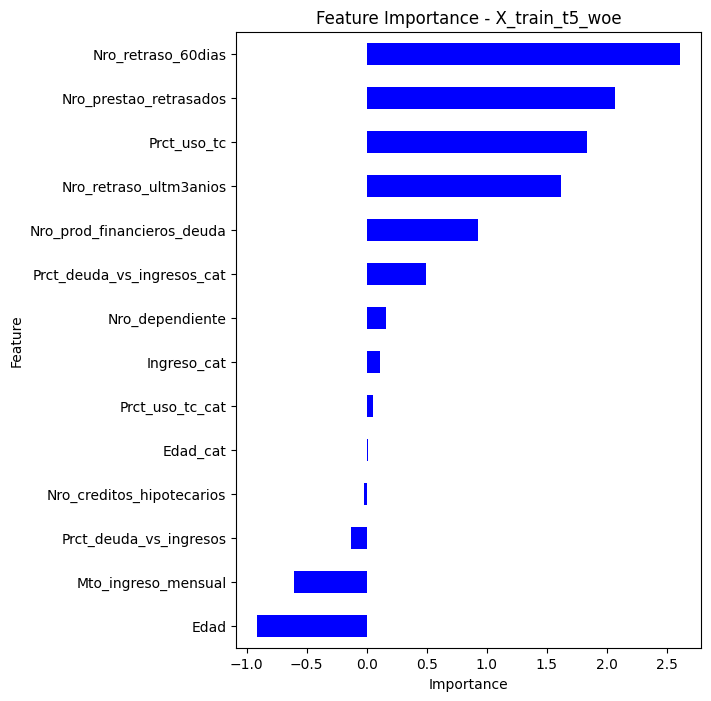

AUC en train (14 variables): 0.8306
AUC en test  (14 variables): 0.8369
Recall en train: 0.1247
Recall en test : 0.1248
------------------------------------------------------------
Importancia de características (X_train_t6):


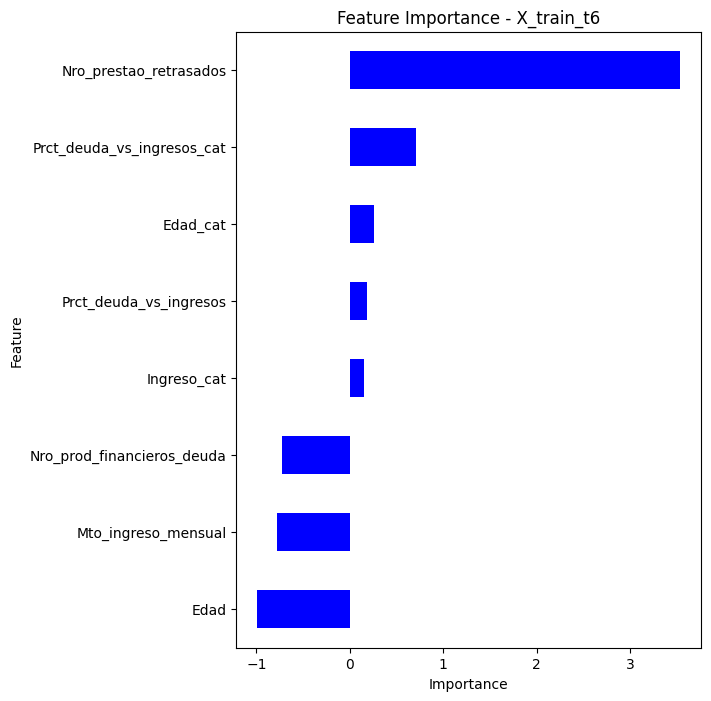

AUC en train (8 variables): 0.7409
AUC en test  (8 variables): 0.7476
Recall en train: 0.0379
Recall en test : 0.0401
------------------------------------------------------------
Importancia de características (X_train_t8):


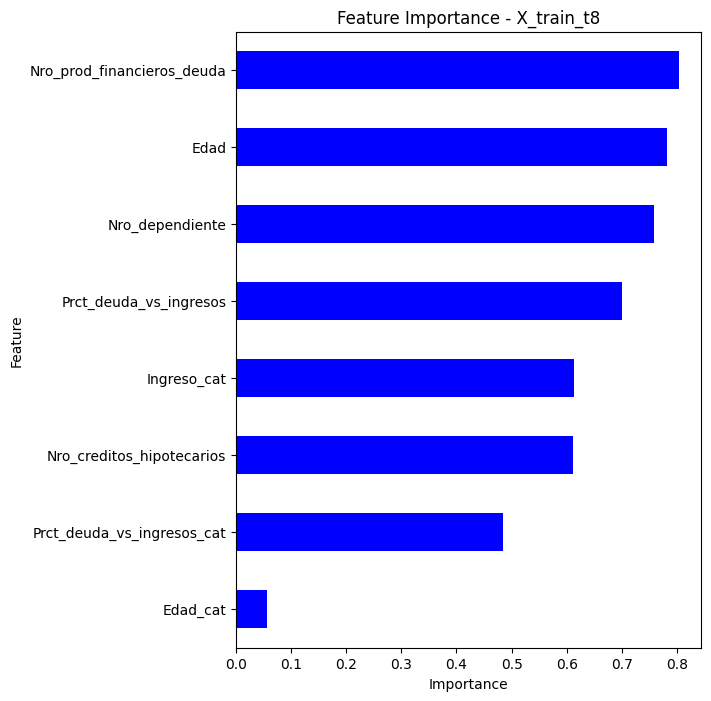

AUC en train (8 variables): 0.6538
AUC en test  (8 variables): 0.6677
Recall en train: 0.0000
Recall en test : 0.0000
------------------------------------------------------------
Importancia de características (X_train_woe_enc2):


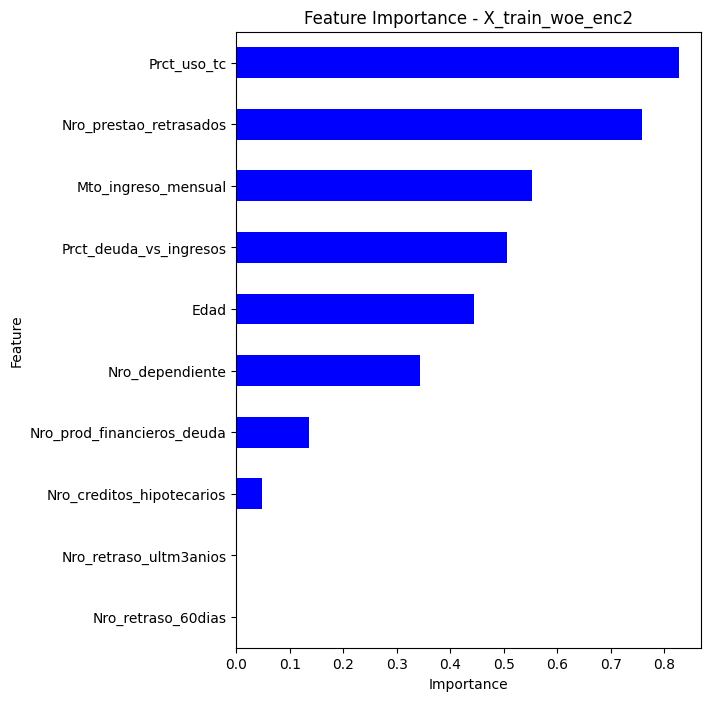

AUC en train (10 variables): 0.7861
AUC en test  (10 variables): 0.7957
Recall en train: 0.0247
Recall en test : 0.0182
------------------------------------------------------------


,Candidato,n_vars,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,0.8306,0.8369,0.1247,0.1248
1,X_train_t6,8,0.7409,0.7476,0.0379,0.0401
2,X_train_t8,8,0.6538,0.6677,0.0000,0.0000
3,X_train_woe_enc2,10,0.7861,0.7957,0.0247,0.0182


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# Listas de candidatos
posible_X_candidatos_train = [X_train_t5_woe, X_train_t6, X_train_t8, X_train_woe_enc2]
posible_X_candidatos_test  = [X_test_t5_woe,  X_test_t6,  X_test_t8,  X_test_woe_enc2]
nombres = ["X_train_t5_woe", "X_train_t6", "X_train_t8", "X_train_woe_enc2"]

# Lista para guardar resultados
resultados = []

# Bucle de entrenamiento y evaluación
for nombre, i, j in zip(nombres, posible_X_candidatos_train, posible_X_candidatos_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(i, y_train)

    y_pred_train_prob = model.predict_proba(i)[:, 1]
    y_pred_test_prob  = model.predict_proba(j)[:, 1]

    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    # Guardar resultados en lista
    resultados.append({
        "Candidato": nombre,
        "n_vars": i.shape[1],
        "AUC_train": round(auc_train, 4),
        "AUC_test": round(auc_test, 4),
        "Recall_train": round(recall_train, 4),
        "Recall_test": round(recall_test, 4)
    })

    # Gráfico de importancia de características
    print(f"Importancia de características ({nombre}):")
    fi = pd.Series(model.coef_[0], index=model.feature_names_in_)
    fi.sort_values(ascending=True, inplace=True)
    fi.plot.barh(color='blue', figsize=(6, 8))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance - {nombre}")
    plt.show()

    print(f"AUC en train ({i.shape[1]} variables): {auc_train:.4f}")
    print(f"AUC en test  ({i.shape[1]} variables): {auc_test:.4f}")
    print(f"Recall en train: {recall_train:.4f}")
    print(f"Recall en test : {recall_test:.4f}")
    print("-" * 60)

# Crear DataFrame resumen
df_resultados_logist_sinbalanceo = pd.DataFrame(resultados)
display(df_resultados_logist_sinbalanceo)



### 5.2 Regresión Lineal Calibrado

Importancia de características (X_train_t5_woe):


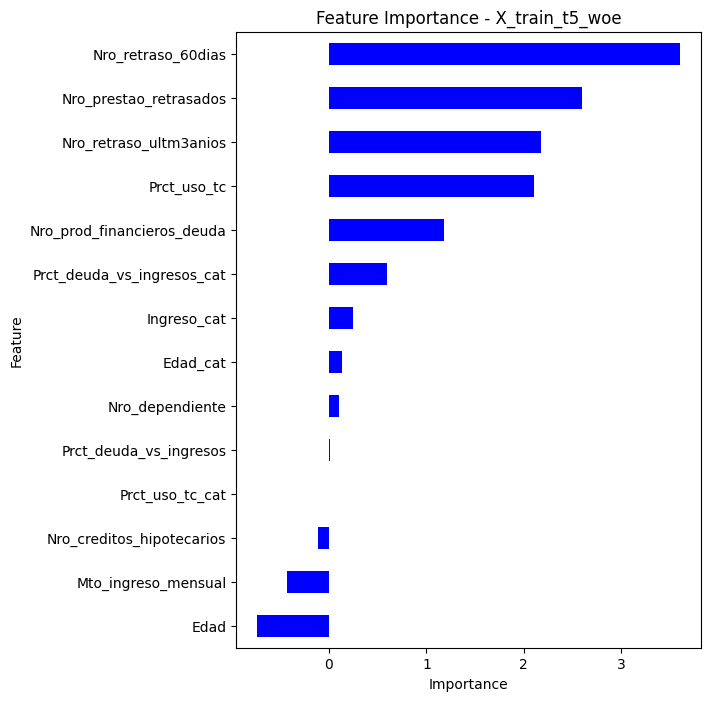

AUC en train (14 variables): 0.8334
AUC en test  (14 variables): 0.8389
Recall en train: 0.7158
Recall en test : 0.7313
------------------------------------------------------------
Importancia de características (X_train_t6):


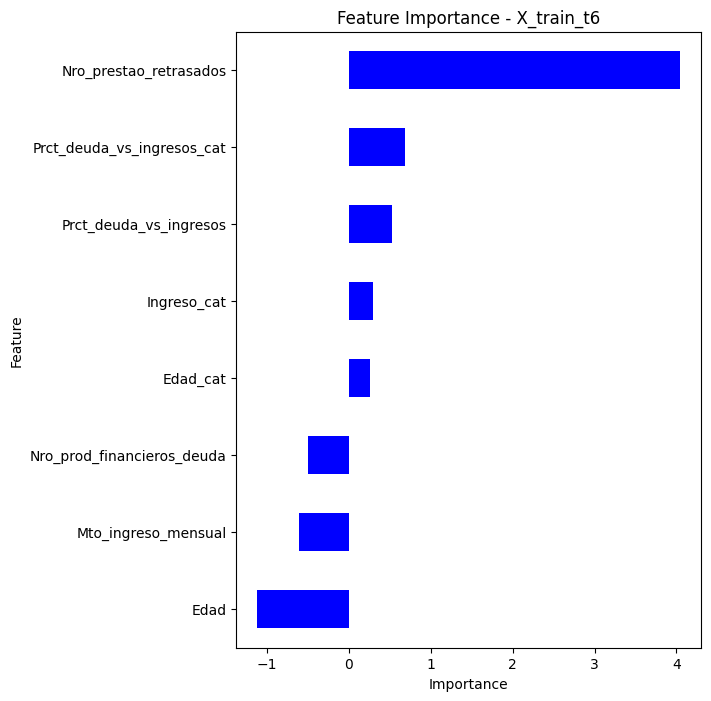

AUC en train (8 variables): 0.7427
AUC en test  (8 variables): 0.7481
Recall en train: 0.5995
Recall en test : 0.6029
------------------------------------------------------------
Importancia de características (X_train_t8):


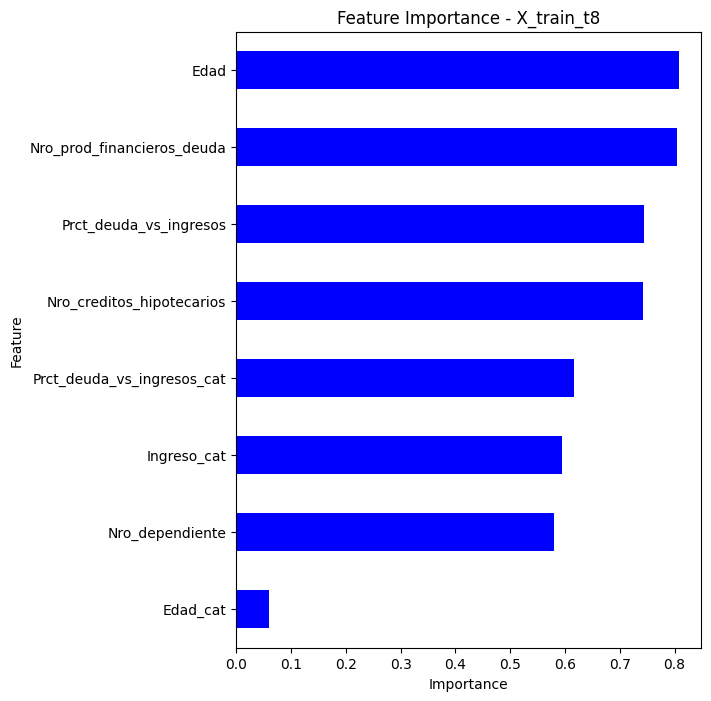

AUC en train (8 variables): 0.6545
AUC en test  (8 variables): 0.6678
Recall en train: 0.6301
Recall en test : 0.6412
------------------------------------------------------------
Importancia de características (X_train_woe_enc2):


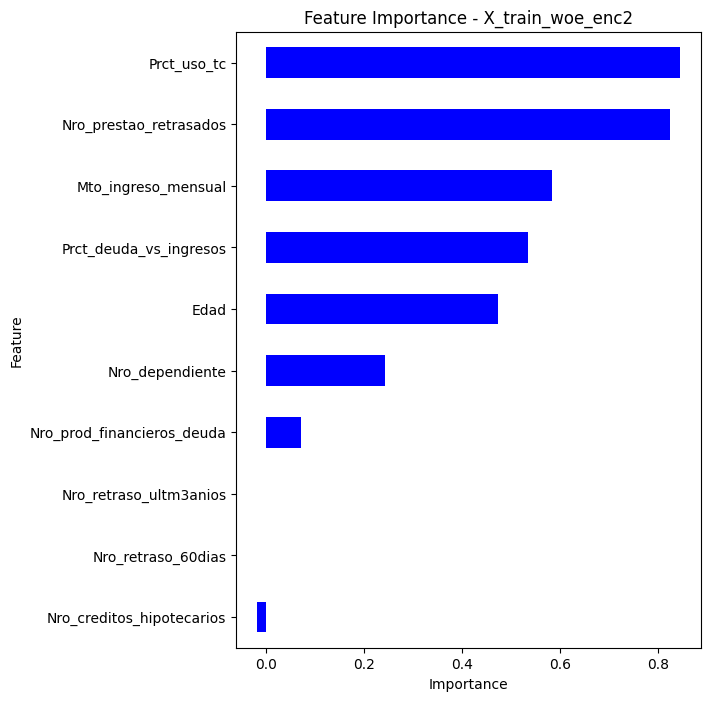

AUC en train (10 variables): 0.7864
AUC en test  (10 variables): 0.7957
Recall en train: 0.7094
Recall en test : 0.7304
------------------------------------------------------------


,Candidato,n_vars,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,0.8334,0.8389,0.7158,0.7313
1,X_train_t6,8,0.7427,0.7481,0.5995,0.6029
2,X_train_t8,8,0.6545,0.6678,0.6301,0.6412
3,X_train_woe_enc2,10,0.7864,0.7957,0.7094,0.7304


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# Listas de candidatos
posible_X_candidatos_train = [X_train_t5_woe, X_train_t6, X_train_t8, X_train_woe_enc2]
posible_X_candidatos_test  = [X_test_t5_woe,  X_test_t6,  X_test_t8,  X_test_woe_enc2]
nombres = ["X_train_t5_woe", "X_train_t6", "X_train_t8", "X_train_woe_enc2"]

# Lista para guardar resultados
resultados = []

# Bucle de entrenamiento y evaluación
for nombre, i, j in zip(nombres, posible_X_candidatos_train, posible_X_candidatos_test):
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(i, y_train)

    y_pred_train_prob = model.predict_proba(i)[:, 1]
    y_pred_test_prob  = model.predict_proba(j)[:, 1]

    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    # Guardar resultados en lista
    resultados.append({
        "Candidato": nombre,
        "n_vars": i.shape[1],
        "AUC_train": round(auc_train, 4),
        "AUC_test": round(auc_test, 4),
        "Recall_train": round(recall_train, 4),
        "Recall_test": round(recall_test, 4)
    })

    # Gráfico de importancia de características
    print(f"Importancia de características ({nombre}):")
    fi = pd.Series(model.coef_[0], index=model.feature_names_in_)
    fi.sort_values(ascending=True, inplace=True)
    fi.plot.barh(color='blue', figsize=(6, 8))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance - {nombre}")
    plt.show()

    print(f"AUC en train ({i.shape[1]} variables): {auc_train:.4f}")
    print(f"AUC en test  ({i.shape[1]} variables): {auc_test:.4f}")
    print(f"Recall en train: {recall_train:.4f}")
    print(f"Recall en test : {recall_test:.4f}")
    print("-" * 60)

# Crear DataFrame resumen
df_resultados_logist_conbalanceo = pd.DataFrame(resultados)
display(df_resultados_logist_conbalanceo)

### 5.3 Regularización L1 (Lasso)
Error absoluto, puede llevar a los coeficientes a 0

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 🔹 Diccionario con nombre del dataset → (X_train, X_test)
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# 🔹 Grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-3, 1e-4]
    }

resultados = []

for nombre, (Xtr, Xte) in candidatos.items():
    print(f"🔸 Probando modelo con {nombre} ({Xtr.shape[1]} variables)")


    # Modelo base
    lasso = LogisticRegression(penalty='l1', max_iter=1000)

    # Búsqueda de hiperparámetros con validación cruzada
    grid = GridSearchCV(
        lasso,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid.fit(Xtr, y_train)

    # Modelo final con mejor C
    best_model = grid.best_estimator_

    # Predicciones
    y_pred_train_prob = best_model.predict_proba(Xtr)[:, 1]
    y_pred_test_prob  = best_model.predict_proba(Xte)[:, 1]
    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    resultados.append({
        'Candidato': nombre,
        'n_vars': Xtr.shape[1],
        'best_C': grid.best_params_['C'],
        'best_solver': grid.best_params_['solver'],
        'best_class_weight': grid.best_params_['class_weight'],
        'best_tol': grid.best_params_['tol'],
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test
    })

# 🔹 Mostrar resultados ordenados por AUC_test
df_resultados_lasso_sinbalanceo = pd.DataFrame(resultados).sort_values('AUC_test', ascending=False)
print("\n📊 Resultados comparativos:")
display(df_resultados_lasso_sinbalanceo)


🔸 Probando modelo con X_train_t5_woe (14 variables)
🔸 Probando modelo con X_train_t6 (8 variables)
🔸 Probando modelo con X_train_t8 (8 variables)
🔸 Probando modelo con X_train_woe_enc2 (10 variables)

📊 Resultados comparativos:


,Candidato,n_vars,best_C,best_solver,best_class_weight,best_tol,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,0.001,liblinear,balanced,0.001,0.798432,0.806904,0.682202,0.697632
3,X_train_woe_enc2,10,0.010,saga,balanced,0.001,0.784003,0.792132,0.738177,0.759563
1,X_train_t6,8,0.001,liblinear,balanced,0.001,0.734783,0.743332,0.590130,0.590164
2,X_train_t8,8,0.001,liblinear,balanced,0.001,0.621137,0.629038,0.697510,0.714936


### 5.4 Regularización L1 (Lasso) Calibrado

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 🔹 Diccionario con nombre del dataset → (X_train, X_test)
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# 🔹 Grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-3, 1e-4]
    }

resultados = []

for nombre, (Xtr, Xte) in candidatos.items():
    print(f"🔸 Probando modelo con {nombre} ({Xtr.shape[1]} variables)")


    # Modelo base
    lasso = LogisticRegression(penalty='l1', max_iter=1000, class_weight='balanced')

    # Búsqueda de hiperparámetros con validación cruzada
    grid = GridSearchCV(
        lasso,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid.fit(Xtr, y_train)

    # Modelo final con mejor C
    best_model = grid.best_estimator_

    # Predicciones
    y_pred_train_prob = best_model.predict_proba(Xtr)[:, 1]
    y_pred_test_prob  = best_model.predict_proba(Xte)[:, 1]
    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    resultados.append({
        'Candidato': nombre,
        'n_vars': Xtr.shape[1],
        'best_C': grid.best_params_['C'],
        'best_solver': grid.best_params_['solver'],
        'best_class_weight': grid.best_params_['class_weight'],
        'best_tol': grid.best_params_['tol'],
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test
    })

# 🔹 Mostrar resultados ordenados por AUC_test
df_resultados_lasso_conbalanceo = pd.DataFrame(resultados).sort_values('AUC_test', ascending=False)
print("\n📊 Resultados comparativos:")
display(df_resultados_lasso_conbalanceo)


🔸 Probando modelo con X_train_t5_woe (14 variables)
🔸 Probando modelo con X_train_t6 (8 variables)
🔸 Probando modelo con X_train_t8 (8 variables)
🔸 Probando modelo con X_train_woe_enc2 (10 variables)

📊 Resultados comparativos:


,Candidato,n_vars,best_C,best_solver,best_class_weight,best_tol,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,0.001,liblinear,balanced,0.001,0.798424,0.806900,0.682202,0.697632
3,X_train_woe_enc2,10,0.010,saga,balanced,0.001,0.784921,0.794881,0.699794,0.719490
1,X_train_t6,8,0.001,liblinear,balanced,0.001,0.734783,0.743332,0.590130,0.590164
2,X_train_t8,8,0.001,liblinear,balanced,0.001,0.621137,0.629038,0.697510,0.714936


### 5.5 Regularización Ridge
Error cuadradtico, no lleva los coeficientes a 0

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 🔹 Diccionario con nombre del dataset → (X_train, X_test)
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# 🔹 Grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-3, 1e-4]
    }

resultados = []

for nombre, (Xtr, Xte) in candidatos.items():
    print(f"🔸 Probando modelo con {nombre} ({Xtr.shape[1]} variables)")


    # Modelo base
    ridge = LogisticRegression(penalty='l2', max_iter=1000)

    # Búsqueda de hiperparámetros con validación cruzada
    grid = GridSearchCV(
        ridge,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid.fit(Xtr, y_train)

    # Modelo final con mejor C
    best_model = grid.best_estimator_

    # Predicciones
    y_pred_train_prob = best_model.predict_proba(Xtr)[:, 1]
    y_pred_test_prob  = best_model.predict_proba(Xte)[:, 1]
    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    resultados.append({
        'Candidato': nombre,
        'n_vars': Xtr.shape[1],
        'best_C': grid.best_params_['C'],
        'best_solver': grid.best_params_['solver'],
        'best_class_weight': grid.best_params_['class_weight'],
        'best_tol': grid.best_params_['tol'],
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test
    })

# 🔹 Mostrar resultados ordenados por AUC_test
df_resultados_ridge_sinbalanceo = pd.DataFrame(resultados).sort_values('AUC_test', ascending=False)
print("\n📊 Resultados comparativos:")
display(df_resultados_ridge_sinbalanceo)

🔸 Probando modelo con X_train_t5_woe (14 variables)
🔸 Probando modelo con X_train_t6 (8 variables)
🔸 Probando modelo con X_train_t8 (8 variables)
🔸 Probando modelo con X_train_woe_enc2 (10 variables)

📊 Resultados comparativos:


,Candidato,n_vars,best_C,best_solver,best_class_weight,best_tol,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,10.000,liblinear,balanced,0.0010,0.833496,0.838972,0.715787,0.728597
3,X_train_woe_enc2,10,10.000,saga,balanced,0.0001,0.781857,0.787598,0.710304,0.739526
1,X_train_t6,8,0.001,saga,balanced,0.0010,0.728873,0.739319,0.631711,0.647541
2,X_train_t8,8,0.001,liblinear,balanced,0.0010,0.648726,0.662521,0.651131,0.661202


### 5.6 Regularización Rige Calibrado

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 🔹 Diccionario con nombre del dataset → (X_train, X_test)
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# 🔹 Grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-3, 1e-4]
    }

resultados = []

for nombre, (Xtr, Xte) in candidatos.items():
    print(f"🔸 Probando modelo con {nombre} ({Xtr.shape[1]} variables)")


    # Modelo base
    ridge = LogisticRegression(penalty='l2', max_iter=1000, class_weight='balanced')

    # Búsqueda de hiperparámetros con validación cruzada
    grid = GridSearchCV(
        ridge,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid.fit(Xtr, y_train)

    # Modelo final con mejor C
    best_model = grid.best_estimator_

    # Predicciones
    y_pred_train_prob = best_model.predict_proba(Xtr)[:, 1]
    y_pred_test_prob  = best_model.predict_proba(Xte)[:, 1]
    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    resultados.append({
        'Candidato': nombre,
        'n_vars': Xtr.shape[1],
        'best_C': grid.best_params_['C'],
        'best_solver': grid.best_params_['solver'],
        'best_class_weight': grid.best_params_['class_weight'],
        'best_tol': grid.best_params_['tol'],
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test
    })

# 🔹 Mostrar resultados ordenados por AUC_test
df_resultados_ridge_conbalanceo = pd.DataFrame(resultados).sort_values('AUC_test', ascending=False)
print("\n📊 Resultados comparativos:")
display(df_resultados_ridge_conbalanceo)

🔸 Probando modelo con X_train_t5_woe (14 variables)
🔸 Probando modelo con X_train_t6 (8 variables)
🔸 Probando modelo con X_train_t8 (8 variables)
🔸 Probando modelo con X_train_woe_enc2 (10 variables)

📊 Resultados comparativos:


,Candidato,n_vars,best_C,best_solver,best_class_weight,best_tol,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,10.000,liblinear,balanced,0.001,0.833496,0.838972,0.715787,0.728597
3,X_train_woe_enc2,10,1.000,liblinear,balanced,0.001,0.786422,0.795726,0.709847,0.730419
1,X_train_t6,8,0.001,saga,balanced,0.001,0.728872,0.739312,0.632397,0.647541
2,X_train_t8,8,0.001,liblinear,balanced,0.001,0.648726,0.662521,0.651131,0.661202


### 5.7 Regularización Elastic Net

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 🔹 Diccionario con nombre del dataset → (X_train, X_test)
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# 🔹 Grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.01,0.25, 0.5, 0.75,0.99] # Mezcla entre L1 y L2
}

resultados = []

for nombre, (Xtr, Xte) in candidatos.items():
    print(f"🔸 Probando modelo con {nombre} ({Xtr.shape[1]} variables)")


    # Modelo base
    elastic = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

    # Búsqueda de hiperparámetros con validación cruzada
    grid = GridSearchCV(
        elastic,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid.fit(Xtr, y_train)

    # Modelo final con mejor C
    best_model = grid.best_estimator_

    # Predicciones
    y_pred_train_prob = best_model.predict_proba(Xtr)[:, 1]
    y_pred_test_prob  = best_model.predict_proba(Xte)[:, 1]
    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    resultados.append({
        'Candidato': nombre,
        'n_vars': Xtr.shape[1],
        'best_C': grid.best_params_['C'],
        'best_l1_ratio': grid.best_params_['l1_ratio'],
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test
    })

# 🔹 Mostrar resultados ordenados por AUC_test
df_resultados_elastic_sinbalanceo = pd.DataFrame(resultados).sort_values('AUC_test', ascending=False)
print("\n📊 Resultados comparativos:")
display(df_resultados_elastic_sinbalanceo)

🔸 Probando modelo con X_train_t5_woe (14 variables)
🔸 Probando modelo con X_train_t6 (8 variables)
🔸 Probando modelo con X_train_t8 (8 variables)
🔸 Probando modelo con X_train_woe_enc2 (10 variables)

📊 Resultados comparativos:


,Candidato,n_vars,best_C,best_l1_ratio,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,1.000,0.99,0.830654,0.837190,0.125428,0.122951
3,X_train_woe_enc2,10,10.000,0.01,0.786099,0.795890,0.025131,0.017304
1,X_train_t6,8,10.000,0.01,0.740885,0.747632,0.037926,0.040073
2,X_train_t8,8,0.001,0.01,0.640973,0.655156,0.000000,0.000000


### 5.8 Regularización Elastic Net Calibrado

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 🔹 Diccionario con nombre del dataset → (X_train, X_test)
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# 🔹 Grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.01,0.25, 0.5, 0.75,0.99] # Mezcla entre L1 y L2
}

resultados = []

for nombre, (Xtr, Xte) in candidatos.items():
    print(f"🔸 Probando modelo con {nombre} ({Xtr.shape[1]} variables)")


    # Modelo base
    elastic = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, class_weight='balanced')

    # Búsqueda de hiperparámetros con validación cruzada
    grid = GridSearchCV(
        elastic,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid.fit(Xtr, y_train)

    # Modelo final con mejor C
    best_model = grid.best_estimator_

    # Predicciones
    y_pred_train_prob = best_model.predict_proba(Xtr)[:, 1]
    y_pred_test_prob  = best_model.predict_proba(Xte)[:, 1]
    y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
    y_pred_test  = (y_pred_test_prob  >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    auc_test  = roc_auc_score(y_test,  y_pred_test_prob)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test,  y_pred_test)

    resultados.append({
        'Candidato': nombre,
        'n_vars': Xtr.shape[1],
        'best_C': grid.best_params_['C'],
        'best_l1_ratio': grid.best_params_['l1_ratio'],
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test
    })

# 🔹 Mostrar resultados ordenados por AUC_test
df_resultados_elastic_conbalanceo = pd.DataFrame(resultados).sort_values('AUC_test', ascending=False)
print("\n📊 Resultados comparativos:")
display(df_resultados_elastic_conbalanceo)

🔸 Probando modelo con X_train_t5_woe (14 variables)
🔸 Probando modelo con X_train_t6 (8 variables)
🔸 Probando modelo con X_train_t8 (8 variables)
🔸 Probando modelo con X_train_woe_enc2 (10 variables)

📊 Resultados comparativos:


,Candidato,n_vars,best_C,best_l1_ratio,AUC_train,AUC_test,Recall_train,Recall_test
0,X_train_t5_woe,14,1.000,0.75,0.833483,0.838959,0.716244,0.727687
3,X_train_woe_enc2,10,0.100,0.99,0.783006,0.790627,0.717843,0.742259
1,X_train_t6,8,0.001,0.01,0.728998,0.739443,0.631483,0.647541
2,X_train_t8,8,0.001,0.99,0.621586,0.629108,0.697510,0.714936


## 6. Generación de Score a partir de los resultados de los modelos logisticos

En la construcción de un scorecard de crédito, los parámetros PDO, TARGET_SCORE, y TARGET_ODDS permiten convertir la probabilidad de default (PD) de un modelo logístico en un puntaje interpretable

### 6.1 Comparativa de modelo
Eligiremos al mejor modelo lineal

In [154]:
# df_resultados_logist_sinbalanceo
# df_resultados_logist_conbalanceo
# df_resultados_lasso_sinbalanceo
# df_resultados_lasso_conbalanceo
# df_resultados_ridge_sinbalanceo
# df_resultados_ridge_conbalanceo
# df_resultados_elastic_sinbalanceo
# df_resultados_elastic_conbalanceo

In [155]:
# Lista de DataFrames y sus nombres
dfs = [
    ("logist_sinbalanceo", df_resultados_logist_sinbalanceo),
    ("logist_conbalanceo", df_resultados_logist_conbalanceo),
    ("lasso_sinbalanceo", df_resultados_lasso_sinbalanceo),
    ("lasso_conbalanceo", df_resultados_lasso_conbalanceo),
    ("ridge_sinbalanceo", df_resultados_ridge_sinbalanceo),
    ("ridge_conbalanceo", df_resultados_ridge_conbalanceo),
    ("elastic_sinbalanceo", df_resultados_elastic_sinbalanceo),
    ("elastic_conbalanceo", df_resultados_elastic_conbalanceo)
]

dfs_con_nombre = []
for nombre, df in dfs:
    df = df.copy()
    df["Modelo_Global"] = nombre
    dfs_con_nombre.append(df)

df_modelo_comparativo = pd.concat(dfs_con_nombre, ignore_index=True)
df_modelo_comparativo["Overfit_auc"] = abs(df_modelo_comparativo["AUC_train"] - df_modelo_comparativo["AUC_test"])
df_modelo_comparativo["Overfit_recall"] = abs(df_modelo_comparativo["Recall_train"] - df_modelo_comparativo["Recall_test"])
df_modelo_comparativo=df_modelo_comparativo[df_modelo_comparativo["Overfit_auc"]<=0.05]
df_modelo_comparativo=df_modelo_comparativo[df_modelo_comparativo["Overfit_recall"]<=0.05]
display(df_modelo_comparativo.sort_values(by=["Recall_test","AUC_test"], ascending=False))

,Candidato,n_vars,AUC_train,AUC_test,Recall_train,Recall_test,Modelo_Global,best_C,best_solver,best_class_weight,best_tol,best_l1_ratio,Overfit_auc,Overfit_recall
9,X_train_woe_enc2,10,0.784003,0.792132,0.738177,0.759563,lasso_sinbalanceo,0.010,saga,balanced,0.0010,NaN,0.008129,0.021386
29,X_train_woe_enc2,10,0.783006,0.790627,0.717843,0.742259,elastic_conbalanceo,0.100,NaN,NaN,NaN,0.99,0.007621,0.024415
17,X_train_woe_enc2,10,0.781857,0.787598,0.710304,0.739526,ridge_sinbalanceo,10.000,saga,balanced,0.0001,NaN,0.005741,0.029223
4,X_train_t5_woe,14,0.833400,0.838900,0.715800,0.731300,logist_conbalanceo,NaN,NaN,NaN,NaN,NaN,0.005500,0.015500
21,X_train_woe_enc2,10,0.786422,0.795726,0.709847,0.730419,ridge_conbalanceo,1.000,liblinear,balanced,0.0010,NaN,0.009304,0.020572
7,X_train_woe_enc2,10,0.786400,0.795700,0.709400,0.730400,logist_conbalanceo,NaN,NaN,NaN,NaN,NaN,0.009300,0.021000
16,X_train_t5_woe,14,0.833496,0.838972,0.715787,0.728597,ridge_sinbalanceo,10.000,liblinear,balanced,0.0010,NaN,0.005477,0.012810
20,X_train_t5_woe,14,0.833496,0.838972,0.715787,0.728597,ridge_conbalanceo,10.000,liblinear,balanced,0.0010,NaN,0.005477,0.012810
28,X_train_t5_woe,14,0.833483,0.838959,0.716244,0.727687,elastic_conbalanceo,1.000,NaN,NaN,NaN,0.75,0.005475,0.011443
13,X_train_woe_enc2,10,0.784921,0.794881,0.699794,0.719490,lasso_conbalanceo,0.010,saga,balanced,0.0010,NaN,0.009960,0.019696


In [156]:
best_model_choice = LogisticRegression(penalty='l2', C=0.001, class_weight='balanced', solver='liblinear', tol=0.001, max_iter=1000)
best_model_choice.fit(X_train_t5_woe, y_train)
metricas_train = best_model_choice.predict_proba(X_train_t5_woe)[:, 1]
metricas_test = best_model_choice.predict_proba(X_test_t5_woe)[:, 1]
recall_train = recall_score(y_train, (metricas_train >= 0.5).astype(int))
recall_test = recall_score(y_test, (metricas_test >= 0.5).astype(int))
f1_train = f1_score(y_train, (metricas_train >= 0.5).astype(int))
f1_test = f1_score(y_test, (metricas_test >= 0.5).astype(int))
auc_train = roc_auc_score(y_train, metricas_train)
auc_test = roc_auc_score(y_test, metricas_test)
print(f"AUC Train: {auc_train:.6f}")
print(f"AUC Test : {auc_test:.6f}")
print(f"Recall Train: {recall_train:.6f}")
print(f"Recall Test : {recall_test:.6f}")
print(f"F1 Score Train: {f1_train:.6f}")
print(f"F1 Score Test : {f1_test:.6f}")
#resultados_score_final = calcular_scorecard(best_model_choice, X_test_t5_woe, factor, offset)

AUC Train: 0.807150
AUC Test : 0.816855
Recall Train: 0.708933
Recall Test : 0.729508
F1 Score Train: 0.253783
F1 Score Test : 0.260912


In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [158]:
confusion_matrix(y_test, best_model_choice.predict(X_test_t5_woe), labels=[0,1])

array([[12938,  4241],
       [  297,   801]])

### 6.2 Creando los offset


Factor de escalamiento: $$ \text{factor} = \frac{\text{PDO}}{\ln(2)} = \frac{20}{0.6931} \approx 28.86 $$

Offset de calibración: $$ \text{offset} = \text{TARGET\_SCORE} - \text{factor} \times \ln(\text{TARGET\_ODDS}) $$

Score final: $$ \text{Score} = \text{offset} - \text{factor} \times \text{logit} $$

Logit: $$ \text{logit} = \ln\left(\frac{p}{1-p}\right) = \ln(\text{odds}) $$

Score en función de odds: $$ \text{Score} = \text{offset} - \text{factor} \times \ln(\text{odds}) $$

Verificación PDO: $$ \Delta \text{Score} = \text{factor} \times \ln(2) = \text{PDO} $$

Odds a partir de PD: $$ \text{odds} = \frac{\text{PD}}{1 - \text{PD}} $$

In [159]:
PDO = 20 #Cuántos puntos cambian al duplicar el riesgo
TARGET_SCORE = 600 #Score asignado a un punto de referencia
TARGET_ODDS = 50/1 # ~2% probabilidad
factor = PDO / np.log(2) #Escala logarítmica
offset = TARGET_SCORE - (factor * np.log(TARGET_ODDS))

print("--- Parámetros del Scorecard ---")
print(f"  PDO (Points to Double Odds): {PDO}")
print(f"  Target Score: {TARGET_SCORE}")
print(f"  Target Odds: {TARGET_ODDS}")
print(f"  Factor de Escalamiento: {factor:.4f}")
print(f"  Offset: {offset:.4f}\n")

--- Parámetros del Scorecard ---
  PDO (Points to Double Odds): 20
  Target Score: 600
  Target Odds: 50.0
  Factor de Escalamiento: 28.8539
  Offset: 487.1229



¿Por qué usamos `decision_function()`?

$$ \text{logit} = \text{decision\_function}(X) = \beta_0 + \sum_{i=1}^{n} \beta_i X_i $$

`decision_function()` en sklearn retorna la predicción lineal sin calibrar del modelo logístico, es decir, el logit puro.

Relación con la probabilidad en regresión logística:

$$ P(\text{default}) = \frac{1}{1 + e^{-\text{logit}}} $$

O equivalentemente:

$$ \text{logit} = \ln\left(\frac{P(\text{default})}{1 - P(\text{default})}\right) = \ln(\text{odds}) $$

In [160]:
def calcular_scorecard(modelo, X, factor, offset):
    """
    Calcula el Score y la Probabilidad de Default (PD)
    a partir de un modelo logístico entrenado.
    """
    # 1️⃣ Calcular el logit (predicción lineal)
    logit = modelo.decision_function(X)

    # 2️⃣ Calcular el PD usando la función sigmoide
    prob_default = modelo.predict_proba(X)[:, 1]

    # 3️⃣ Calcular el Score
    score = offset - (factor * logit)

    # 4️⃣ Retornar un DataFrame con resultados
    return pd.DataFrame({
        "Score": np.round(score, 0),
        "PD": np.round(prob_default, 2)
    }, index=X.index)

# --- Ejemplo de uso ---
resultados_score = calcular_scorecard(best_model_choice, X_train_t5_woe, factor, offset)
resultados_score.describe().T


,count,mean,std,min,25%,50%,75%,max
Score,73707.0,499.604963,24.033517,373.00,485.00,509.00,519.00,535.00
PD,73707.0,0.400500,0.184052,0.16,0.25,0.32,0.52,0.98


In [161]:
X_test_t5_woe_copy=X_test_t5_woe.copy()

In [162]:
import numpy as np

# Coeficientes del modelo
coefs = best_model_choice.coef_[0]
intercept = best_model_choice.intercept_[0]
columns = X_test_t5_woe_copy.columns.tolist()

# 1️⃣ Calcular el logit (score lineal)
linear_score = np.dot(X_test_t5_woe_copy[columns], coefs) + intercept

# 2️⃣ Aplicar el factor y offset para escalar el score
X_test_t5_woe_copy["Score"] = (linear_score * factor * -1 + offset).round(0)

# 3️⃣ Calcular la probabilidad de default (PD)
X_test_t5_woe_copy["PD"] = best_model_choice.predict_proba(X_test_t5_woe)[:, 1]


In [163]:
X_test_t5_woe_copy[['Score', 'PD']].describe().T

,count,mean,std,min,25%,50%,75%,max
Score,18277.0,499.359249,24.211473,394.000000,485.000000,508.000000,519.00000,536.000000
PD,18277.0,0.402419,0.185402,0.156538,0.251148,0.323146,0.51898,0.962154


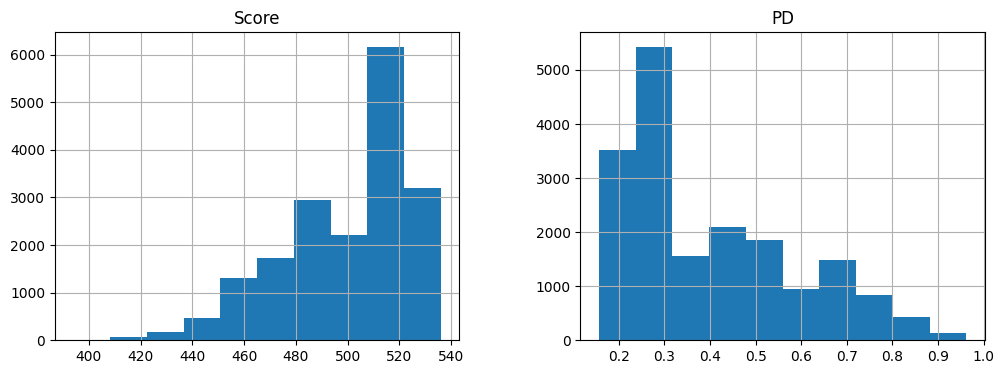

In [164]:
X_test_t5_woe_copy[['Score','PD']].hist(figsize = (12, 4))
plt.show()

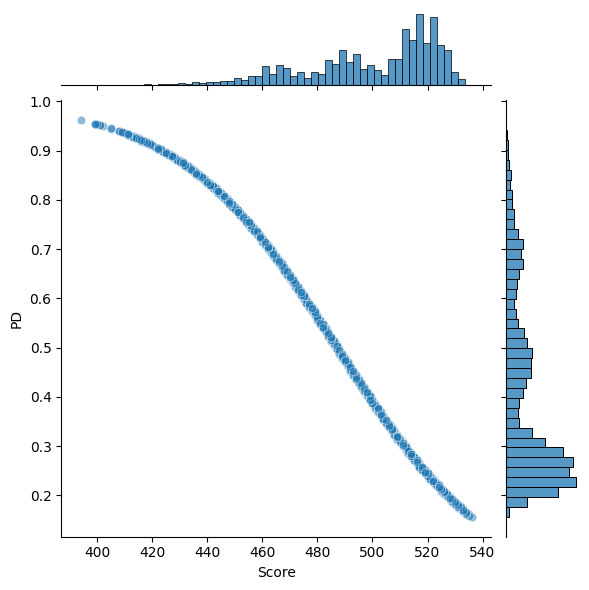

In [165]:
sns.jointplot(x='Score', y='PD', data=X_test_t5_woe_copy, alpha=0.5)

## **7. Modelos Ensamblados (basados en Arboles de Decisión)**

#### 7.1 Decision tree sin balanceo

In [166]:
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

In [167]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, recall_score,balanced_accuracy_score

Importancia de características (X_train_t5_woe):


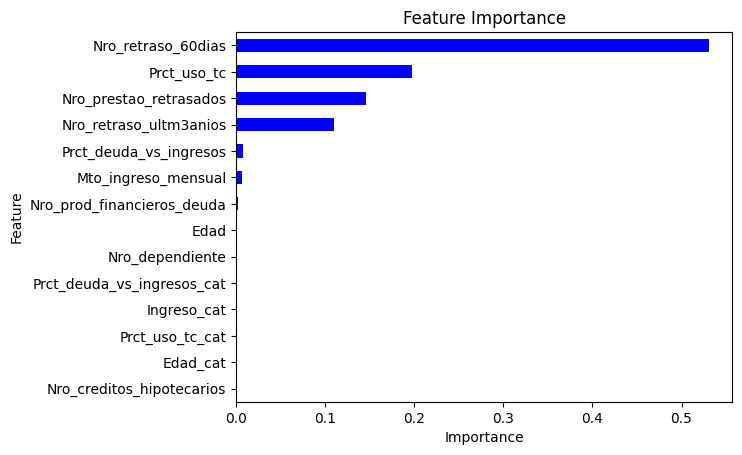

Importancia de características (X_train_t6):


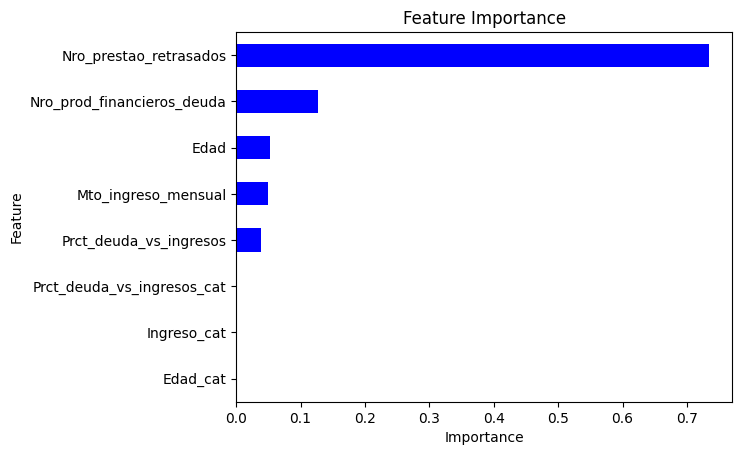

Importancia de características (X_train_t8):


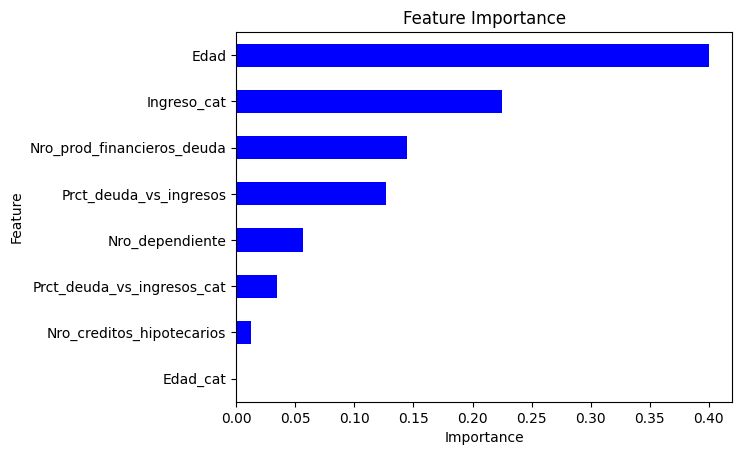

Importancia de características (X_train_woe_enc2):


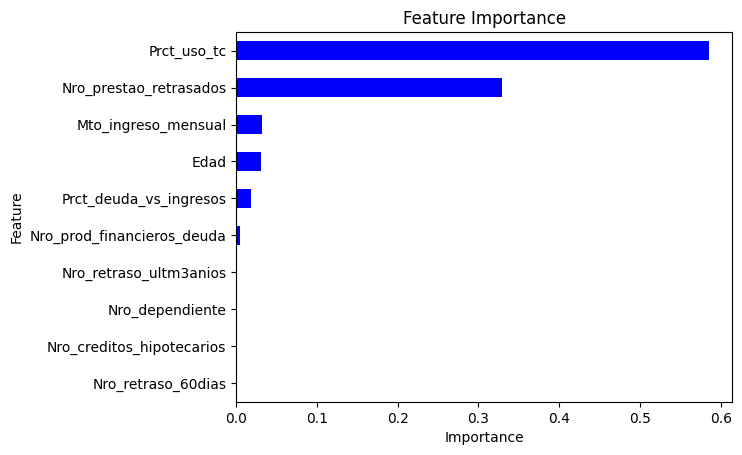

,Dataset,n_vars,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_test
0,X_train_t5_woe,14,0.820883,0.821843,0.096642,0.089253,0.542182
1,X_train_woe_enc2,10,0.782592,0.784472,0.010281,0.004554,0.502073
2,X_train_t6,8,0.752207,0.751142,0.003655,0.001821,0.500911
3,X_train_t8,8,0.656076,0.658490,0.000000,0.000000,0.500000


In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

# Modelo base
DTClasif = DecisionTreeClassifier(max_depth=5, random_state=0)

# Diccionario con tus datasets candidatos
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# Lista para almacenar resultados
resultados = []

# Entrenar y evaluar cada dataset
for nombre, (X_train, X_test) in candidatos.items():
    modelo = DecisionTreeClassifier(max_depth=5, random_state=0)
    modelo.fit(X_train, y_train)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, y_pred_proba)
    auc_train = roc_auc_score(y_train, modelo.predict_proba(X_train)[:, 1])
    recall_train = recall_score(y_train, (modelo.predict_proba(X_train)[:, 1] >= 0.5).astype(int))
    recall_test = recall_score(y_test, (y_pred_proba >= 0.5).astype(int))
    balance_acurracy_test = balanced_accuracy_score(y_test, (y_pred_proba >= 0.5).astype(int))


    resultados.append({
        "Dataset": nombre,
        "n_vars": X_train.shape[1],
        "AUC_train": auc_train,
        "AUC_test": auc_test,
        "Recall_train": recall_train,
        "Recall_test": recall_test,
        "Balanced_Accuracy_test": balance_acurracy_test
    })
    print(f"Importancia de características ({nombre}):")
    fi=pd.Series(modelo.feature_importances_ , index=modelo.feature_names_in_)
    fi.sort_values(ascending=True, inplace=True)
    fi.plot.barh(color='blue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show ()

# Crear DataFrame con los resultados
df_resultados_decisiontree_sinbalanceo = pd.DataFrame(resultados).sort_values(by=["Recall_test","AUC_test"], ascending=[False,False]).reset_index(drop=True)

# Mostrar tabla ordenada
df_resultados_decisiontree_sinbalanceo


#### 7.2 Decision tree con balanceo

Importancia de características (X_train_t5_woe):


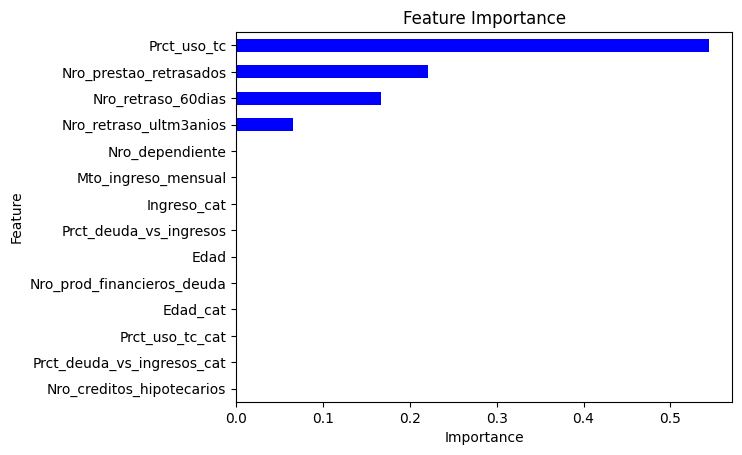

Importancia de características (X_train_t6):


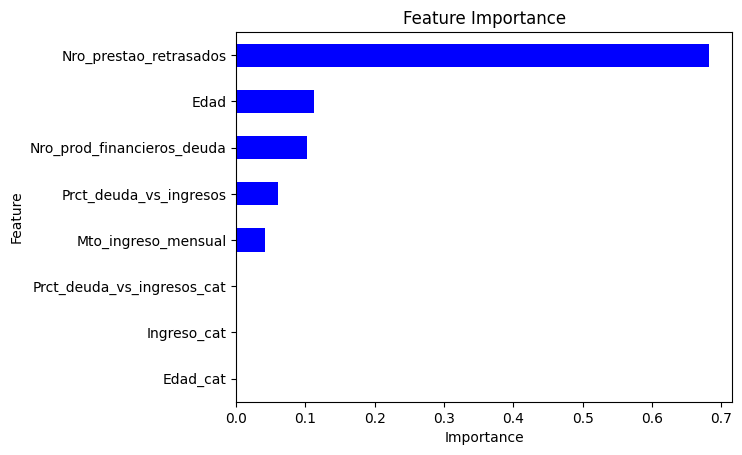

Importancia de características (X_train_t8):


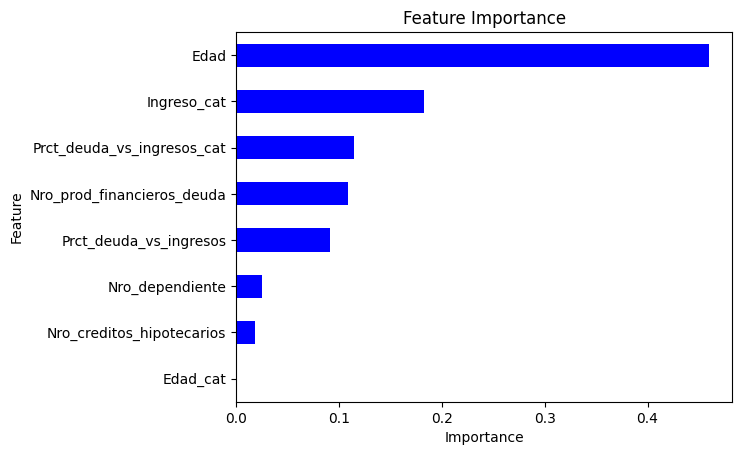

Importancia de características (X_train_woe_enc2):


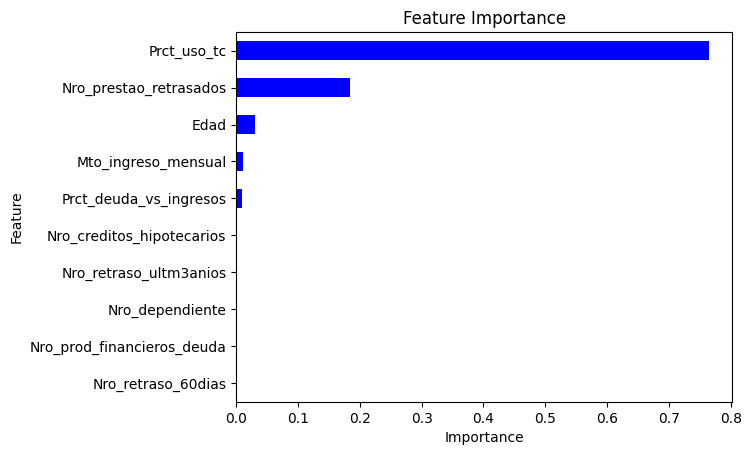

,Dataset,n_vars,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_test
0,X_train_t8,8,0.656500,0.659253,0.771076,0.765027,0.612300
1,X_train_t5_woe,14,0.822579,0.823733,0.737720,0.747723,0.756218
2,X_train_woe_enc2,10,0.784192,0.785412,0.704592,0.719490,0.727752
3,X_train_t6,8,0.755470,0.752973,0.636281,0.630237,0.688103


In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

# Modelo base
DTClasif = DecisionTreeClassifier(max_depth=5, random_state=0)

# Diccionario con tus datasets candidatos
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# Lista para almacenar resultados
resultados = []

# Entrenar y evaluar cada dataset
for nombre, (X_train, X_test) in candidatos.items():
    modelo = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')
    modelo.fit(X_train, y_train)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, y_pred_proba)
    auc_train = roc_auc_score(y_train, modelo.predict_proba(X_train)[:, 1])
    recall_train = recall_score(y_train, (modelo.predict_proba(X_train)[:, 1] >= 0.5).astype(int))
    recall_test = recall_score(y_test, (y_pred_proba >= 0.5).astype(int))
    balance_acurracy_test = balanced_accuracy_score(y_test, (y_pred_proba >= 0.5).astype(int))


    resultados.append({
        "Dataset": nombre,
        "n_vars": X_train.shape[1],
        "AUC_train": auc_train,
        "AUC_test": auc_test,
        "Recall_train": recall_train,
        "Recall_test": recall_test,
        "Balanced_Accuracy_test": balance_acurracy_test
    })
    print(f"Importancia de características ({nombre}):")
    fi=pd.Series(modelo.feature_importances_ , index=modelo.feature_names_in_)
    fi.sort_values(ascending=True, inplace=True)
    fi.plot.barh(color='blue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show ()

# Crear DataFrame con los resultados
df_resultados_decisiontree_conbalanceo = pd.DataFrame(resultados).sort_values(by=["Recall_test","AUC_test"], ascending=[False,False]).reset_index(drop=True)

# Mostrar tabla ordenada
df_resultados_decisiontree_conbalanceo


### 7.3 Desición tree con balanceo e hiperparametros


🔹 Buscando mejores hiperparámetros para: X_train_t5_woe
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Importancia de características (X_train_t5_woe):


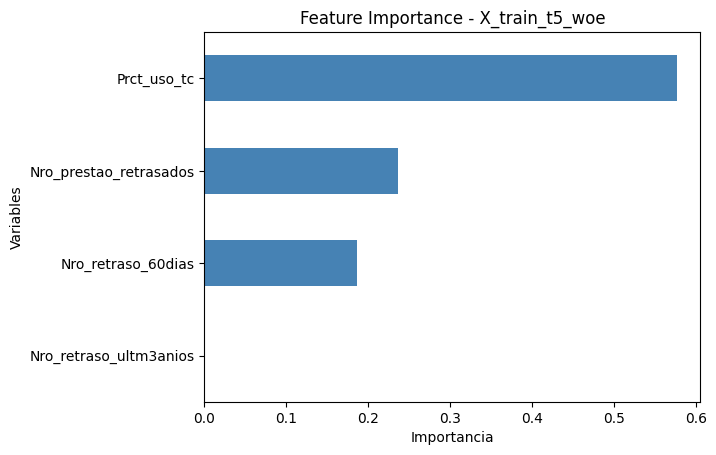


🔹 Buscando mejores hiperparámetros para: X_train_t6
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Importancia de características (X_train_t6):


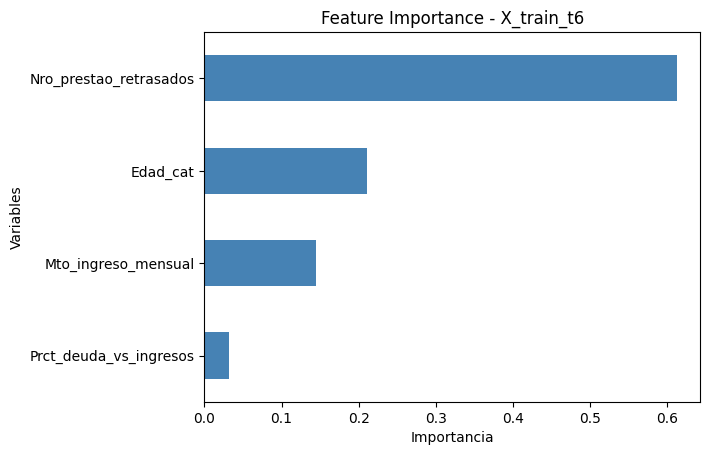


🔹 Buscando mejores hiperparámetros para: X_train_t8
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Importancia de características (X_train_t8):


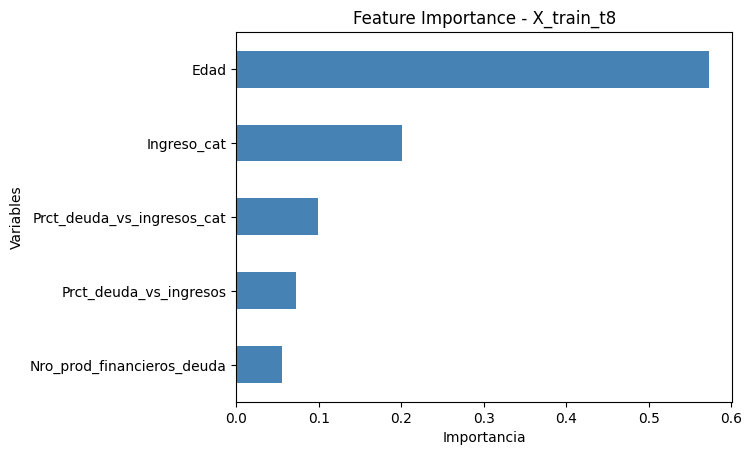


🔹 Buscando mejores hiperparámetros para: X_train_woe_enc2
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Importancia de características (X_train_woe_enc2):


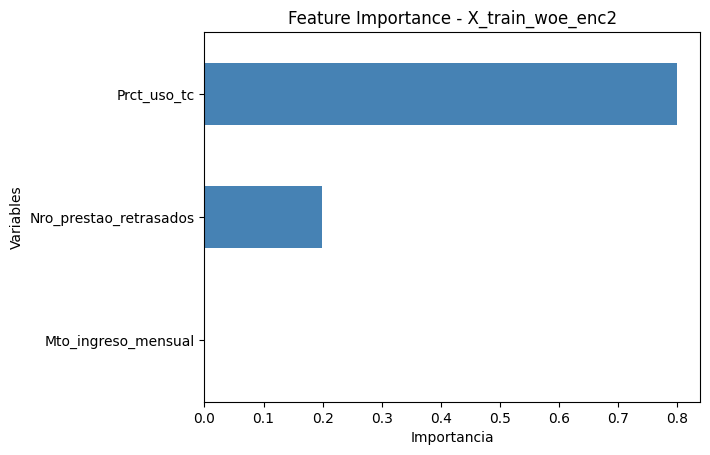


✅ Resultados finales:


,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test
0,X_train_t5_woe,14,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.794578,0.796003,0.821567,0.826958,0.738542,0.737043
1,X_train_t6,8,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.697213,0.708575,0.742061,0.764117,0.663984,0.673257
2,X_train_woe_enc2,10,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.767543,0.769658,0.732008,0.750455,0.719805,0.725510
3,X_train_t8,8,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.635638,0.641748,0.634681,0.653005,0.604294,0.616188


In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, recall_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuración de hiperparámetros para el GridSearch ---
param_grid = {
    'max_depth': [3, 5, 7, 9, 12, None],           # None = sin límite (permitir ajuste libre)
    'min_samples_split': [2, 5, 10, 20],           # control del crecimiento del árbol
    'min_samples_leaf': [1, 3, 5, 10],             # mínimo de observaciones por hoja
    'max_features': [None, 'sqrt', 'log2'],        # probar distintas estrategias de selección
    'criterion': ['gini', 'entropy', 'log_loss'],  # log_loss es útil en datos desbalanceados
#    'class_weight': [None, 'balanced']             # probar con y sin balanceo interno
}

# Diccionario de datasets
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# Lista de resultados
resultados = []

# --- Iterar sobre cada dataset ---
for nombre, (X_train, X_test) in candidatos.items():
    print(f"\n🔹 Buscando mejores hiperparámetros para: {nombre}")
    
    # Modelo base
    dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        scoring='recall',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    # Entrenamiento
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluación
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
    y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
    
    auc_train = roc_auc_score(y_train, y_pred_proba_train)
    auc_test = roc_auc_score(y_test, y_pred_proba_test)
    recall_train = recall_score(y_train, (y_pred_proba_train >= 0.5).astype(int))
    recall_test = recall_score(y_test, (y_pred_proba_test >= 0.5).astype(int))
    bal_acc_test = balanced_accuracy_score(y_test, (y_pred_proba_test >= 0.5).astype(int))
    bal_acc_train = balanced_accuracy_score(y_train, (y_pred_proba_train >= 0.5).astype(int))
    # Guardar resultados
    resultados.append({
        "Dataset": nombre,
        "n_vars": X_train.shape[1],
        "Best_Params": best_params,
        "AUC_train": auc_train,
        "AUC_test": auc_test,
        "Recall_train": recall_train,
        "Recall_test": recall_test,
        "Balanced_Accuracy_train": bal_acc_train,
        "Balanced_Accuracy_test": bal_acc_test
    })
    
    # Importancia de características
    print(f"\nImportancia de características ({nombre}):")
    fi = pd.Series(best_model.feature_importances_, index=best_model.feature_names_in_)
    fi = fi[fi > 0].sort_values(ascending=True)
    fi.plot.barh(color='steelblue')
    plt.title(f"Feature Importance - {nombre}")
    plt.xlabel("Importancia")
    plt.ylabel("Variables")
    plt.show()

# --- Crear DataFrame de resultados ---
df_resultados_grid_DT = pd.DataFrame(resultados).sort_values(
    by=["Recall_test", "AUC_test"],
    ascending=[False, False]
).reset_index(drop=True)

print("\n✅ Resultados finales:")
display(df_resultados_grid_DT)

In [171]:
X_train_t5_woe.describe().T

,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,73707.0,0.294052,0.305962,0.000000,0.037438,0.164223,0.498321,1.000000
Edad,73707.0,0.428038,0.216447,0.000000,0.269841,0.412698,0.587302,1.000000
Nro_prestao_retrasados,73707.0,0.058502,0.153187,0.000000,0.000000,0.000000,0.000000,1.000000
Prct_deuda_vs_ingresos,73707.0,0.184106,0.116609,0.000360,0.094397,0.170674,0.258000,0.513440
Mto_ingreso_mensual,73707.0,0.355684,0.223264,0.000000,0.182482,0.313869,0.492701,1.000000
Nro_prod_financieros_deuda,73707.0,0.349988,0.182272,0.000000,0.200000,0.320000,0.440000,1.000000
Nro_retraso_60dias,73707.0,0.021314,0.106936,0.000000,0.000000,0.000000,0.000000,1.000000
Nro_creditos_hipotecarios,73707.0,0.255057,0.227207,0.000000,0.000000,0.250000,0.500000,1.000000
Nro_retraso_ultm3anios,73707.0,0.025785,0.124297,0.000000,0.000000,0.000000,0.000000,1.000000
Nro_dependiente,73707.0,0.212039,0.270840,0.000000,0.000000,0.000000,0.500000,1.000000


### 7.4 Bagging: Random Forest

Un Random Forest es un conjunto (ensemble) de muchos árboles de decisión.
La idea es combinar muchos árboles débiles para obtener un modelo más estable y preciso.

🔹 Cómo funciona:

Crea muestras aleatorias del dataset (con reemplazo → bootstrap).

Entrena un árbol diferente en cada muestra.

En cada división, selecciona solo un subconjunto aleatorio de variables.

La predicción final:

Clasificación → voto mayoritario.

Regresión → promedio de las predicciones de todos los árboles.

------
✅ Ventajas:

Menos overfitting (por el promedio entre árboles).

Alta precisión.

Puede manejar muchas variables y datos faltantes.

❌ Desventajas:

Menos interpretable que un solo árbol.

Más costoso computacionalmente (entrena muchos árboles).


🔹 Buscando mejores hiperparámetros para: X_train_t5_woe
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Importancia de características (X_train_t5_woe):


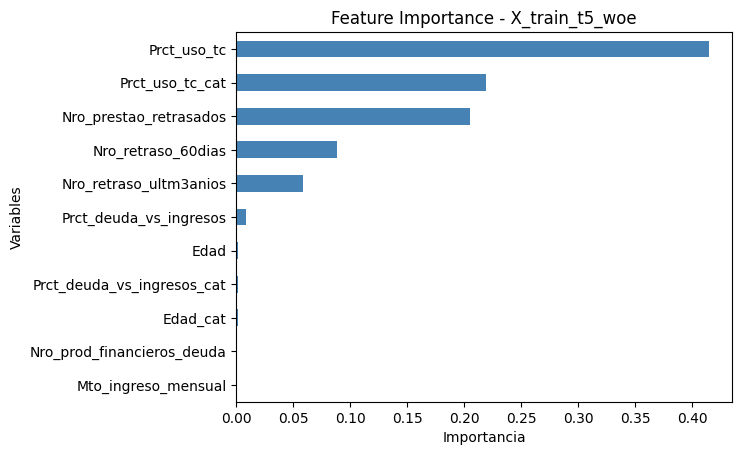


🔹 Buscando mejores hiperparámetros para: X_train_t6
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Importancia de características (X_train_t6):


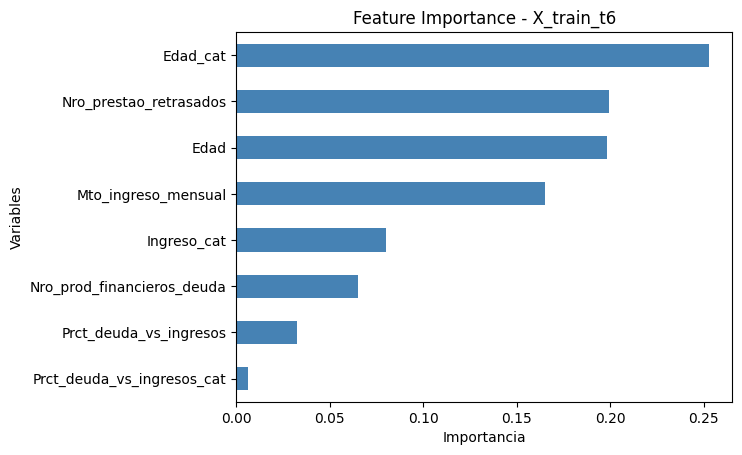


🔹 Buscando mejores hiperparámetros para: X_train_t8
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Importancia de características (X_train_t8):


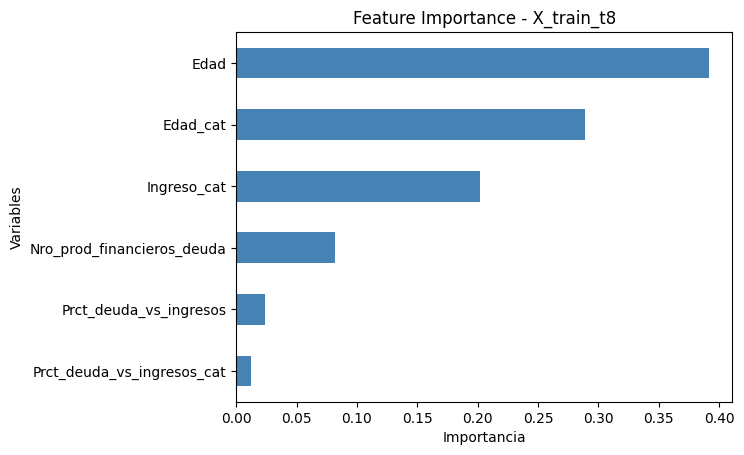


🔹 Buscando mejores hiperparámetros para: X_train_woe_enc2
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Importancia de características (X_train_woe_enc2):


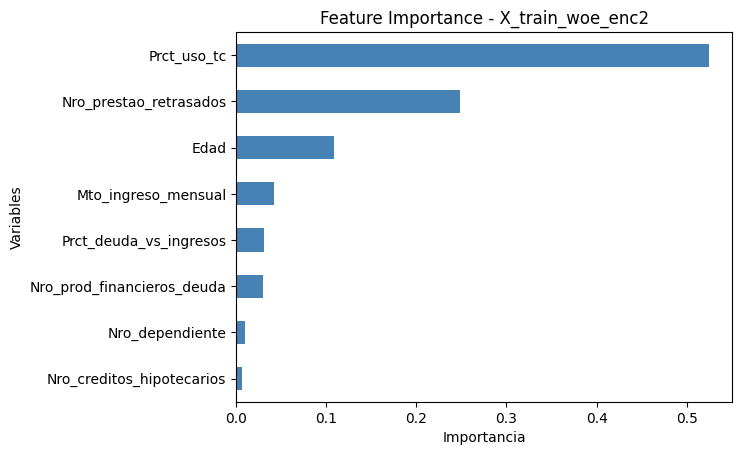


✅ Resultados finales:


,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test
0,X_train_t5_woe,14,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.818113,0.820603,0.853096,0.861566,0.737784,0.737204
1,X_train_t8,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.636041,0.650301,0.771761,0.793260,0.582953,0.597340
2,X_train_woe_enc2,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.776890,0.784077,0.732008,0.750455,0.719805,0.725510
3,X_train_t6,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.734518,0.747873,0.709847,0.745902,0.662049,0.680972


In [172]:
# --- Configuración de hiperparámetros para el GridSearch ---
param_grid_rf = dict(
     max_depth= [None, 1, 2, 3, 4, 5, 10, 15, 20],
     max_features= ['sqrt', 'log2', 0.5],
     bootstrap= [True, False],
     min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
     min_samples_leaf= [1, 2, 5] )

# Diccionario de datasets
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# Lista de resultados
resultados = []

# --- Iterar sobre cada dataset ---
for nombre, (X_train, X_test) in candidatos.items():
    print(f"\n🔹 Buscando mejores hiperparámetros para: {nombre}")
    
    # Modelo base
    rf = RandomForestClassifier(random_state=0, class_weight='balanced')
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid_rf,
        scoring='recall',
        return_train_score=True,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    # Entrenamiento
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluación
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
    y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
    
    auc_train = roc_auc_score(y_train, y_pred_proba_train)
    auc_test = roc_auc_score(y_test, y_pred_proba_test)
    recall_train = recall_score(y_train, (y_pred_proba_train >= 0.5).astype(int))
    recall_test = recall_score(y_test, (y_pred_proba_test >= 0.5).astype(int))
    bal_acc_test = balanced_accuracy_score(y_test, (y_pred_proba_test >= 0.5).astype(int))
    bal_acc_train = balanced_accuracy_score(y_train, (y_pred_proba_train >= 0.5).astype(int))
    # Guardar resultados
    resultados.append({
        "Dataset": nombre,
        "n_vars": X_train.shape[1],
        "Best_Params": best_params,
        "AUC_train": auc_train,
        "AUC_test": auc_test,
        "Recall_train": recall_train,
        "Recall_test": recall_test,
        "Balanced_Accuracy_train": bal_acc_train,
        "Balanced_Accuracy_test": bal_acc_test
    })
    
    # Importancia de características
    print(f"\nImportancia de características ({nombre}):")
    fi = pd.Series(best_model.feature_importances_, index=best_model.feature_names_in_)
    fi = fi[fi > 0].sort_values(ascending=True)
    fi.plot.barh(color='steelblue')
    plt.title(f"Feature Importance - {nombre}")
    plt.xlabel("Importancia")
    plt.ylabel("Variables")
    plt.show()

# --- Crear DataFrame de resultados ---
df_resultados_grid_rf = pd.DataFrame(resultados).sort_values(
    by=["Recall_test", "AUC_test"],
    ascending=[False, False]
).reset_index(drop=True)

print("\n✅ Resultados finales:")
display(df_resultados_grid_rf)

### 7.5 Boosting Gradient Boosting
- El Gradient Boosting combina muchos árboles de decisión débiles (shallow trees) de forma secuencial, donde cada nuevo árbol:

- Aprende a corregir los errores (residuos) cometidos por los árboles anteriores.

- Es decir, cada árbol intenta mejorar los errores del modelo anterior, en lugar de aprender todo desde cero.

*OJO* 
    
        NO presentresenta un balanceo por default, se debe tener en cuenta que debemos hacerlo con alguna técnica de balanceo

**¿Cómo funciona?**

→ Combinas ambos árboles (modelo = modelo + tasa_aprendizaje × nuevo_árbol).

→ Repites el proceso hasta que:

        El error deje de mejorar, o

        Llegues al número máximo de árboles.

**Usaremos Optuna**
¿Cómo funciona?
Optuna sigue un proceso de búsqueda inteligente (basado en Bayes).
En lugar de probar todas las combinaciones posibles (como GridSearch), Optuna:

- Empieza probando al azar algunos conjuntos de parámetros.

- Evalúa qué tan bien rinde el modelo (por ejemplo, usando el recall o AUC).

- Aprende de los resultados anteriores (usa técnicas bayesianas o de Tree-structured Parzen Estimators — TPE) para decidir qué combinaciones vale la pena probar después.

- Itera muchas veces, mejorando la búsqueda con cada intento.

- Cada intento de búsqueda se llama un trial.

In [176]:
# # --- Configuración de hiperparámetros para el GridSearch ---
# param_grid_gbc = dict(
#     n_estimators= [10, 20, 50, 100, 200, 500],  #Cantidad de árboles: Cada arbol se va a construir de forma secuencial y aprendera del anterior
    
#     learning_rate= [0.01, 0.05, 0.1, 0.2],      #Tasa de aprendizaje: Controla cuánto contribuye cada árbol al modelo final, 
#                                                 #valores más bajos requieren más árboles
    
#     max_depth= [1, 2, 3, 4, 5, 10],             #Profundidad máxima de los árboles: 
#                                                 #Controla la complejidad de cada árbol individual
    
#     max_features= ['sqrt', 'log2', 0.5, None],  #Cuántas variables se usan al construir cada árbol.
#                                                 #'sqrt' usa raíz cuadrada del total, 
#                                                 #'log2' usa logaritmo base 2, None usa todas.
    
#     subsample= [0.6, 0.8, 1.0],                 #Proporción de muestras usadas para entrenar cada árbol.
#                                                 #Valores menores a 1.0 pueden ayudar a reducir el sobreajuste.

#     min_samples_split= [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], #Control del crecimiento del árbol
#                                                          #Mayor valor = árboles más pequeños y menos complejos

#     min_samples_leaf= [1, 2, 5]                          #Mínimo de observaciones por hoja
#                                                          #Aumentar este valor puede ayudar a reducir el sobreajuste
#     )

# # Diccionario de datasets
# candidatos = {
#     "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
#     "X_train_t6": (X_train_t6, X_test_t6),
#     "X_train_t8": (X_train_t8, X_test_t8),
#     "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
# }

# # Lista de resultados
# resultados = []

# # --- Iterar sobre cada dataset ---
# for nombre, (X_train, X_test) in candidatos.items():
#     print(f"\n🔹 Buscando mejores hiperparámetros para: {nombre}")
    
#     # Modelo base
#     gbc = GradientBoostingClassifier(random_state=0) #Tener en cuenta que GradientBoostingClassifier no tiene class_weight, por lo que no se puede balancear internamente.
    
#     # GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=gbc,
#         param_grid=param_grid_gbc,
#         scoring='recall',
#         return_train_score=True,
#         cv=5,
#         n_jobs=-1,
#         verbose=1
#     )
    
#     # Entrenamiento
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_
    
#     # Evaluación
#     y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
#     y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
    
#     auc_train = roc_auc_score(y_train, y_pred_proba_train)
#     auc_test = roc_auc_score(y_test, y_pred_proba_test)
#     recall_train = recall_score(y_train, (y_pred_proba_train >= 0.5).astype(int))
#     recall_test = recall_score(y_test, (y_pred_proba_test >= 0.5).astype(int))
#     bal_acc_test = balanced_accuracy_score(y_test, (y_pred_proba_test >= 0.5).astype(int))
#     bal_acc_train = balanced_accuracy_score(y_train, (y_pred_proba_train >= 0.5).astype(int))
#     # Guardar resultados
#     resultados.append({
#         "Dataset": nombre,
#         "n_vars": X_train.shape[1],
#         "Best_Params": best_params,
#         "AUC_train": auc_train,
#         "AUC_test": auc_test,
#         "Recall_train": recall_train,
#         "Recall_test": recall_test,
#         "Balanced_Accuracy_train": bal_acc_train,
#         "Balanced_Accuracy_test": bal_acc_test
#     })
    
#     # Importancia de características
#     print(f"\nImportancia de características ({nombre}):")
#     fi = pd.Series(best_model.feature_importances_, index=best_model.feature_names_in_)
#     fi = fi[fi > 0].sort_values(ascending=True)
#     fi.plot.barh(color='steelblue')
#     plt.title(f"Feature Importance - {nombre}")
#     plt.xlabel("Importancia")
#     plt.ylabel("Variables")
#     plt.show()

# # --- Crear DataFrame de resultados ---
# df_resultados_grid_gbc = pd.DataFrame(resultados).sort_values(
#     by=["Recall_test", "AUC_test"],
#     ascending=[False, False]
# ).reset_index(drop=True)

# print("\n✅ Resultados finales:")
# display(df_resultados_grid_gbc)

[I 2025-10-19 14:48:33,400] A new study created in memory with name: no-name-0e956cb2-e5ed-4147-ae04-85cc3f49995a



🔹 Optimizando Gradient Boosting para: X_train_t5_woe


Best trial: 0. Best value: 0.119717:   2%|▏         | 1/50 [00:43<35:10, 43.07s/it]

[I 2025-10-19 14:49:16,462] Trial 0 finished with value: 0.11971715590345726 and parameters: {'n_estimators': 378, 'learning_rate': 0.08658761560317638, 'max_depth': 2, 'subsample': 0.6557755711916218, 'min_samples_split': 0.16668528807171631, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:   4%|▍         | 2/50 [01:11<27:21, 34.20s/it]

[I 2025-10-19 14:49:44,467] Trial 1 finished with value: 0.03289993476842792 and parameters: {'n_estimators': 397, 'learning_rate': 0.010157448851484015, 'max_depth': 10, 'subsample': 0.6056474661181765, 'min_samples_split': 0.18812168020550535, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:   6%|▌         | 3/50 [01:31<21:51, 27.91s/it]

[I 2025-10-19 14:50:04,889] Trial 2 finished with value: 0.10189876060013048 and parameters: {'n_estimators': 230, 'learning_rate': 0.1470883438373401, 'max_depth': 9, 'subsample': 0.6008602709711083, 'min_samples_split': 0.1258032858723547, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:   8%|▊         | 4/50 [01:52<19:24, 25.32s/it]

[I 2025-10-19 14:50:26,238] Trial 3 finished with value: 0.0993829093281148 and parameters: {'n_estimators': 244, 'learning_rate': 0.04712656714057268, 'max_depth': 6, 'subsample': 0.9481665470123886, 'min_samples_split': 0.04785817391406868, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:  10%|█         | 5/50 [02:12<17:23, 23.18s/it]

[I 2025-10-19 14:50:45,630] Trial 4 finished with value: 0.06671337247227657 and parameters: {'n_estimators': 198, 'learning_rate': 0.024266927016459314, 'max_depth': 8, 'subsample': 0.8605663037318378, 'min_samples_split': 0.09445200866135872, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:  12%|█▏        | 6/50 [02:23<14:00, 19.11s/it]

[I 2025-10-19 14:50:56,818] Trial 5 finished with value: 0.05894768427919113 and parameters: {'n_estimators': 206, 'learning_rate': 0.018160659310125424, 'max_depth': 4, 'subsample': 0.8341481415806918, 'min_samples_split': 0.12380738540256217, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:  14%|█▍        | 7/50 [02:30<10:50, 15.12s/it]

[I 2025-10-19 14:51:03,722] Trial 6 finished with value: 0.0943590345727332 and parameters: {'n_estimators': 95, 'learning_rate': 0.14535100148065289, 'max_depth': 10, 'subsample': 0.6263573776467662, 'min_samples_split': 0.12155418595525075, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:  16%|█▌        | 8/50 [02:52<12:14, 17.49s/it]

[I 2025-10-19 14:51:26,291] Trial 7 finished with value: 0.08933228962818004 and parameters: {'n_estimators': 354, 'learning_rate': 0.033366892101768734, 'max_depth': 10, 'subsample': 0.6101728000426293, 'min_samples_split': 0.1642915119101179, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 0. Best value: 0.119717:  18%|█▊        | 9/50 [03:04<10:46, 15.77s/it]

[I 2025-10-19 14:51:38,286] Trial 8 finished with value: 0.10898082191780822 and parameters: {'n_estimators': 346, 'learning_rate': 0.0244454616745265, 'max_depth': 2, 'subsample': 0.8764837730263204, 'min_samples_split': 0.14327137963885422, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.11971715590345726.


Best trial: 9. Best value: 0.127029:  20%|██        | 10/50 [03:16<09:43, 14.59s/it]

[I 2025-10-19 14:51:50,227] Trial 9 finished with value: 0.12702909328114806 and parameters: {'n_estimators': 361, 'learning_rate': 0.0798842445704972, 'max_depth': 2, 'subsample': 0.7080681030813587, 'min_samples_split': 0.1087743838775264, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  22%|██▏       | 11/50 [03:20<07:23, 11.38s/it]

[I 2025-10-19 14:51:54,319] Trial 10 finished with value: 0.0 and parameters: {'n_estimators': 21, 'learning_rate': 0.07734411799768887, 'max_depth': 5, 'subsample': 0.7427746208371964, 'min_samples_split': 0.06701847514794546, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  24%|██▍       | 12/50 [03:46<10:00, 15.80s/it]

[I 2025-10-19 14:52:20,247] Trial 11 finished with value: 0.12063222439660796 and parameters: {'n_estimators': 310, 'learning_rate': 0.0686666915831844, 'max_depth': 2, 'subsample': 0.7331923290393201, 'min_samples_split': 0.019813254160158278, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  26%|██▌       | 13/50 [04:20<13:00, 21.08s/it]

[I 2025-10-19 14:52:53,485] Trial 12 finished with value: 0.11332054794520548 and parameters: {'n_estimators': 286, 'learning_rate': 0.06969768191680707, 'max_depth': 3, 'subsample': 0.739184754457054, 'min_samples_split': 0.011249437522331193, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  28%|██▊       | 14/50 [05:03<16:36, 27.68s/it]

[I 2025-10-19 14:53:36,421] Trial 13 finished with value: 0.08704657534246575 and parameters: {'n_estimators': 294, 'learning_rate': 0.05152127831835045, 'max_depth': 4, 'subsample': 0.7089460257662401, 'min_samples_split': 0.08388354319662886, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  30%|███       | 15/50 [05:34<16:50, 28.86s/it]

[I 2025-10-19 14:54:08,006] Trial 14 finished with value: 0.11400521852576648 and parameters: {'n_estimators': 313, 'learning_rate': 0.10870384166973411, 'max_depth': 2, 'subsample': 0.7804792714213261, 'min_samples_split': 0.010998496202835058, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  32%|███▏      | 16/50 [05:47<13:36, 24.01s/it]

[I 2025-10-19 14:54:20,756] Trial 15 finished with value: 0.09207384213959556 and parameters: {'n_estimators': 171, 'learning_rate': 0.05870345284472351, 'max_depth': 7, 'subsample': 0.6953331261894161, 'min_samples_split': 0.054559844506866406, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  34%|███▍      | 17/50 [06:44<18:39, 33.91s/it]

[I 2025-10-19 14:55:17,702] Trial 16 finished with value: 0.10166705805609914 and parameters: {'n_estimators': 326, 'learning_rate': 0.19570755331047351, 'max_depth': 4, 'subsample': 0.8041762162090416, 'min_samples_split': 0.04319948959032383, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  36%|███▌      | 18/50 [06:55<14:26, 27.07s/it]

[I 2025-10-19 14:55:28,830] Trial 17 finished with value: 0.11217899543378995 and parameters: {'n_estimators': 265, 'learning_rate': 0.1039674181567341, 'max_depth': 3, 'subsample': 0.6737082602274642, 'min_samples_split': 0.07843995745301623, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  38%|███▊      | 19/50 [07:26<14:36, 28.29s/it]

[I 2025-10-19 14:55:59,958] Trial 18 finished with value: 0.08293594259621656 and parameters: {'n_estimators': 135, 'learning_rate': 0.035486602592276754, 'max_depth': 6, 'subsample': 0.7658125473282131, 'min_samples_split': 0.02870254201041559, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  40%|████      | 20/50 [07:44<12:35, 25.19s/it]

[I 2025-10-19 14:56:17,928] Trial 19 finished with value: 0.1117197651663405 and parameters: {'n_estimators': 356, 'learning_rate': 0.12102362530270862, 'max_depth': 3, 'subsample': 0.9758137991642898, 'min_samples_split': 0.10759137946737585, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  42%|████▏     | 21/50 [08:33<15:39, 32.39s/it]

[I 2025-10-19 14:57:07,091] Trial 20 finished with value: 0.07790763209393348 and parameters: {'n_estimators': 275, 'learning_rate': 0.038933448381159336, 'max_depth': 5, 'subsample': 0.7260813240418376, 'min_samples_split': 0.06738032880596712, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  44%|████▍     | 22/50 [09:06<15:12, 32.60s/it]

[I 2025-10-19 14:57:40,187] Trial 21 finished with value: 0.11537716894977168 and parameters: {'n_estimators': 392, 'learning_rate': 0.08442400567905639, 'max_depth': 2, 'subsample': 0.657782560919289, 'min_samples_split': 0.18947510932180994, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  46%|████▌     | 23/50 [09:40<14:52, 33.06s/it]

[I 2025-10-19 14:58:14,314] Trial 22 finished with value: 0.11606210045662099 and parameters: {'n_estimators': 382, 'learning_rate': 0.08941101096982317, 'max_depth': 2, 'subsample': 0.6613649754673943, 'min_samples_split': 0.1587144160080762, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  48%|████▊     | 24/50 [10:23<15:33, 35.90s/it]

[I 2025-10-19 14:58:56,860] Trial 23 finished with value: 0.10029615133724723 and parameters: {'n_estimators': 327, 'learning_rate': 0.06602452509632556, 'max_depth': 3, 'subsample': 0.6920469016175895, 'min_samples_split': 0.1690798047205104, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  50%|█████     | 25/50 [10:59<14:56, 35.85s/it]

[I 2025-10-19 14:59:32,585] Trial 24 finished with value: 0.11537664709719504 and parameters: {'n_estimators': 368, 'learning_rate': 0.05519046334778845, 'max_depth': 2, 'subsample': 0.8029606859737113, 'min_samples_split': 0.14558228902603898, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  52%|█████▏    | 26/50 [11:10<11:26, 28.61s/it]

[I 2025-10-19 14:59:44,292] Trial 25 finished with value: 0.11058030006523159 and parameters: {'n_estimators': 316, 'learning_rate': 0.15117288621611502, 'max_depth': 3, 'subsample': 0.6514585346114722, 'min_samples_split': 0.14539810170012046, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  54%|█████▍    | 27/50 [12:13<14:54, 38.89s/it]

[I 2025-10-19 15:00:47,187] Trial 26 finished with value: 0.09115929549902152 and parameters: {'n_estimators': 344, 'learning_rate': 0.09319706723714555, 'max_depth': 5, 'subsample': 0.7610784221799857, 'min_samples_split': 0.10757215275644813, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  56%|█████▌    | 28/50 [13:05<15:42, 42.84s/it]

[I 2025-10-19 15:01:39,215] Trial 27 finished with value: 0.09869719504240052 and parameters: {'n_estimators': 371, 'learning_rate': 0.06796047715183748, 'max_depth': 4, 'subsample': 0.7141911648121191, 'min_samples_split': 0.17845880633775266, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  58%|█████▊    | 29/50 [13:18<11:49, 33.77s/it]

[I 2025-10-19 15:01:51,830] Trial 28 finished with value: 0.1222327462491846 and parameters: {'n_estimators': 399, 'learning_rate': 0.11850240244637852, 'max_depth': 2, 'subsample': 0.6443893037501789, 'min_samples_split': 0.19769446004271704, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  60%|██████    | 30/50 [13:30<09:05, 27.29s/it]

[I 2025-10-19 15:02:04,006] Trial 29 finished with value: 0.11949093281148075 and parameters: {'n_estimators': 400, 'learning_rate': 0.12223058837750034, 'max_depth': 2, 'subsample': 0.634345837452582, 'min_samples_split': 0.19748550096971546, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  62%|██████▏   | 31/50 [13:42<07:11, 22.69s/it]

[I 2025-10-19 15:02:15,955] Trial 30 finished with value: 0.11217795172863665 and parameters: {'n_estimators': 303, 'learning_rate': 0.19515587642038162, 'max_depth': 3, 'subsample': 0.6940793247755607, 'min_samples_split': 0.03252432344947698, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  64%|██████▍   | 32/50 [13:54<05:48, 19.35s/it]

[I 2025-10-19 15:02:27,531] Trial 31 finished with value: 0.12108858447488582 and parameters: {'n_estimators': 382, 'learning_rate': 0.08192969798972517, 'max_depth': 2, 'subsample': 0.6719442156097386, 'min_samples_split': 0.17937520649190852, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  66%|██████▌   | 33/50 [14:06<04:51, 17.17s/it]

[I 2025-10-19 15:02:39,619] Trial 32 finished with value: 0.12337325505544683 and parameters: {'n_estimators': 399, 'learning_rate': 0.08429217666424081, 'max_depth': 2, 'subsample': 0.6747825476134939, 'min_samples_split': 0.17947798860546577, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  68%|██████▊   | 34/50 [14:20<04:22, 16.42s/it]

[I 2025-10-19 15:02:54,268] Trial 33 finished with value: 0.055063013698630134 and parameters: {'n_estimators': 396, 'learning_rate': 0.0104082378795865, 'max_depth': 3, 'subsample': 0.6364584636432238, 'min_samples_split': 0.17710435072174735, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  70%|███████   | 35/50 [14:33<03:47, 15.20s/it]

[I 2025-10-19 15:03:06,623] Trial 34 finished with value: 0.12360182648401825 and parameters: {'n_estimators': 373, 'learning_rate': 0.144981817860663, 'max_depth': 2, 'subsample': 0.6776354417844099, 'min_samples_split': 0.19710685415796791, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  72%|███████▏  | 36/50 [14:51<03:47, 16.24s/it]

[I 2025-10-19 15:03:25,280] Trial 35 finished with value: 0.10052654924983692 and parameters: {'n_estimators': 338, 'learning_rate': 0.1626453175967149, 'max_depth': 7, 'subsample': 0.6150886656340208, 'min_samples_split': 0.19306974658435283, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  74%|███████▍  | 37/50 [15:07<03:28, 16.08s/it]

[I 2025-10-19 15:03:40,978] Trial 36 finished with value: 0.09915329419439009 and parameters: {'n_estimators': 363, 'learning_rate': 0.12440270816730828, 'max_depth': 4, 'subsample': 0.6804916128434326, 'min_samples_split': 0.19833639416762722, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  76%|███████▌  | 38/50 [15:17<02:49, 14.16s/it]

[I 2025-10-19 15:03:50,673] Trial 37 finished with value: 0.11103848662752772 and parameters: {'n_estimators': 248, 'learning_rate': 0.10242752476912524, 'max_depth': 3, 'subsample': 0.640742259969619, 'min_samples_split': 0.15174421186033404, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  78%|███████▊  | 39/50 [15:41<03:09, 17.19s/it]

[I 2025-10-19 15:04:14,924] Trial 38 finished with value: 0.1055525114155251 and parameters: {'n_estimators': 381, 'learning_rate': 0.16384279859099007, 'max_depth': 9, 'subsample': 0.6023423692555309, 'min_samples_split': 0.18352377279195306, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  80%|████████  | 40/50 [15:42<02:02, 12.27s/it]

[I 2025-10-19 15:04:15,709] Trial 39 finished with value: 0.0 and parameters: {'n_estimators': 12, 'learning_rate': 0.10785842392346731, 'max_depth': 2, 'subsample': 0.9088038389531004, 'min_samples_split': 0.13445088828569723, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  82%|████████▏ | 41/50 [15:46<01:27,  9.76s/it]

[I 2025-10-19 15:04:19,628] Trial 40 finished with value: 0.10692341813437704 and parameters: {'n_estimators': 75, 'learning_rate': 0.13025238702613792, 'max_depth': 4, 'subsample': 0.7083987996760042, 'min_samples_split': 0.16608133283816895, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  84%|████████▍ | 42/50 [15:57<01:21, 10.19s/it]

[I 2025-10-19 15:04:30,809] Trial 41 finished with value: 0.12108832354859751 and parameters: {'n_estimators': 377, 'learning_rate': 0.08010575987889253, 'max_depth': 2, 'subsample': 0.673073397483237, 'min_samples_split': 0.17810925600091485, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  86%|████████▌ | 43/50 [16:09<01:15, 10.81s/it]

[I 2025-10-19 15:04:43,057] Trial 42 finished with value: 0.12314494455316374 and parameters: {'n_estimators': 399, 'learning_rate': 0.04632245009007515, 'max_depth': 2, 'subsample': 0.6721983053317453, 'min_samples_split': 0.18785183771138872, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  88%|████████▊ | 44/50 [16:22<01:07, 11.27s/it]

[I 2025-10-19 15:04:55,409] Trial 43 finished with value: 0.12200234833659492 and parameters: {'n_estimators': 399, 'learning_rate': 0.04316686056078571, 'max_depth': 2, 'subsample': 0.6219583083256937, 'min_samples_split': 0.19957298357295006, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  90%|█████████ | 45/50 [16:35<00:59, 11.97s/it]

[I 2025-10-19 15:05:09,015] Trial 44 finished with value: 0.1048696673189824 and parameters: {'n_estimators': 348, 'learning_rate': 0.02808692942202482, 'max_depth': 3, 'subsample': 0.7176423454379132, 'min_samples_split': 0.18781046267845025, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  92%|█████████▏| 46/50 [16:46<00:46, 11.71s/it]

[I 2025-10-19 15:05:20,126] Trial 45 finished with value: 0.12108884540117418 and parameters: {'n_estimators': 360, 'learning_rate': 0.04676401138987752, 'max_depth': 2, 'subsample': 0.6480488581864977, 'min_samples_split': 0.17032855961963744, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  94%|█████████▍| 47/50 [16:55<00:32, 10.88s/it]

[I 2025-10-19 15:05:29,062] Trial 46 finished with value: 0.11103692106979779 and parameters: {'n_estimators': 206, 'learning_rate': 0.14099274311293858, 'max_depth': 3, 'subsample': 0.8305002478034129, 'min_samples_split': 0.1577885947952631, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  96%|█████████▌| 48/50 [17:06<00:21, 10.88s/it]

[I 2025-10-19 15:05:39,931] Trial 47 finished with value: 0.1233737769080235 and parameters: {'n_estimators': 337, 'learning_rate': 0.059516407080253686, 'max_depth': 2, 'subsample': 0.6861095799353059, 'min_samples_split': 0.13464190436464332, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029:  98%|█████████▊| 49/50 [17:33<00:15, 15.63s/it]

[I 2025-10-19 15:06:06,660] Trial 48 finished with value: 0.09504553163731247 and parameters: {'n_estimators': 322, 'learning_rate': 0.06100908518719958, 'max_depth': 9, 'subsample': 0.7505817977187963, 'min_samples_split': 0.12030841456981689, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.12702909328114806.


Best trial: 9. Best value: 0.127029: 100%|██████████| 50/50 [17:54<00:00, 21.50s/it]


[I 2025-10-19 15:06:28,187] Trial 49 finished with value: 0.09755642530984995 and parameters: {'n_estimators': 336, 'learning_rate': 0.04862314002327711, 'max_depth': 7, 'subsample': 0.6911491252499888, 'min_samples_split': 0.09533605728471849, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 9 with value: 0.12702909328114806.


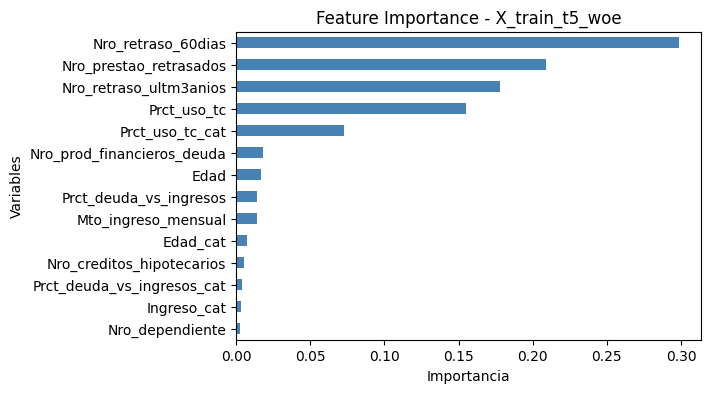

[I 2025-10-19 15:06:36,513] A new study created in memory with name: no-name-dedffb2f-c11d-4537-a112-00810012cdd3



🔹 Optimizando Gradient Boosting para: X_train_t6


Best trial: 0. Best value: 0:   2%|▏         | 1/50 [00:01<01:00,  1.24s/it]

[I 2025-10-19 15:06:37,739] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 39, 'learning_rate': 0.08721991835704523, 'max_depth': 2, 'subsample': 0.6299778010726989, 'min_samples_split': 0.07057787627610289, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:   4%|▍         | 2/50 [00:10<04:46,  5.96s/it]

[I 2025-10-19 15:06:47,006] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 127, 'learning_rate': 0.02276107844213651, 'max_depth': 9, 'subsample': 0.9189995202214826, 'min_samples_split': 0.07940932215664853, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 2. Best value: 0.00479896:   6%|▌         | 3/50 [00:32<10:20, 13.20s/it]

[I 2025-10-19 15:07:08,840] Trial 2 finished with value: 0.004798956294846705 and parameters: {'n_estimators': 258, 'learning_rate': 0.05734238228121605, 'max_depth': 9, 'subsample': 0.7887037369060715, 'min_samples_split': 0.1650466256103222, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.004798956294846705.


Best trial: 3. Best value: 0.00890907:   8%|▊         | 4/50 [00:37<07:46, 10.14s/it]

[I 2025-10-19 15:07:14,288] Trial 3 finished with value: 0.008909067188519243 and parameters: {'n_estimators': 48, 'learning_rate': 0.10051126432274089, 'max_depth': 10, 'subsample': 0.7876394069841954, 'min_samples_split': 0.020456971581797087, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 3 with value: 0.008909067188519243.


Best trial: 4. Best value: 0.0162213:  10%|█         | 5/50 [00:54<09:18, 12.41s/it] 

[I 2025-10-19 15:07:30,705] Trial 4 finished with value: 0.01622126549249837 and parameters: {'n_estimators': 300, 'learning_rate': 0.13177323442490185, 'max_depth': 5, 'subsample': 0.6758399681231654, 'min_samples_split': 0.04346753702793547, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 4 with value: 0.01622126549249837.


Best trial: 4. Best value: 0.0162213:  12%|█▏        | 6/50 [01:10<10:02, 13.69s/it]

[I 2025-10-19 15:07:46,879] Trial 5 finished with value: 0.006398173515981734 and parameters: {'n_estimators': 277, 'learning_rate': 0.05360456484020021, 'max_depth': 2, 'subsample': 0.7669339556003237, 'min_samples_split': 0.1413663168718303, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 4 with value: 0.01622126549249837.


Best trial: 4. Best value: 0.0162213:  14%|█▍        | 7/50 [01:22<09:19, 13.01s/it]

[I 2025-10-19 15:07:58,501] Trial 6 finished with value: 0.0016 and parameters: {'n_estimators': 365, 'learning_rate': 0.016010473395917664, 'max_depth': 2, 'subsample': 0.9500945746451621, 'min_samples_split': 0.0878214940785556, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.01622126549249837.


Best trial: 4. Best value: 0.0162213:  16%|█▌        | 8/50 [01:33<08:40, 12.38s/it]

[I 2025-10-19 15:08:09,549] Trial 7 finished with value: 0.00411324200913242 and parameters: {'n_estimators': 291, 'learning_rate': 0.04293849693309303, 'max_depth': 2, 'subsample': 0.9358227408455726, 'min_samples_split': 0.0945320006481548, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 4 with value: 0.01622126549249837.


Best trial: 4. Best value: 0.0162213:  18%|█▊        | 9/50 [01:41<07:34, 11.10s/it]

[I 2025-10-19 15:08:17,800] Trial 8 finished with value: 0.0013709067188519245 and parameters: {'n_estimators': 187, 'learning_rate': 0.055605683372678495, 'max_depth': 3, 'subsample': 0.7654323106034954, 'min_samples_split': 0.19767297478353585, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 4 with value: 0.01622126549249837.


Best trial: 4. Best value: 0.0162213:  20%|██        | 10/50 [01:51<07:13, 10.85s/it]

[I 2025-10-19 15:08:28,102] Trial 9 finished with value: 0.014849315068493152 and parameters: {'n_estimators': 147, 'learning_rate': 0.19193974462660893, 'max_depth': 5, 'subsample': 0.9526641926398467, 'min_samples_split': 0.053461249616509145, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 4 with value: 0.01622126549249837.


Best trial: 10. Best value: 0.0411251:  22%|██▏       | 11/50 [02:37<13:59, 21.52s/it]

[I 2025-10-19 15:09:13,821] Trial 10 finished with value: 0.04112511415525114 and parameters: {'n_estimators': 393, 'learning_rate': 0.19705745695512983, 'max_depth': 6, 'subsample': 0.600938256752773, 'min_samples_split': 0.020307150283564876, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 10 with value: 0.04112511415525114.


Best trial: 10. Best value: 0.0411251:  24%|██▍       | 12/50 [03:23<18:18, 28.91s/it]

[I 2025-10-19 15:09:59,651] Trial 11 finished with value: 0.03678251793868232 and parameters: {'n_estimators': 385, 'learning_rate': 0.17845201110276326, 'max_depth': 6, 'subsample': 0.6009599234411246, 'min_samples_split': 0.012326634594738746, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 10 with value: 0.04112511415525114.


Best trial: 12. Best value: 0.0527729:  26%|██▌       | 13/50 [04:16<22:23, 36.31s/it]

[I 2025-10-19 15:10:52,976] Trial 12 finished with value: 0.052772863666014344 and parameters: {'n_estimators': 390, 'learning_rate': 0.18179276909255843, 'max_depth': 7, 'subsample': 0.6029883480757329, 'min_samples_split': 0.010079862463362559, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  28%|██▊       | 14/50 [05:09<24:52, 41.46s/it]

[I 2025-10-19 15:11:46,327] Trial 13 finished with value: 0.022846444879321588 and parameters: {'n_estimators': 360, 'learning_rate': 0.1168725159565495, 'max_depth': 7, 'subsample': 0.6896635635130705, 'min_samples_split': 0.03811306301521712, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  30%|███       | 15/50 [06:01<25:57, 44.50s/it]

[I 2025-10-19 15:12:37,897] Trial 14 finished with value: 0.0 and parameters: {'n_estimators': 400, 'learning_rate': 0.010094003021682448, 'max_depth': 7, 'subsample': 0.6904940528526224, 'min_samples_split': 0.1223257045708964, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  32%|███▏      | 16/50 [07:01<27:50, 49.14s/it]

[I 2025-10-19 15:13:37,776] Trial 15 finished with value: 0.04066666666666667 and parameters: {'n_estimators': 327, 'learning_rate': 0.18762954927739373, 'max_depth': 7, 'subsample': 0.8507336613945169, 'min_samples_split': 0.01398900839815936, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  34%|███▍      | 17/50 [07:36<24:45, 45.02s/it]

[I 2025-10-19 15:14:13,232] Trial 16 finished with value: 0.0031986953685583823 and parameters: {'n_estimators': 335, 'learning_rate': 0.03473974355042407, 'max_depth': 5, 'subsample': 0.6437203287229188, 'min_samples_split': 0.053584598634635425, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  36%|███▌      | 18/50 [08:14<22:47, 42.73s/it]

[I 2025-10-19 15:14:50,650] Trial 17 finished with value: 0.013936594911937378 and parameters: {'n_estimators': 213, 'learning_rate': 0.08267638553699735, 'max_depth': 8, 'subsample': 0.7260524307168102, 'min_samples_split': 0.034818140936584675, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  38%|███▊      | 19/50 [08:40<19:28, 37.70s/it]

[I 2025-10-19 15:15:16,610] Trial 18 finished with value: 0.00982361382909328 and parameters: {'n_estimators': 239, 'learning_rate': 0.13760913668089858, 'max_depth': 4, 'subsample': 0.8560029473041926, 'min_samples_split': 0.11100032750424696, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  40%|████      | 20/50 [09:18<18:55, 37.86s/it]

[I 2025-10-19 15:15:54,839] Trial 19 finished with value: 0.010737638617090673 and parameters: {'n_estimators': 326, 'learning_rate': 0.0693749083231204, 'max_depth': 6, 'subsample': 0.6174952371970882, 'min_samples_split': 0.06332249996560052, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  42%|████▏     | 21/50 [09:34<15:10, 31.41s/it]

[I 2025-10-19 15:16:11,209] Trial 20 finished with value: 0.015535551206784085 and parameters: {'n_estimators': 99, 'learning_rate': 0.14176196109425096, 'max_depth': 8, 'subsample': 0.664104214118082, 'min_samples_split': 0.02747892351827327, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  44%|████▍     | 22/50 [10:35<18:42, 40.08s/it]

[I 2025-10-19 15:17:11,507] Trial 21 finished with value: 0.03815394651011089 and parameters: {'n_estimators': 335, 'learning_rate': 0.18214206407639616, 'max_depth': 7, 'subsample': 0.8300613155014555, 'min_samples_split': 0.017506914975599006, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  46%|████▌     | 23/50 [11:41<21:35, 47.97s/it]

[I 2025-10-19 15:18:17,887] Trial 22 finished with value: 0.04226718851924331 and parameters: {'n_estimators': 398, 'learning_rate': 0.1986044047338526, 'max_depth': 6, 'subsample': 0.8896736451924594, 'min_samples_split': 0.010919114831153418, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  48%|████▊     | 24/50 [12:28<20:42, 47.78s/it]

[I 2025-10-19 15:19:05,208] Trial 23 finished with value: 0.02650228310502283 and parameters: {'n_estimators': 374, 'learning_rate': 0.14529382250659656, 'max_depth': 4, 'subsample': 0.9988018901444435, 'min_samples_split': 0.010241888090321182, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  50%|█████     | 25/50 [13:22<20:41, 49.67s/it]

[I 2025-10-19 15:19:59,303] Trial 24 finished with value: 0.019876320939334637 and parameters: {'n_estimators': 398, 'learning_rate': 0.10799181153745548, 'max_depth': 6, 'subsample': 0.7265255310317216, 'min_samples_split': 0.037755338274482866, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  52%|█████▏    | 26/50 [13:48<17:01, 42.58s/it]

[I 2025-10-19 15:20:25,347] Trial 25 finished with value: 0.029244096542726684 and parameters: {'n_estimators': 355, 'learning_rate': 0.15500840911353597, 'max_depth': 8, 'subsample': 0.8937397081714804, 'min_samples_split': 0.057168031310928416, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  54%|█████▍    | 27/50 [14:25<15:36, 40.73s/it]

[I 2025-10-19 15:21:01,755] Trial 26 finished with value: 0.024444618395303326 and parameters: {'n_estimators': 314, 'learning_rate': 0.1983344808376843, 'max_depth': 4, 'subsample': 0.8848194764404383, 'min_samples_split': 0.028866181136281435, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  56%|█████▌    | 28/50 [15:08<15:12, 41.47s/it]

[I 2025-10-19 15:21:44,952] Trial 27 finished with value: 0.0038841487279843447 and parameters: {'n_estimators': 400, 'learning_rate': 0.03020209698156069, 'max_depth': 5, 'subsample': 0.6465111797801433, 'min_samples_split': 0.0441489519612925, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  58%|█████▊    | 29/50 [15:58<15:26, 44.10s/it]

[I 2025-10-19 15:22:35,180] Trial 28 finished with value: 0.02216125244618395 and parameters: {'n_estimators': 362, 'learning_rate': 0.0858287587263541, 'max_depth': 6, 'subsample': 0.7228951587890474, 'min_samples_split': 0.02481013885024904, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  60%|██████    | 30/50 [16:10<11:25, 34.29s/it]

[I 2025-10-19 15:22:46,595] Trial 29 finished with value: 0.01210880626223092 and parameters: {'n_estimators': 255, 'learning_rate': 0.10318035494895232, 'max_depth': 6, 'subsample': 0.6049754692474542, 'min_samples_split': 0.07951676217893075, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  62%|██████▏   | 31/50 [16:12<07:47, 24.60s/it]

[I 2025-10-19 15:22:48,581] Trial 30 finished with value: 0.0 and parameters: {'n_estimators': 12, 'learning_rate': 0.07433525072569355, 'max_depth': 9, 'subsample': 0.6331756993313563, 'min_samples_split': 0.07143105495264657, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  64%|██████▍   | 32/50 [17:15<10:51, 36.18s/it]

[I 2025-10-19 15:23:51,768] Trial 31 finished with value: 0.03975238095238095 and parameters: {'n_estimators': 344, 'learning_rate': 0.1650914528928572, 'max_depth': 7, 'subsample': 0.844718745907495, 'min_samples_split': 0.012535617027531698, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  66%|██████▌   | 33/50 [18:21<12:48, 45.18s/it]

[I 2025-10-19 15:24:57,960] Trial 32 finished with value: 0.044092628832354853 and parameters: {'n_estimators': 374, 'learning_rate': 0.19988384763170905, 'max_depth': 7, 'subsample': 0.8226914568586878, 'min_samples_split': 0.026224914359511957, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  68%|██████▊   | 34/50 [18:47<10:30, 39.42s/it]

[I 2025-10-19 15:25:23,928] Trial 33 finished with value: 0.02970150032615786 and parameters: {'n_estimators': 380, 'learning_rate': 0.11801518613006792, 'max_depth': 8, 'subsample': 0.8262234117748308, 'min_samples_split': 0.029129421093034513, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  70%|███████   | 35/50 [19:57<12:10, 48.70s/it]

[I 2025-10-19 15:26:34,280] Trial 34 finished with value: 0.028559165035877365 and parameters: {'n_estimators': 379, 'learning_rate': 0.15784812986526817, 'max_depth': 7, 'subsample': 0.8851401735915095, 'min_samples_split': 0.046510266242363665, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  72%|███████▏  | 36/50 [21:10<13:02, 55.89s/it]

[I 2025-10-19 15:27:46,942] Trial 35 finished with value: 0.0333573385518591 and parameters: {'n_estimators': 298, 'learning_rate': 0.11721293472104916, 'max_depth': 10, 'subsample': 0.8090896304262332, 'min_samples_split': 0.023492728088728106, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  74%|███████▍  | 37/50 [22:15<12:43, 58.69s/it]

[I 2025-10-19 15:28:52,183] Trial 36 finished with value: 0.024903326810176124 and parameters: {'n_estimators': 355, 'learning_rate': 0.19957353988354387, 'max_depth': 9, 'subsample': 0.7523684120538844, 'min_samples_split': 0.16518397288927736, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  76%|███████▌  | 38/50 [22:30<09:04, 45.40s/it]

[I 2025-10-19 15:29:06,578] Trial 37 finished with value: 0.015078408349641225 and parameters: {'n_estimators': 274, 'learning_rate': 0.1315739625191855, 'max_depth': 5, 'subsample': 0.7974969495148871, 'min_samples_split': 0.07216728705179848, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  78%|███████▊  | 39/50 [23:00<07:31, 41.04s/it]

[I 2025-10-19 15:29:37,448] Trial 38 finished with value: 0.002742074363992172 and parameters: {'n_estimators': 315, 'learning_rate': 0.018636752929267517, 'max_depth': 8, 'subsample': 0.9096132218113742, 'min_samples_split': 0.0340746275186158, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  80%|████████  | 40/50 [23:15<05:31, 33.16s/it]

[I 2025-10-19 15:29:52,209] Trial 39 finished with value: 0.008909849967384214 and parameters: {'n_estimators': 89, 'learning_rate': 0.09412370258429559, 'max_depth': 6, 'subsample': 0.8657726510133287, 'min_samples_split': 0.02058058478009226, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  82%|████████▏ | 41/50 [23:32<04:15, 28.34s/it]

[I 2025-10-19 15:30:09,322] Trial 40 finished with value: 0.018278147423352903 and parameters: {'n_estimators': 178, 'learning_rate': 0.15889956851037348, 'max_depth': 7, 'subsample': 0.9825113898768773, 'min_samples_split': 0.04497941140624451, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  84%|████████▍ | 42/50 [24:41<05:22, 40.36s/it]

[I 2025-10-19 15:31:17,723] Trial 41 finished with value: 0.037924853228962815 and parameters: {'n_estimators': 381, 'learning_rate': 0.16817172254250487, 'max_depth': 7, 'subsample': 0.8185460417639098, 'min_samples_split': 0.019867454628750524, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  86%|████████▌ | 43/50 [25:38<05:17, 45.30s/it]

[I 2025-10-19 15:32:14,551] Trial 42 finished with value: 0.031984605348988907 and parameters: {'n_estimators': 346, 'learning_rate': 0.12966285383045895, 'max_depth': 6, 'subsample': 0.8684320761736293, 'min_samples_split': 0.012430318737466766, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  88%|████████▊ | 44/50 [26:32<04:47, 47.90s/it]

[I 2025-10-19 15:33:08,520] Trial 43 finished with value: 0.03723861709067188 and parameters: {'n_estimators': 316, 'learning_rate': 0.19822031735689716, 'max_depth': 7, 'subsample': 0.7845687626221866, 'min_samples_split': 0.020535937552861587, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  90%|█████████ | 45/50 [27:35<04:22, 52.51s/it]

[I 2025-10-19 15:34:11,803] Trial 44 finished with value: 0.037468754076973254 and parameters: {'n_estimators': 369, 'learning_rate': 0.17091660945566825, 'max_depth': 6, 'subsample': 0.914917800805524, 'min_samples_split': 0.010809588582503828, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  92%|█████████▏| 46/50 [28:28<03:30, 52.67s/it]

[I 2025-10-19 15:35:04,830] Trial 45 finished with value: 0.01782074363992172 and parameters: {'n_estimators': 390, 'learning_rate': 0.17420325055221952, 'max_depth': 5, 'subsample': 0.84477393507125, 'min_samples_split': 0.1464283625482042, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  94%|█████████▍| 47/50 [29:29<02:45, 55.14s/it]

[I 2025-10-19 15:36:05,744] Trial 46 finished with value: 0.013251663405088062 and parameters: {'n_estimators': 369, 'learning_rate': 0.04571558936541541, 'max_depth': 8, 'subsample': 0.6653233168294339, 'min_samples_split': 0.030443359977564644, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  96%|█████████▌| 48/50 [29:54<01:32, 46.15s/it]

[I 2025-10-19 15:36:30,927] Trial 47 finished with value: 0.017821526418786694 and parameters: {'n_estimators': 282, 'learning_rate': 0.12779489022061863, 'max_depth': 7, 'subsample': 0.9520567646441351, 'min_samples_split': 0.06234004212234059, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729:  98%|█████████▊| 49/50 [30:53<00:50, 50.03s/it]

[I 2025-10-19 15:37:30,015] Trial 48 finished with value: 0.02536020874103066 and parameters: {'n_estimators': 340, 'learning_rate': 0.1468789833691462, 'max_depth': 6, 'subsample': 0.9330955400693706, 'min_samples_split': 0.038057863519908613, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


Best trial: 12. Best value: 0.0527729: 100%|██████████| 50/50 [31:34<00:00, 37.89s/it]


[I 2025-10-19 15:38:10,854] Trial 49 finished with value: 0.011424396607958253 and parameters: {'n_estimators': 400, 'learning_rate': 0.06533872006683059, 'max_depth': 5, 'subsample': 0.6208076330174095, 'min_samples_split': 0.04955831898885781, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 12 with value: 0.052772863666014344.


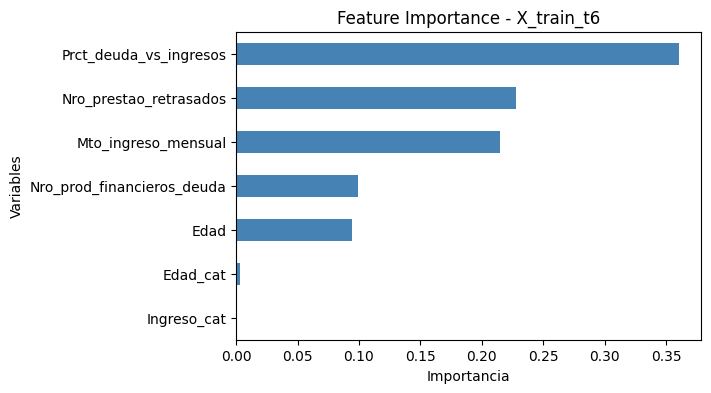

[I 2025-10-19 15:38:55,652] A new study created in memory with name: no-name-3707d576-1f1e-4105-b05a-ee7f26284d60



🔹 Optimizando Gradient Boosting para: X_train_t8


Best trial: 0. Best value: 0:   2%|▏         | 1/50 [00:00<00:46,  1.05it/s]

[I 2025-10-19 15:38:56,597] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 19, 'learning_rate': 0.022394944290081955, 'max_depth': 10, 'subsample': 0.7097842278835964, 'min_samples_split': 0.09417307709206399, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:   4%|▍         | 2/50 [00:11<05:29,  6.86s/it]

[I 2025-10-19 15:39:07,589] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 151, 'learning_rate': 0.01132075999366054, 'max_depth': 10, 'subsample': 0.9840923658610222, 'min_samples_split': 0.12193513376346786, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:   6%|▌         | 3/50 [00:20<06:04,  7.75s/it]

[I 2025-10-19 15:39:16,388] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 302, 'learning_rate': 0.16079309173983472, 'max_depth': 4, 'subsample': 0.643586095273764, 'min_samples_split': 0.1363502497491466, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:   8%|▊         | 4/50 [00:31<06:52,  8.97s/it]

[I 2025-10-19 15:39:27,233] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 278, 'learning_rate': 0.1570121803185775, 'max_depth': 6, 'subsample': 0.8275822672018038, 'min_samples_split': 0.07261588375766155, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  10%|█         | 5/50 [00:39<06:30,  8.67s/it]

[I 2025-10-19 15:39:35,384] Trial 4 finished with value: 0.0 and parameters: {'n_estimators': 232, 'learning_rate': 0.01284630471296107, 'max_depth': 6, 'subsample': 0.9244073108976072, 'min_samples_split': 0.12186178321464135, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  12%|█▏        | 6/50 [00:41<04:45,  6.49s/it]

[I 2025-10-19 15:39:37,636] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 61, 'learning_rate': 0.05297414592962945, 'max_depth': 5, 'subsample': 0.8169273628823707, 'min_samples_split': 0.15235202286266536, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  14%|█▍        | 7/50 [00:46<04:08,  5.78s/it]

[I 2025-10-19 15:39:41,966] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 141, 'learning_rate': 0.05003990361559711, 'max_depth': 5, 'subsample': 0.8168887442793834, 'min_samples_split': 0.1891561369998024, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  16%|█▌        | 8/50 [00:50<03:41,  5.27s/it]

[I 2025-10-19 15:39:46,135] Trial 7 finished with value: 0.0 and parameters: {'n_estimators': 146, 'learning_rate': 0.08480556743804914, 'max_depth': 2, 'subsample': 0.9679159645478488, 'min_samples_split': 0.022788790052404147, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  18%|█▊        | 9/50 [01:02<05:03,  7.41s/it]

[I 2025-10-19 15:39:58,229] Trial 8 finished with value: 0.0 and parameters: {'n_estimators': 354, 'learning_rate': 0.05015973575279864, 'max_depth': 8, 'subsample': 0.8298914483281133, 'min_samples_split': 0.15871396735743445, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  20%|██        | 10/50 [01:13<05:33,  8.35s/it]

[I 2025-10-19 15:40:08,696] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 227, 'learning_rate': 0.02195460628964448, 'max_depth': 3, 'subsample': 0.7680073749290138, 'min_samples_split': 0.19419154612853803, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  22%|██▏       | 11/50 [01:13<03:53,  6.00s/it]

[I 2025-10-19 15:40:09,363] Trial 10 finished with value: 0.0 and parameters: {'n_estimators': 12, 'learning_rate': 0.022504980242979655, 'max_depth': 10, 'subsample': 0.6230794348021164, 'min_samples_split': 0.07178779908667801, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  24%|██▍       | 12/50 [01:19<03:48,  6.00s/it]

[I 2025-10-19 15:40:15,375] Trial 11 finished with value: 0.0 and parameters: {'n_estimators': 98, 'learning_rate': 0.010127840656218771, 'max_depth': 10, 'subsample': 0.7133732319325996, 'min_samples_split': 0.09578011627702052, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  26%|██▌       | 13/50 [01:21<02:50,  4.62s/it]

[I 2025-10-19 15:40:16,802] Trial 12 finished with value: 0.0 and parameters: {'n_estimators': 20, 'learning_rate': 0.019542396907071262, 'max_depth': 8, 'subsample': 0.7124261691662566, 'min_samples_split': 0.09303799060379835, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  28%|██▊       | 14/50 [01:36<04:44,  7.89s/it]

[I 2025-10-19 15:40:32,257] Trial 13 finished with value: 0.0 and parameters: {'n_estimators': 166, 'learning_rate': 0.015360359524865114, 'max_depth': 8, 'subsample': 0.8975253587581244, 'min_samples_split': 0.039168760168659875, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  30%|███       | 15/50 [01:41<04:06,  7.04s/it]

[I 2025-10-19 15:40:37,336] Trial 14 finished with value: 0.0 and parameters: {'n_estimators': 84, 'learning_rate': 0.030715659305989396, 'max_depth': 9, 'subsample': 0.9974222439102653, 'min_samples_split': 0.061142505812528614, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  32%|███▏      | 16/50 [02:06<07:01, 12.39s/it]

[I 2025-10-19 15:41:02,154] Trial 15 finished with value: 0.0 and parameters: {'n_estimators': 391, 'learning_rate': 0.03247587430181296, 'max_depth': 9, 'subsample': 0.6959073439058944, 'min_samples_split': 0.10986846348709478, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  34%|███▍      | 17/50 [02:18<06:48, 12.39s/it]

[I 2025-10-19 15:41:14,540] Trial 16 finished with value: 0.0 and parameters: {'n_estimators': 178, 'learning_rate': 0.010693306545259311, 'max_depth': 10, 'subsample': 0.8903795899878736, 'min_samples_split': 0.13059253193968856, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  36%|███▌      | 18/50 [02:22<05:16,  9.88s/it]

[I 2025-10-19 15:41:18,585] Trial 17 finished with value: 0.0 and parameters: {'n_estimators': 118, 'learning_rate': 0.015091648648726053, 'max_depth': 7, 'subsample': 0.7553701290944661, 'min_samples_split': 0.16909786782884162, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  38%|███▊      | 19/50 [02:24<03:52,  7.50s/it]

[I 2025-10-19 15:41:20,546] Trial 18 finished with value: 0.0 and parameters: {'n_estimators': 49, 'learning_rate': 0.033499866209221796, 'max_depth': 9, 'subsample': 0.6600143829415556, 'min_samples_split': 0.08887801719000085, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  40%|████      | 20/50 [02:39<04:48,  9.60s/it]

[I 2025-10-19 15:41:35,049] Trial 19 finished with value: 0.0 and parameters: {'n_estimators': 192, 'learning_rate': 0.07540468038649492, 'max_depth': 7, 'subsample': 0.7664988580912117, 'min_samples_split': 0.0486368717167696, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  42%|████▏     | 21/50 [02:59<06:10, 12.77s/it]

[I 2025-10-19 15:41:55,196] Trial 20 finished with value: 0.0 and parameters: {'n_estimators': 275, 'learning_rate': 0.017841571972637454, 'max_depth': 10, 'subsample': 0.8702431401842465, 'min_samples_split': 0.1069966935991237, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  44%|████▍     | 22/50 [03:08<05:27, 11.69s/it]

[I 2025-10-19 15:42:04,367] Trial 21 finished with value: 0.0 and parameters: {'n_estimators': 313, 'learning_rate': 0.17273997090806054, 'max_depth': 4, 'subsample': 0.6353896957938912, 'min_samples_split': 0.13770663080346113, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  46%|████▌     | 23/50 [03:16<04:43, 10.52s/it]

[I 2025-10-19 15:42:12,155] Trial 22 finished with value: 0.0 and parameters: {'n_estimators': 273, 'learning_rate': 0.08397053124512167, 'max_depth': 3, 'subsample': 0.6568722090393584, 'min_samples_split': 0.11999711633101598, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  48%|████▊     | 24/50 [03:25<04:25, 10.20s/it]

[I 2025-10-19 15:42:21,620] Trial 23 finished with value: 0.0 and parameters: {'n_estimators': 321, 'learning_rate': 0.11244182110970175, 'max_depth': 4, 'subsample': 0.6090637856531842, 'min_samples_split': 0.14001623662542917, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  50%|█████     | 25/50 [03:31<03:39,  8.79s/it]

[I 2025-10-19 15:42:27,122] Trial 24 finished with value: 0.0 and parameters: {'n_estimators': 225, 'learning_rate': 0.02778612456308473, 'max_depth': 2, 'subsample': 0.6781951123479395, 'min_samples_split': 0.1745547611467933, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  52%|█████▏    | 26/50 [03:46<04:12, 10.52s/it]

[I 2025-10-19 15:42:41,677] Trial 25 finished with value: 0.0 and parameters: {'n_estimators': 400, 'learning_rate': 0.11452714239817824, 'max_depth': 5, 'subsample': 0.748258414214796, 'min_samples_split': 0.08317181020023348, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  54%|█████▍    | 27/50 [03:47<03:02,  7.94s/it]

[I 2025-10-19 15:42:43,586] Trial 26 finished with value: 0.0 and parameters: {'n_estimators': 44, 'learning_rate': 0.013192225775979094, 'max_depth': 9, 'subsample': 0.9435469531397985, 'min_samples_split': 0.1507790963229743, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  56%|█████▌    | 28/50 [03:57<03:04,  8.40s/it]

[I 2025-10-19 15:42:53,047] Trial 27 finished with value: 0.0 and parameters: {'n_estimators': 252, 'learning_rate': 0.04132874960558595, 'max_depth': 7, 'subsample': 0.7292915280479688, 'min_samples_split': 0.11409377445487175, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  58%|█████▊    | 29/50 [04:06<02:58,  8.49s/it]

[I 2025-10-19 15:43:01,774] Trial 28 finished with value: 0.0 and parameters: {'n_estimators': 314, 'learning_rate': 0.03868306936482672, 'max_depth': 4, 'subsample': 0.6511613235814679, 'min_samples_split': 0.13465332552059264, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  60%|██████    | 30/50 [04:28<04:13, 12.69s/it]

[I 2025-10-19 15:43:24,261] Trial 29 finished with value: 0.0 and parameters: {'n_estimators': 345, 'learning_rate': 0.12985670348749168, 'max_depth': 6, 'subsample': 0.789311442981124, 'min_samples_split': 0.10376929894875289, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  62%|██████▏   | 31/50 [04:32<03:09,  9.97s/it]

[I 2025-10-19 15:43:27,876] Trial 30 finished with value: 0.0 and parameters: {'n_estimators': 125, 'learning_rate': 0.06537920776837601, 'max_depth': 3, 'subsample': 0.8534419618460222, 'min_samples_split': 0.06175481873255121, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  64%|██████▍   | 32/50 [04:43<03:04, 10.25s/it]

[I 2025-10-19 15:43:38,801] Trial 31 finished with value: 0.0 and parameters: {'n_estimators': 284, 'learning_rate': 0.19288930703578092, 'max_depth': 6, 'subsample': 0.9391955385862519, 'min_samples_split': 0.0799590990677926, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  66%|██████▌   | 33/50 [04:48<02:31,  8.89s/it]

[I 2025-10-19 15:43:44,491] Trial 32 finished with value: 0.0 and parameters: {'n_estimators': 202, 'learning_rate': 0.15769492481304057, 'max_depth': 6, 'subsample': 0.6016497149309771, 'min_samples_split': 0.123028511888053, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  68%|██████▊   | 34/50 [04:56<02:16,  8.50s/it]

[I 2025-10-19 15:43:52,102] Trial 33 finished with value: 0.0 and parameters: {'n_estimators': 257, 'learning_rate': 0.1366286979748783, 'max_depth': 5, 'subsample': 0.6835169747949161, 'min_samples_split': 0.09970659460760267, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  70%|███████   | 35/50 [04:59<01:43,  6.87s/it]

[I 2025-10-19 15:43:55,156] Trial 34 finished with value: 0.0 and parameters: {'n_estimators': 77, 'learning_rate': 0.025807000953455565, 'max_depth': 8, 'subsample': 0.7942872945240639, 'min_samples_split': 0.07594571032930868, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  72%|███████▏  | 36/50 [05:09<01:47,  7.71s/it]

[I 2025-10-19 15:44:04,836] Trial 35 finished with value: 0.0 and parameters: {'n_estimators': 298, 'learning_rate': 0.10129332067625266, 'max_depth': 7, 'subsample': 0.8260375925396166, 'min_samples_split': 0.1490335893652369, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  74%|███████▍  | 37/50 [05:25<02:11, 10.15s/it]

[I 2025-10-19 15:44:20,677] Trial 36 finished with value: 0.0 and parameters: {'n_estimators': 354, 'learning_rate': 0.012316569383856366, 'max_depth': 5, 'subsample': 0.9827033256150223, 'min_samples_split': 0.03140595581804233, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  76%|███████▌  | 38/50 [05:36<02:06, 10.57s/it]

[I 2025-10-19 15:44:32,224] Trial 37 finished with value: 0.0 and parameters: {'n_estimators': 241, 'learning_rate': 0.06409223421016039, 'max_depth': 9, 'subsample': 0.9589552793867636, 'min_samples_split': 0.06365465478515953, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  78%|███████▊  | 39/50 [05:43<01:44,  9.50s/it]

[I 2025-10-19 15:44:39,229] Trial 38 finished with value: 0.0 and parameters: {'n_estimators': 156, 'learning_rate': 0.15179594054223056, 'max_depth': 10, 'subsample': 0.9121877612004042, 'min_samples_split': 0.1272032829230168, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  80%|████████  | 40/50 [06:03<02:05, 12.57s/it]

[I 2025-10-19 15:44:58,948] Trial 39 finished with value: 0.0 and parameters: {'n_estimators': 340, 'learning_rate': 0.05695120406687055, 'max_depth': 5, 'subsample': 0.8423621928367362, 'min_samples_split': 0.1595777298623484, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  82%|████████▏ | 41/50 [06:08<01:33, 10.37s/it]

[I 2025-10-19 15:45:04,186] Trial 40 finished with value: 0.0 and parameters: {'n_estimators': 223, 'learning_rate': 0.018825548702810443, 'max_depth': 2, 'subsample': 0.7073556096359374, 'min_samples_split': 0.11760701256441933, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  84%|████████▍ | 42/50 [06:19<01:23, 10.50s/it]

[I 2025-10-19 15:45:14,987] Trial 41 finished with value: 0.0 and parameters: {'n_estimators': 298, 'learning_rate': 0.012222644937231502, 'max_depth': 6, 'subsample': 0.9322995310059059, 'min_samples_split': 0.09660331190840762, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  86%|████████▌ | 43/50 [06:27<01:08,  9.79s/it]

[I 2025-10-19 15:45:23,128] Trial 42 finished with value: 0.0 and parameters: {'n_estimators': 211, 'learning_rate': 0.015170853776382531, 'max_depth': 8, 'subsample': 0.9678304476875565, 'min_samples_split': 0.11256299588681783, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  88%|████████▊ | 44/50 [06:40<01:04, 10.69s/it]

[I 2025-10-19 15:45:35,927] Trial 43 finished with value: 0.0 and parameters: {'n_estimators': 378, 'learning_rate': 0.021566836265938676, 'max_depth': 4, 'subsample': 0.9946618493938904, 'min_samples_split': 0.08720809304486983, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  90%|█████████ | 45/50 [06:51<00:53, 10.78s/it]

[I 2025-10-19 15:45:46,893] Trial 44 finished with value: 0.0 and parameters: {'n_estimators': 136, 'learning_rate': 0.011067837684865751, 'max_depth': 10, 'subsample': 0.8066741198779596, 'min_samples_split': 0.05268048544873817, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  92%|█████████▏| 46/50 [06:56<00:36,  9.21s/it]

[I 2025-10-19 15:45:52,462] Trial 45 finished with value: 0.0 and parameters: {'n_estimators': 176, 'learning_rate': 0.015486644808905149, 'max_depth': 3, 'subsample': 0.9100539762861334, 'min_samples_split': 0.14422411490739326, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  94%|█████████▍| 47/50 [06:58<00:20,  6.86s/it]

[I 2025-10-19 15:45:53,835] Trial 46 finished with value: 0.0 and parameters: {'n_estimators': 23, 'learning_rate': 0.010023025364110537, 'max_depth': 9, 'subsample': 0.7242640504658482, 'min_samples_split': 0.13000674490049788, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  96%|█████████▌| 48/50 [07:08<00:15,  7.88s/it]

[I 2025-10-19 15:46:04,100] Trial 47 finished with value: 0.0 and parameters: {'n_estimators': 250, 'learning_rate': 0.016765588302012604, 'max_depth': 7, 'subsample': 0.8738345769276857, 'min_samples_split': 0.07034813427650927, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0:  98%|█████████▊| 49/50 [07:11<00:06,  6.39s/it]

[I 2025-10-19 15:46:07,018] Trial 48 finished with value: 0.0 and parameters: {'n_estimators': 94, 'learning_rate': 0.013743107595027705, 'max_depth': 8, 'subsample': 0.6352471229319461, 'min_samples_split': 0.18349009102110359, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 0. Best value: 0: 100%|██████████| 50/50 [07:27<00:00,  8.94s/it]


[I 2025-10-19 15:46:22,844] Trial 49 finished with value: 0.0 and parameters: {'n_estimators': 265, 'learning_rate': 0.1962180738735651, 'max_depth': 10, 'subsample': 0.7789150116363937, 'min_samples_split': 0.15786690821338753, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.0.


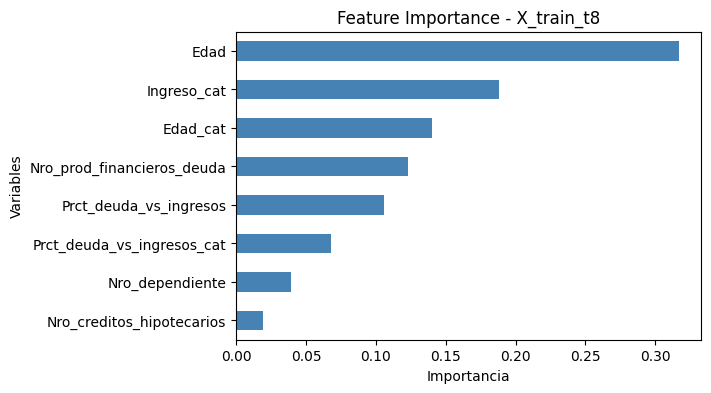

[I 2025-10-19 15:46:23,559] A new study created in memory with name: no-name-317ff7f3-2cff-423c-a6eb-68c16be8691d



🔹 Optimizando Gradient Boosting para: X_train_woe_enc2


Best trial: 0. Best value: 0:   2%|▏         | 1/50 [00:01<01:37,  1.98s/it]

[I 2025-10-19 15:46:25,535] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 63, 'learning_rate': 0.016793274568743986, 'max_depth': 3, 'subsample': 0.857693905865315, 'min_samples_split': 0.195715307674685, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.


Best trial: 1. Best value: 0.00365714:   4%|▍         | 2/50 [00:10<04:41,  5.87s/it]

[I 2025-10-19 15:46:34,127] Trial 1 finished with value: 0.0036571428571428575 and parameters: {'n_estimators': 371, 'learning_rate': 0.020525037117433004, 'max_depth': 2, 'subsample': 0.6275154067055727, 'min_samples_split': 0.10611358857637472, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.0036571428571428575.


Best trial: 1. Best value: 0.00365714:   6%|▌         | 3/50 [00:22<06:50,  8.74s/it]

[I 2025-10-19 15:46:46,295] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 178, 'learning_rate': 0.03156022817377164, 'max_depth': 9, 'subsample': 0.7834726426968094, 'min_samples_split': 0.18616879017392665, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.0036571428571428575.


Best trial: 3. Best value: 0.0116509:   8%|▊         | 4/50 [00:40<09:22, 12.24s/it] 

[I 2025-10-19 15:47:03,891] Trial 3 finished with value: 0.011650880626223093 and parameters: {'n_estimators': 343, 'learning_rate': 0.11856550936495289, 'max_depth': 4, 'subsample': 0.6182577011324891, 'min_samples_split': 0.045087799740098376, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 3 with value: 0.011650880626223093.


Best trial: 3. Best value: 0.0116509:  10%|█         | 5/50 [00:47<07:45, 10.36s/it]

[I 2025-10-19 15:47:10,906] Trial 4 finished with value: 0.008453489889106328 and parameters: {'n_estimators': 162, 'learning_rate': 0.11355390564174157, 'max_depth': 2, 'subsample': 0.9982088335981663, 'min_samples_split': 0.19890606131226016, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 3 with value: 0.011650880626223093.


Best trial: 3. Best value: 0.0116509:  12%|█▏        | 6/50 [00:53<06:26,  8.77s/it]

[I 2025-10-19 15:47:16,605] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 109, 'learning_rate': 0.01549227997387928, 'max_depth': 8, 'subsample': 0.9069117604435438, 'min_samples_split': 0.09347072750414091, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.011650880626223093.


Best trial: 3. Best value: 0.0116509:  14%|█▍        | 7/50 [00:55<04:49,  6.72s/it]

[I 2025-10-19 15:47:19,109] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 69, 'learning_rate': 0.012919304166401722, 'max_depth': 8, 'subsample': 0.7444466357669132, 'min_samples_split': 0.1840868282309346, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.011650880626223093.


Best trial: 7. Best value: 0.0198768:  16%|█▌        | 8/50 [01:12<07:01, 10.04s/it]

[I 2025-10-19 15:47:36,239] Trial 7 finished with value: 0.019876842791911285 and parameters: {'n_estimators': 347, 'learning_rate': 0.04731787170539797, 'max_depth': 7, 'subsample': 0.7545462637082836, 'min_samples_split': 0.01036261634139053, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.019876842791911285.


Best trial: 7. Best value: 0.0198768:  18%|█▊        | 9/50 [01:23<06:58, 10.20s/it]

[I 2025-10-19 15:47:46,795] Trial 8 finished with value: 0.011879712981082844 and parameters: {'n_estimators': 329, 'learning_rate': 0.19806806666200388, 'max_depth': 4, 'subsample': 0.6549917451110083, 'min_samples_split': 0.0753925931091945, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.019876842791911285.


Best trial: 7. Best value: 0.0198768:  20%|██        | 10/50 [01:27<05:31,  8.29s/it]

[I 2025-10-19 15:47:50,827] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 64, 'learning_rate': 0.045297189279987105, 'max_depth': 9, 'subsample': 0.7292210981563555, 'min_samples_split': 0.19041834805422697, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 7 with value: 0.019876842791911285.


Best trial: 7. Best value: 0.0198768:  22%|██▏       | 11/50 [01:40<06:19,  9.72s/it]

[I 2025-10-19 15:48:03,780] Trial 10 finished with value: 0.017592954990215265 and parameters: {'n_estimators': 273, 'learning_rate': 0.05597837094109536, 'max_depth': 6, 'subsample': 0.8540845895066946, 'min_samples_split': 0.010480730107017673, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.019876842791911285.


Best trial: 11. Best value: 0.0201057:  24%|██▍       | 12/50 [01:54<07:00, 11.05s/it]

[I 2025-10-19 15:48:17,882] Trial 11 finished with value: 0.020105675146771036 and parameters: {'n_estimators': 271, 'learning_rate': 0.0575241768343919, 'max_depth': 7, 'subsample': 0.8652917503537154, 'min_samples_split': 0.013242252668093007, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  26%|██▌       | 13/50 [02:07<07:11, 11.67s/it]

[I 2025-10-19 15:48:30,966] Trial 12 finished with value: 0.019192954990215262 and parameters: {'n_estimators': 262, 'learning_rate': 0.06279401546830801, 'max_depth': 6, 'subsample': 0.9397657460113569, 'min_samples_split': 0.010781185107349305, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  28%|██▊       | 14/50 [02:19<07:04, 11.79s/it]

[I 2025-10-19 15:48:43,023] Trial 13 finished with value: 0.0027420743639921725 and parameters: {'n_estimators': 263, 'learning_rate': 0.0341008821982877, 'max_depth': 7, 'subsample': 0.8103153607002964, 'min_samples_split': 0.04647759626324877, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  30%|███       | 15/50 [02:30<06:47, 11.63s/it]

[I 2025-10-19 15:48:54,304] Trial 14 finished with value: 0.00639843444227006 and parameters: {'n_estimators': 311, 'learning_rate': 0.08471909715197747, 'max_depth': 10, 'subsample': 0.6925490280665579, 'min_samples_split': 0.13281388169178265, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  32%|███▏      | 16/50 [02:45<07:06, 12.54s/it]

[I 2025-10-19 15:49:08,957] Trial 15 finished with value: 0.005483626875407698 and parameters: {'n_estimators': 382, 'learning_rate': 0.027904534862604528, 'max_depth': 5, 'subsample': 0.8063893313094578, 'min_samples_split': 0.038405889646085864, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  34%|███▍      | 17/50 [02:55<06:27, 11.76s/it]

[I 2025-10-19 15:49:18,888] Trial 16 finished with value: 0.008453489889106328 and parameters: {'n_estimators': 219, 'learning_rate': 0.07814796732407234, 'max_depth': 7, 'subsample': 0.8799578889722623, 'min_samples_split': 0.06469274913145989, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  36%|███▌      | 18/50 [03:11<07:01, 13.19s/it]

[I 2025-10-19 15:49:35,399] Trial 17 finished with value: 0.009595825179386824 and parameters: {'n_estimators': 394, 'learning_rate': 0.0406226057127049, 'max_depth': 6, 'subsample': 0.7654632521468467, 'min_samples_split': 0.03036502114028477, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  38%|███▊      | 19/50 [03:19<05:56, 11.51s/it]

[I 2025-10-19 15:49:43,018] Trial 18 finished with value: 0.0 and parameters: {'n_estimators': 222, 'learning_rate': 0.010078468265337651, 'max_depth': 7, 'subsample': 0.6927168677968761, 'min_samples_split': 0.13486452223098794, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  40%|████      | 20/50 [03:31<05:53, 11.78s/it]

[I 2025-10-19 15:49:55,418] Trial 19 finished with value: 0.00022831050228310502 and parameters: {'n_estimators': 300, 'learning_rate': 0.02222108440547098, 'max_depth': 5, 'subsample': 0.959183882927737, 'min_samples_split': 0.06271016128297976, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  42%|████▏     | 21/50 [03:51<06:46, 14.03s/it]

[I 2025-10-19 15:50:14,702] Trial 20 finished with value: 0.014165166340508805 and parameters: {'n_estimators': 353, 'learning_rate': 0.05292476572209524, 'max_depth': 8, 'subsample': 0.8360586022697561, 'min_samples_split': 0.026920431518243235, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  44%|████▍     | 22/50 [04:04<06:23, 13.71s/it]

[I 2025-10-19 15:50:27,676] Trial 21 finished with value: 0.019649575994781475 and parameters: {'n_estimators': 262, 'learning_rate': 0.06844228654338577, 'max_depth': 6, 'subsample': 0.9288813049155525, 'min_samples_split': 0.01070730118522423, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  46%|████▌     | 23/50 [04:14<05:44, 12.75s/it]

[I 2025-10-19 15:50:38,179] Trial 22 finished with value: 0.01188101761252446 and parameters: {'n_estimators': 246, 'learning_rate': 0.0789499775885248, 'max_depth': 5, 'subsample': 0.9086958931488882, 'min_samples_split': 0.020703396921008407, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  48%|████▊     | 24/50 [04:28<05:42, 13.16s/it]

[I 2025-10-19 15:50:52,306] Trial 23 finished with value: 0.017592172211350295 and parameters: {'n_estimators': 296, 'learning_rate': 0.11695983579364312, 'max_depth': 7, 'subsample': 0.9581088604436094, 'min_samples_split': 0.05369664359810213, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  50%|█████     | 25/50 [04:38<05:00, 12.01s/it]

[I 2025-10-19 15:51:01,615] Trial 24 finished with value: 0.007769602087410307 and parameters: {'n_estimators': 189, 'learning_rate': 0.06576050438038605, 'max_depth': 6, 'subsample': 0.9059417579153279, 'min_samples_split': 0.02866675745983005, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  52%|█████▏    | 26/50 [04:44<04:11, 10.46s/it]

[I 2025-10-19 15:51:08,461] Trial 25 finished with value: 0.0 and parameters: {'n_estimators': 144, 'learning_rate': 0.04384452603432534, 'max_depth': 9, 'subsample': 0.8786879526886261, 'min_samples_split': 0.08322321241371167, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 11. Best value: 0.0201057:  54%|█████▍    | 27/50 [04:46<02:57,  7.70s/it]

[I 2025-10-19 15:51:09,720] Trial 26 finished with value: 0.0 and parameters: {'n_estimators': 16, 'learning_rate': 0.0969782325415257, 'max_depth': 8, 'subsample': 0.997732854891673, 'min_samples_split': 0.015078085493814035, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.020105675146771036.


Best trial: 27. Best value: 0.0244475:  56%|█████▌    | 28/50 [05:01<03:39,  9.96s/it]

[I 2025-10-19 15:51:24,973] Trial 27 finished with value: 0.024447488584474885 and parameters: {'n_estimators': 322, 'learning_rate': 0.17612695021334182, 'max_depth': 7, 'subsample': 0.8299265109285864, 'min_samples_split': 0.03631860058278387, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.024447488584474885.


Best trial: 27. Best value: 0.0244475:  58%|█████▊    | 29/50 [05:18<04:14, 12.11s/it]

[I 2025-10-19 15:51:42,107] Trial 28 finished with value: 0.023990606653620353 and parameters: {'n_estimators': 319, 'learning_rate': 0.161888166433162, 'max_depth': 10, 'subsample': 0.8280429426642302, 'min_samples_split': 0.036843051042998225, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 27 with value: 0.024447488584474885.


Best trial: 27. Best value: 0.0244475:  60%|██████    | 30/50 [05:31<04:06, 12.34s/it]

[I 2025-10-19 15:51:54,960] Trial 29 finished with value: 0.015764905414220483 and parameters: {'n_estimators': 317, 'learning_rate': 0.19409641210732556, 'max_depth': 10, 'subsample': 0.8281694527391997, 'min_samples_split': 0.11542330934702368, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 27 with value: 0.024447488584474885.


Best trial: 27. Best value: 0.0244475:  62%|██████▏   | 31/50 [05:45<04:07, 13.01s/it]

[I 2025-10-19 15:52:09,548] Trial 30 finished with value: 0.018506457925636006 and parameters: {'n_estimators': 282, 'learning_rate': 0.1544119910602728, 'max_depth': 10, 'subsample': 0.859846694041134, 'min_samples_split': 0.060210927697869794, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 27 with value: 0.024447488584474885.


Best trial: 31. Best value: 0.0262745:  64%|██████▍   | 32/50 [06:03<04:16, 14.27s/it]

[I 2025-10-19 15:52:26,731] Trial 31 finished with value: 0.02627449445531637 and parameters: {'n_estimators': 348, 'learning_rate': 0.17247044630768782, 'max_depth': 9, 'subsample': 0.769674888536467, 'min_samples_split': 0.038583897193697266, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  66%|██████▌   | 33/50 [06:21<04:20, 15.35s/it]

[I 2025-10-19 15:52:44,606] Trial 32 finished with value: 0.023761252446183954 and parameters: {'n_estimators': 366, 'learning_rate': 0.17175033247141924, 'max_depth': 9, 'subsample': 0.7789276437433036, 'min_samples_split': 0.041166609863017824, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  68%|██████▊   | 34/50 [06:39<04:20, 16.27s/it]

[I 2025-10-19 15:53:03,016] Trial 33 finished with value: 0.025818134377038487 and parameters: {'n_estimators': 365, 'learning_rate': 0.15307006443146762, 'max_depth': 9, 'subsample': 0.7827834973116816, 'min_samples_split': 0.03720602144779907, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  70%|███████   | 35/50 [06:56<04:09, 16.63s/it]

[I 2025-10-19 15:53:20,501] Trial 34 finished with value: 0.018278408349641225 and parameters: {'n_estimators': 391, 'learning_rate': 0.14388992377028728, 'max_depth': 9, 'subsample': 0.7919575031463559, 'min_samples_split': 0.07649079660165153, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  72%|███████▏  | 36/50 [07:13<03:50, 16.48s/it]

[I 2025-10-19 15:53:36,619] Trial 35 finished with value: 0.019878408349641226 and parameters: {'n_estimators': 326, 'learning_rate': 0.13607620780184823, 'max_depth': 10, 'subsample': 0.8260082003639262, 'min_samples_split': 0.05100649138434017, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  74%|███████▍  | 37/50 [07:30<03:38, 16.84s/it]

[I 2025-10-19 15:53:54,303] Trial 36 finished with value: 0.01759191128506197 and parameters: {'n_estimators': 370, 'learning_rate': 0.10151097661147823, 'max_depth': 10, 'subsample': 0.7163411690745194, 'min_samples_split': 0.03585377122581762, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  76%|███████▌  | 38/50 [07:42<03:04, 15.40s/it]

[I 2025-10-19 15:54:06,346] Trial 37 finished with value: 0.00891089367253751 and parameters: {'n_estimators': 346, 'learning_rate': 0.16528138172363124, 'max_depth': 8, 'subsample': 0.775160058760581, 'min_samples_split': 0.16903705562388133, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  78%|███████▊  | 39/50 [07:56<02:45, 15.02s/it]

[I 2025-10-19 15:54:20,462] Trial 38 finished with value: 0.010510371819960862 and parameters: {'n_estimators': 333, 'learning_rate': 0.1280606438502897, 'max_depth': 9, 'subsample': 0.8000391545708769, 'min_samples_split': 0.10283280818741874, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  80%|████████  | 40/50 [08:25<03:10, 19.01s/it]

[I 2025-10-19 15:54:48,780] Trial 39 finished with value: 0.019878147423352904 and parameters: {'n_estimators': 366, 'learning_rate': 0.1700488769020422, 'max_depth': 8, 'subsample': 0.7416720228803968, 'min_samples_split': 0.07085743058712465, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 31. Best value: 0.0262745:  82%|████████▏ | 41/50 [08:36<02:30, 16.75s/it]

[I 2025-10-19 15:55:00,275] Trial 40 finished with value: 0.007997390737116765 and parameters: {'n_estimators': 293, 'learning_rate': 0.09626414963572136, 'max_depth': 9, 'subsample': 0.7047765026508719, 'min_samples_split': 0.08443538523032328, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 31 with value: 0.02627449445531637.


Best trial: 41. Best value: 0.0274163:  84%|████████▍ | 42/50 [08:54<02:16, 17.06s/it]

[I 2025-10-19 15:55:18,043] Trial 41 finished with value: 0.027416307893020225 and parameters: {'n_estimators': 362, 'learning_rate': 0.17925755136437177, 'max_depth': 9, 'subsample': 0.7865827286705069, 'min_samples_split': 0.04366858306969209, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.027416307893020225.


Best trial: 41. Best value: 0.0274163:  86%|████████▌ | 43/50 [09:11<01:58, 16.93s/it]

[I 2025-10-19 15:55:34,683] Trial 42 finished with value: 0.02216281800391389 and parameters: {'n_estimators': 358, 'learning_rate': 0.199849758819499, 'max_depth': 9, 'subsample': 0.7635159593620006, 'min_samples_split': 0.05558010516357641, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.027416307893020225.


Best trial: 41. Best value: 0.0274163:  88%|████████▊ | 44/50 [09:28<01:42, 17.04s/it]

[I 2025-10-19 15:55:51,981] Trial 43 finished with value: 0.021932681017612525 and parameters: {'n_estimators': 338, 'learning_rate': 0.14186774701836885, 'max_depth': 10, 'subsample': 0.8407470117484585, 'min_samples_split': 0.04506613047938474, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.027416307893020225.


Best trial: 41. Best value: 0.0274163:  90%|█████████ | 45/50 [09:40<01:17, 15.50s/it]

[I 2025-10-19 15:56:03,900] Trial 44 finished with value: 0.014393737769080234 and parameters: {'n_estimators': 380, 'learning_rate': 0.11353223326094262, 'max_depth': 3, 'subsample': 0.8206917675519745, 'min_samples_split': 0.02413379579277764, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.027416307893020225.


Best trial: 41. Best value: 0.0274163:  92%|█████████▏| 46/50 [09:56<01:03, 15.83s/it]

[I 2025-10-19 15:56:20,474] Trial 45 finished with value: 0.02490384866275277 and parameters: {'n_estimators': 398, 'learning_rate': 0.170075669375041, 'max_depth': 9, 'subsample': 0.6017335454917614, 'min_samples_split': 0.035141282561909085, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.027416307893020225.


Best trial: 46. Best value: 0.028789:  94%|█████████▍| 47/50 [10:26<01:00, 20.10s/it] 

[I 2025-10-19 15:56:50,549] Trial 46 finished with value: 0.02878904109589041 and parameters: {'n_estimators': 399, 'learning_rate': 0.17862334797161378, 'max_depth': 8, 'subsample': 0.6040626318046836, 'min_samples_split': 0.0326272931370377, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 46 with value: 0.02878904109589041.


Best trial: 46. Best value: 0.028789:  96%|█████████▌| 48/50 [10:55<00:45, 22.60s/it]

[I 2025-10-19 15:57:18,983] Trial 47 finished with value: 0.017363339856490544 and parameters: {'n_estimators': 397, 'learning_rate': 0.1253735505129131, 'max_depth': 9, 'subsample': 0.601168996587707, 'min_samples_split': 0.048744245579606924, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 46 with value: 0.02878904109589041.


Best trial: 48. Best value: 0.0370142:  98%|█████████▊| 49/50 [11:26<00:25, 25.21s/it]

[I 2025-10-19 15:57:50,278] Trial 48 finished with value: 0.03701422048271363 and parameters: {'n_estimators': 380, 'learning_rate': 0.14956685427473423, 'max_depth': 8, 'subsample': 0.6316193056836372, 'min_samples_split': 0.02043806535063265, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 48 with value: 0.03701422048271363.


Best trial: 48. Best value: 0.0370142: 100%|██████████| 50/50 [11:56<00:00, 14.34s/it]


[I 2025-10-19 15:58:20,371] Trial 49 finished with value: 0.027873450750163075 and parameters: {'n_estimators': 358, 'learning_rate': 0.10996881788155596, 'max_depth': 8, 'subsample': 0.6578478611473024, 'min_samples_split': 0.0203456362990051, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 48 with value: 0.03701422048271363.


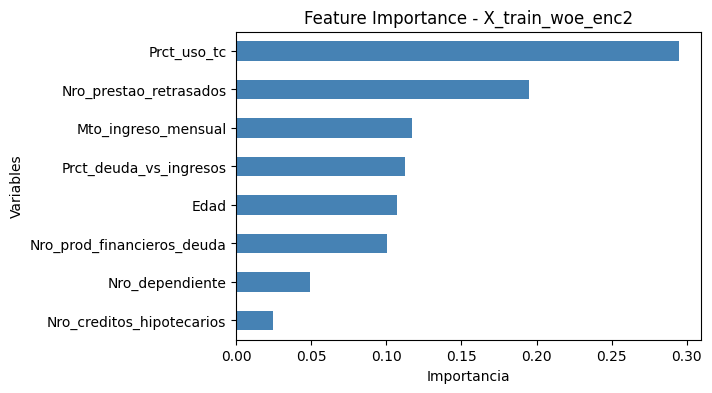


✅ Resultados finales (Gradient Boosting con Optuna):


,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test
0,X_train_t5_woe,14,"{'n_estimators': 361, 'learning_rate': 0.07988...",0.840205,0.842424,0.130226,0.127505,0.561781,0.560085
1,X_train_t6,8,"{'n_estimators': 390, 'learning_rate': 0.18179...",0.885689,0.726012,0.150788,0.048270,0.574658,0.520962
2,X_train_woe_enc2,10,"{'n_estimators': 380, 'learning_rate': 0.14956...",0.875941,0.776156,0.060544,0.033698,0.529616,0.515277
3,X_train_t8,8,"{'n_estimators': 19, 'learning_rate': 0.022394...",0.658669,0.667869,0.000000,0.000000,0.500000,0.500000


In [181]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score, balanced_accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 🔹 Diccionario de datasets
# ============================
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# ============================
# 🔹 Función objetivo para Optuna
# ============================
def objective(trial, X_train, y_train):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 400),  # rango continuo entre 10 y 400
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "min_samples_split": trial.suggest_float("min_samples_split", 0.01, 0.2),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "random_state": 0
    }

    model = GradientBoostingClassifier(**params)
    # Usamos AUC como métrica base de validación cruzada
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="recall", n_jobs=-1).mean()
    return score

# ============================
# 🔹 Loop general
# ============================
resultados = []

for nombre, (X_train, X_test) in candidatos.items():
    print(f"\n🔹 Optimizando Gradient Boosting para: {nombre}")

    # Crear estudio Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, show_progress_bar=True)

    # Mejor modelo encontrado
    best_params = study.best_params
    gbc_best = GradientBoostingClassifier(**best_params)
    gbc_best.fit(X_train, y_train)

    # Predicciones
    y_pred_proba_train = gbc_best.predict_proba(X_train)[:, 1]
    y_pred_proba_test = gbc_best.predict_proba(X_test)[:, 1]

    y_pred_train = (y_pred_proba_train >= 0.5).astype(int)
    y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

    # Métricas
    auc_train = roc_auc_score(y_train, y_pred_proba_train)
    auc_test = roc_auc_score(y_test, y_pred_proba_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
    bal_acc_test = balanced_accuracy_score(y_test, y_pred_test)

    resultados.append({
        "Dataset": nombre,
        "n_vars": X_train.shape[1],
        "Best_Params": best_params,
        "AUC_train": auc_train,
        "AUC_test": auc_test,
        "Recall_train": recall_train,
        "Recall_test": recall_test,
        "Balanced_Accuracy_train": bal_acc_train,
        "Balanced_Accuracy_test": bal_acc_test
    })

    # --- Gráfico de importancia de variables ---
    fi = pd.Series(gbc_best.feature_importances_, index=gbc_best.feature_names_in_)
    fi = fi[fi > 0].sort_values(ascending=True)
    fi.plot.barh(color='steelblue', figsize=(6, 4))
    plt.title(f"Feature Importance - {nombre}")
    plt.xlabel("Importancia")
    plt.ylabel("Variables")
    plt.show()

# ============================
# 🔹 Resultados finales
# ============================
df_resultados_optuna_gbc = pd.DataFrame(resultados).sort_values(
    by=["Recall_test", "AUC_test"],
    ascending=[False, False]
).reset_index(drop=True)

print("\n✅ Resultados finales (Gradient Boosting con Optuna):")
display(df_resultados_optuna_gbc)


In [187]:
df_resultados_optuna_gbc['modelo'] = 'Gradient Boosting Sin balanceo'
df_resultados_grid_rf['modelo'] = 'Random Forest con balanceo'
df_resultados_grid_DT['modelo'] = 'Decision Tree con balanceo'
df_resultados_decisiontree_sinbalanceo['modelo'] = 'Decision Tree Sin Balanceo'
df_resultados_decisiontree_conbalanceo['modelo'] = 'Decision Tree Con Balanceo'

df_resultados_grid = pd.concat([
    df_resultados_optuna_gbc,
    df_resultados_grid_rf,
    df_resultados_grid_DT,
    df_resultados_decisiontree_sinbalanceo,
    df_resultados_decisiontree_conbalanceo
], ignore_index=True)

print(df_resultados_grid)

             Dataset  n_vars  \
0     X_train_t5_woe      14   
1         X_train_t6       8   
2   X_train_woe_enc2      10   
3         X_train_t8       8   
4     X_train_t5_woe      14   
5         X_train_t8       8   
6   X_train_woe_enc2      10   
7         X_train_t6       8   
8     X_train_t5_woe      14   
9         X_train_t6       8   
10  X_train_woe_enc2      10   
11        X_train_t8       8   
12    X_train_t5_woe      14   
13  X_train_woe_enc2      10   
14        X_train_t6       8   
15        X_train_t8       8   
16        X_train_t8       8   
17    X_train_t5_woe      14   
18  X_train_woe_enc2      10   
19        X_train_t6       8   

                                          Best_Params  AUC_train  AUC_test  \
0   {'n_estimators': 361, 'learning_rate': 0.07988...   0.840205  0.842424   
1   {'n_estimators': 390, 'learning_rate': 0.18179...   0.885689  0.726012   
2   {'n_estimators': 380, 'learning_rate': 0.14956...   0.875941  0.776156   
3   {'n_estimat

In [189]:
df_resultados_grid.sort_values(by=["Recall_test","AUC_test"], ascending=False)

,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test,modelo
4,X_train_t5_woe,14,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.818113,0.820603,0.853096,0.861566,0.737784,0.737204,Random Forest con balanceo
8,X_train_t5_woe,14,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.794578,0.796003,0.821567,0.826958,0.738542,0.737043,Decision Tree con balanceo
5,X_train_t8,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.636041,0.650301,0.771761,0.793260,0.582953,0.597340,Random Forest con balanceo
16,X_train_t8,8,NaN,0.656500,0.659253,0.771076,0.765027,NaN,0.612300,Decision Tree Con Balanceo
9,X_train_t6,8,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.697213,0.708575,0.742061,0.764117,0.663984,0.673257,Decision Tree con balanceo
6,X_train_woe_enc2,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.776890,0.784077,0.732008,0.750455,0.719805,0.725510,Random Forest con balanceo
10,X_train_woe_enc2,10,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.767543,0.769658,0.732008,0.750455,0.719805,0.725510,Decision Tree con balanceo
17,X_train_t5_woe,14,NaN,0.822579,0.823733,0.737720,0.747723,NaN,0.756218,Decision Tree Con Balanceo
7,X_train_t6,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.734518,0.747873,0.709847,0.745902,0.662049,0.680972,Random Forest con balanceo
18,X_train_woe_enc2,10,NaN,0.784192,0.785412,0.704592,0.719490,NaN,0.727752,Decision Tree Con Balanceo


## 8. Técnicas de balanceo adicionales

Técnicas de Balanceo

| Tipo | Técnica | Descripción | Cuándo usarla |
|------|---------|-------------|---------------|
| 🔹 Oversampling | Random OverSampling | Duplica aleatoriamente registros de la clase minoritaria hasta equilibrar las clases. | Rápido, útil para datasets pequeños. Puede causar overfitting. |
| 🔹 Oversampling inteligente | SMOTE | Genera muestras sintéticas (no duplicadas) interpolando entre vecinos de la clase minoritaria. | Muy usado en Credit Scoring, especialmente con <10% malos. |
| 🔹 Oversampling inteligente | ADASYN | Similar a SMOTE, pero crea más muestras donde la clase minoritaria es más difícil de aprender. | Mejora SMOTE cuando los datos son complejos. |
| 🔸 Undersampling | Random UnderSampling | Elimina registros de la clase mayoritaria para equilibrar las clases. | Útil con datasets grandes (>100k observaciones). Pierde información. |
| 🔸 Undersampling inteligente | NearMiss / Tomek Links / ENN | Mantienen las observaciones más representativas de la clase mayoritaria. | Mejora la representatividad y reduce ruido. |
| ⚙️ Model-based | Class Weights | Ajusta internamente el peso de cada clase sin modificar los datos. | Muy recomendado con modelos lineales (Logistic, Ridge, Lasso). |
| 👩‍🏫 Combinado | SMOTE + Tomek Links | Aplica oversampling + limpieza de ruido. | Eficaz y equilibrado para Credit Scoring. |

---

¿Cuándo aplicar balanceo en Credit Scoring?

| Etapa | Qué pasa | Qué hacer |
|------|----------|-----------|
| Preparación del dataset | Detectas que la clase "Default" <10% | Aplica SMOTE o `class_weight='balanced'`. |
| Entrenamiento del modelo | Usas Logistic Regression o árboles | Usa `class_weight='balanced'` o SMOTE en el train. |
| Evaluación | No balancees el test | El test debe reflejar la realidad del negocio. |
| Métricas de evaluación | Accuracy no sirve | Usa: AUC, Recall, Precision, F1, Balanced Accuracy. |

**Nota**
¿Como funciona el class_weight?

¿Cómo funciona `class_weight`?

Cuando se usa `class_weight='balanced'`, scikit-learn ajusta automáticamente los pesos de cada clase utilizando la siguiente fórmula:

$$ w_i = \frac{n_{\text{samples}}}{n_{\text{classes}} \times n_i} $$

Donde:
- $w_i$ → peso de la clase $i$
- $n_{\text{samples}}$ → total de observaciones
- $n_{\text{classes}}$ → número de clases
- $n_i$ → número de observaciones de la clase $i$

💡 **Interpretación:** Esto significa que las clases con menos observaciones reciben más peso, lo que obliga al modelo a prestarles más atención y así compensar el desequilibrio entre clases.

---

Ejemplo práctico

Si tienes:
- 1000 observaciones totales
- 2 clases: Buenos (900) y Malos (100)

Los pesos serían:

$$ w_{\text{buenos}} = \frac{1000}{2 \times 900} = 0.556 $$

$$ w_{\text{malos}} = \frac{1000}{2 \times 100} = 5.0 $$

**Resultado:** Los malos tienen 5 veces más peso que los buenos, lo que obliga al modelo a aprender mejor los patrones de default.

📋 Tabla Comparativa: Credit Scoring

| Técnica | Concepto General | Cuándo Usar en Credit Scoring | Recomendación |
|---------|-----------------|------------------------------|---------------|
| **SMOTE** | Genera muestras sintéticas interpolando entre vecinos k-NN de la clase minoritaria (malos pagadores) | Desbalanceo extremo (< 10% default) y quieres estabilidad en la predicción de riesgo | ✅ **Primera opción** en cartera típica |
| **ADASYN** | Versión adaptativa de SMOTE que enfatiza zonas fronterizas difíciles de aprender | Necesitas optimizar frontera de decisión entre buenos/malos riesgosos y tienes tiempo de cómputo | ✅ **Refinamiento** después de SMOTE |
| **SMOTE + Tomek Links** | Combina: SMOTE para crear malos sintéticos + Tomek para limpiar ruido en frontera | Desbalanceo extremo + necesitas frontera clara entre aprobación/rechazo | ✅✅ **Mejor para Credit Scoring** |
| **class_weight='balanced'** | Ajusta pesos de clases internamente SIN modificar datos (mantiene cartera real) | Modelos lineales (Logistic) o rápida experimentación sin generar datos sintéticos | ✅ **Alternativa rápida y conservadora** |
| **Stratified K-Fold** | Asegura que cada fold mantenga la proporción real de default | SIEMPRE en validación cruzada con cartera desbalanceada | ✅ **OBLIGATORIO** en Credit Scoring |

---

In [193]:
#Por esta ves usaremos  Smote +Tomel Links como tecnica de balanceo
# Oversampling: SMOTE + Tomek Links
from imblearn.combine import SMOTETomek

# Crear el combinador SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=0)



# Aplicar al conjunto de entrenamiento
X_train_t5_woe_p_smt, y_train_smt = smote_tomek.fit_resample(X_train_t5_woe, y_train)

# Verificar balance resultante
print("Distribución antes del balanceo:")
print(y_train.value_counts(normalize=True))
print("\nDistribución después del balanceo:")
print(y_train_smt.value_counts(normalize=True))


Distribución antes del balanceo:
Default
0    0.940616
1    0.059384
Name: proportion, dtype: float64

Distribución después del balanceo:
Default
0    0.5
1    0.5
Name: proportion, dtype: float64



🔹 Optimizando Gradient Boosting con SMOTE+Tomek para: X_train_t5_woe


[I 2025-10-19 16:39:07,690] A new study created in memory with name: no-name-68c0992c-26cf-4f3d-ba2b-3c93a4ff1bfd


Distribución original:
 Default
0    0.940616
1    0.059384
Name: proportion, dtype: float64
Distribución balanceada:
 Default
0    0.5
1    0.5
Name: proportion, dtype: float64


[I 2025-10-19 16:39:44,466] Trial 0 finished with value: 0.8599945627126054 and parameters: {'n_estimators': 85, 'learning_rate': 0.09360664080442449, 'max_depth': 5, 'subsample': 0.9590043786281506, 'min_samples_split': 0.043982191899352575, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8599945627126054.
[I 2025-10-19 16:40:28,757] Trial 1 finished with value: 0.8104880494866112 and parameters: {'n_estimators': 320, 'learning_rate': 0.01729471598576691, 'max_depth': 6, 'subsample': 0.6393470659910317, 'min_samples_split': 0.1903520931977554, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8599945627126054.
[I 2025-10-19 16:40:41,925] Trial 2 finished with value: 0.7794306721711439 and parameters: {'n_estimators': 81, 'learning_rate': 0.10372141439024414, 'max_depth': 2, 'subsample': 0.8078977120345083, 'min_samples_split': 0.19386176921848453, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.859

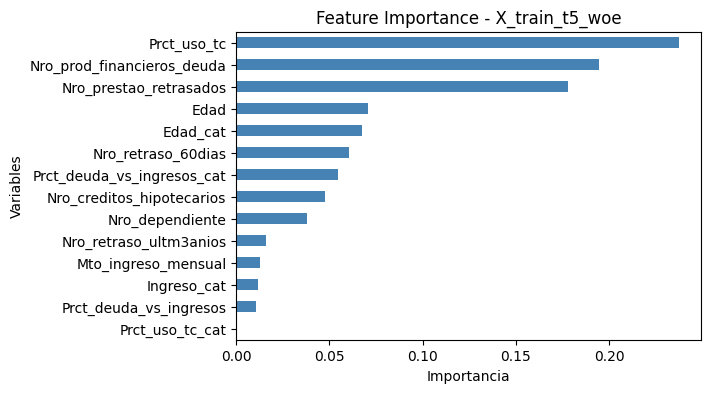


🔹 Optimizando Gradient Boosting con SMOTE+Tomek para: X_train_t6


[I 2025-10-19 20:59:00,408] A new study created in memory with name: no-name-8559fec1-cd16-4fbd-9b48-d8fd29cc270f


Distribución original:
 Default
0    0.940616
1    0.059384
Name: proportion, dtype: float64
Distribución balanceada:
 Default
0    0.5
1    0.5
Name: proportion, dtype: float64


[I 2025-10-19 20:59:21,663] Trial 0 finished with value: 0.8073511487078804 and parameters: {'n_estimators': 226, 'learning_rate': 0.11034784867450324, 'max_depth': 4, 'subsample': 0.6679489055344839, 'min_samples_split': 0.1292205479485763, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8073511487078804.
[I 2025-10-19 20:59:52,426] Trial 1 finished with value: 0.8694248992414664 and parameters: {'n_estimators': 207, 'learning_rate': 0.17339020690632886, 'max_depth': 5, 'subsample': 0.8294369619260368, 'min_samples_split': 0.020379018475852984, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8694248992414664.
[I 2025-10-19 21:01:57,761] Trial 2 finished with value: 0.8648159619292313 and parameters: {'n_estimators': 345, 'learning_rate': 0.05484656378578705, 'max_depth': 6, 'subsample': 0.7468888780294687, 'min_samples_split': 0.1529828786706201, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 0.8694

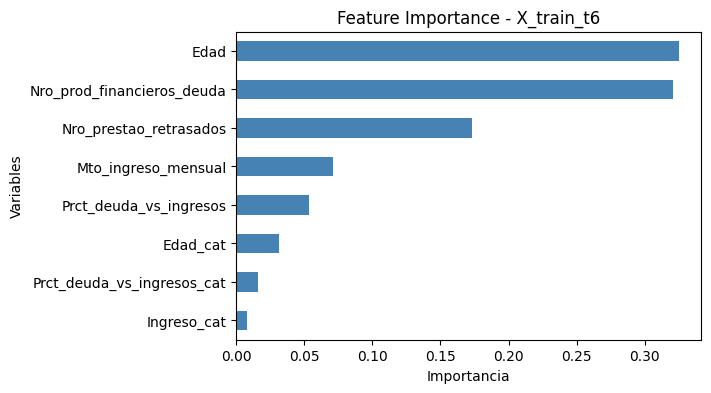


🔹 Optimizando Gradient Boosting con SMOTE+Tomek para: X_train_t8


[I 2025-10-19 21:58:44,483] A new study created in memory with name: no-name-a7d3139f-e1bf-48ab-9dc5-403112665fca


Distribución original:
 Default
0    0.940616
1    0.059384
Name: proportion, dtype: float64
Distribución balanceada:
 Default
0    0.5
1    0.5
Name: proportion, dtype: float64


[I 2025-10-19 21:59:16,570] Trial 0 finished with value: 0.7879052614068134 and parameters: {'n_estimators': 270, 'learning_rate': 0.0274206804215464, 'max_depth': 2, 'subsample': 0.9399627836655504, 'min_samples_split': 0.0796106403072864, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.7879052614068134.
[I 2025-10-19 21:59:45,930] Trial 1 finished with value: 0.841135361895011 and parameters: {'n_estimators': 105, 'learning_rate': 0.1087639110761726, 'max_depth': 6, 'subsample': 0.9771121555152427, 'min_samples_split': 0.04808034045274913, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 0.841135361895011.
[I 2025-10-19 22:00:17,377] Trial 2 finished with value: 0.8392549243403726 and parameters: {'n_estimators': 344, 'learning_rate': 0.1140902485219414, 'max_depth': 5, 'subsample': 0.6218867646905324, 'min_samples_split': 0.09489714197910698, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.84113536189

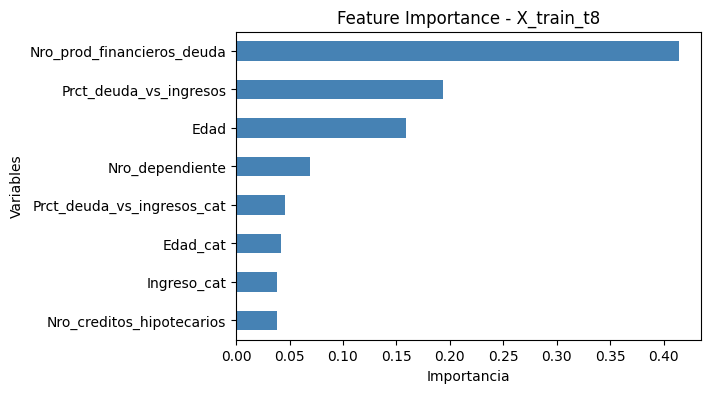


🔹 Optimizando Gradient Boosting con SMOTE+Tomek para: X_train_woe_enc2


[I 2025-10-19 22:38:07,619] A new study created in memory with name: no-name-8f811418-7f30-4257-b3d7-916552b91150


Distribución original:
 Default
0    0.940616
1    0.059384
Name: proportion, dtype: float64
Distribución balanceada:
 Default
0    0.5
1    0.5
Name: proportion, dtype: float64


[I 2025-10-19 22:38:15,201] Trial 0 finished with value: 0.8151503374467446 and parameters: {'n_estimators': 60, 'learning_rate': 0.015940102375810786, 'max_depth': 8, 'subsample': 0.6009216264772627, 'min_samples_split': 0.04677653315177492, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8151503374467446.
[I 2025-10-19 22:38:36,765] Trial 1 finished with value: 0.8655408949795766 and parameters: {'n_estimators': 82, 'learning_rate': 0.0482814255712501, 'max_depth': 5, 'subsample': 0.8777730916587612, 'min_samples_split': 0.15613389214474535, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 0.8655408949795766.
[I 2025-10-19 22:39:20,292] Trial 2 finished with value: 0.9016877238167182 and parameters: {'n_estimators': 179, 'learning_rate': 0.02936387134074351, 'max_depth': 5, 'subsample': 0.7418835136223907, 'min_samples_split': 0.03687165606493006, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 2 with value: 0.9016877

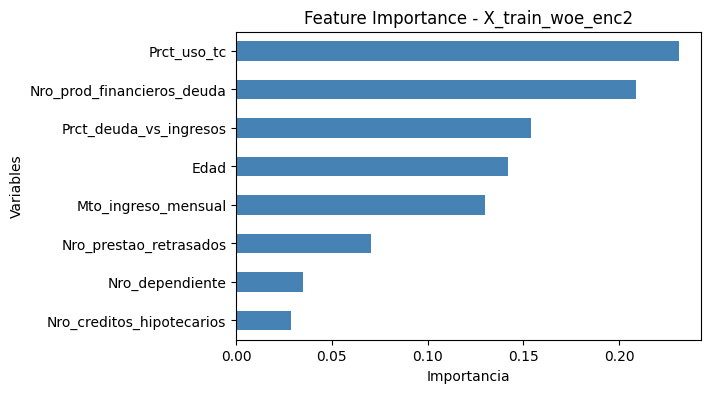


✅ Resultados finales (Gradient Boosting con SMOTE+Tomek y Optuna):


,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test
0,X_train_t5_woe,14,"{'n_estimators': 202, 'learning_rate': 0.19488...",0.993779,0.820708,0.949944,0.159381,0.972962,0.574422
1,X_train_woe_enc2,10,"{'n_estimators': 358, 'learning_rate': 0.08518...",0.989238,0.781208,0.938999,0.111111,0.961106,0.545485
2,X_train_t8,8,"{'n_estimators': 314, 'learning_rate': 0.19998...",0.968310,0.626859,0.874476,0.096539,0.909784,0.519688
3,X_train_t6,8,"{'n_estimators': 300, 'learning_rate': 0.19475...",0.991273,0.716834,0.930793,0.080146,0.962652,0.532884


In [194]:
candidatos = {
    "X_train_t5_woe": (X_train_t5_woe, X_test_t5_woe),
    "X_train_t6": (X_train_t6, X_test_t6),
    "X_train_t8": (X_train_t8, X_test_t8),
    "X_train_woe_enc2": (X_train_woe_enc2, X_test_woe_enc2)
}

# ============================
# 🔹 Función objetivo para Optuna
# ============================
def objective(trial, X_train_bal, y_train_bal):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "min_samples_split": trial.suggest_float("min_samples_split", 0.01, 0.2),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "random_state": 0
    }

    model = GradientBoostingClassifier(**params)
    # Validación cruzada con métrica recall
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring="recall", n_jobs=-1).mean()
    return score

# ============================
# 🔹 Loop general con SMOTE + Tomek Links
# ============================
resultados = []
smote_tomek = SMOTETomek(random_state=0)

for nombre, (X_train, X_test) in candidatos.items():
    print(f"\n🔹 Optimizando Gradient Boosting con SMOTE+Tomek para: {nombre}")

    # --- Paso 1: Aplicar balanceo ---
    X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

    print("Distribución original:\n", y_train.value_counts(normalize=True))
    print("Distribución balanceada:\n", y_train_bal.value_counts(normalize=True))

    # --- Paso 2: Optimización con Optuna ---
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, X_train_bal, y_train_bal),
                   n_trials=50,
                   show_progress_bar=False)  # 🔇 sin barra de progreso

    # --- Paso 3: Mejor modelo ---
    best_params = study.best_params
    gbc_best = GradientBoostingClassifier(**best_params)
    gbc_best.fit(X_train_bal, y_train_bal)

    # --- Paso 4: Evaluación ---
    y_pred_proba_train = gbc_best.predict_proba(X_train_bal)[:, 1]
    y_pred_proba_test = gbc_best.predict_proba(X_test)[:, 1]

    y_pred_train = (y_pred_proba_train >= 0.5).astype(int)
    y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

    auc_train = roc_auc_score(y_train_bal, y_pred_proba_train)
    auc_test = roc_auc_score(y_test, y_pred_proba_test)
    recall_train = recall_score(y_train_bal, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    bal_acc_train = balanced_accuracy_score(y_train_bal, y_pred_train)
    bal_acc_test = balanced_accuracy_score(y_test, y_pred_test)

    resultados.append({
        "Dataset": nombre,
        "n_vars": X_train.shape[1],
        "Best_Params": best_params,
        "AUC_train": auc_train,
        "AUC_test": auc_test,
        "Recall_train": recall_train,
        "Recall_test": recall_test,
        "Balanced_Accuracy_train": bal_acc_train,
        "Balanced_Accuracy_test": bal_acc_test
    })

    # --- Paso 5: Importancia de características ---
    fi = pd.Series(gbc_best.feature_importances_, index=gbc_best.feature_names_in_)
    fi = fi[fi > 0].sort_values(ascending=True)
    fi.plot.barh(color='steelblue', figsize=(6, 4))
    plt.title(f"Feature Importance - {nombre}")
    plt.xlabel("Importancia")
    plt.ylabel("Variables")
    plt.show()

# ============================
# 🔹 Resultados finales
# ============================
df_resultados_optuna_gbc_smote_tomek = pd.DataFrame(resultados).sort_values(
    by=["Recall_test", "AUC_test"],
    ascending=[False, False]
).reset_index(drop=True)

print("\n✅ Resultados finales (Gradient Boosting con SMOTE+Tomek y Optuna):")
display(df_resultados_optuna_gbc_smote_tomek)

## 9. Elección de mejor modelo ensamblado 

In [197]:
df_resultados_optuna_gbc_smote_tomek['modelo'] = 'Gradient Boosting con SMOTE + Tomek Links'
df_modelos_ensamblados = pd.concat([
    df_resultados_optuna_gbc_smote_tomek,
    df_resultados_grid
], ignore_index=True)

df_modelos_ensamblados.sort_values(by=["Recall_test","AUC_test"], ascending=False)

,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test,modelo
8,X_train_t5_woe,14,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.818113,0.820603,0.853096,0.861566,0.737784,0.737204,Random Forest con balanceo
12,X_train_t5_woe,14,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.794578,0.796003,0.821567,0.826958,0.738542,0.737043,Decision Tree con balanceo
9,X_train_t8,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.636041,0.650301,0.771761,0.793260,0.582953,0.597340,Random Forest con balanceo
20,X_train_t8,8,NaN,0.656500,0.659253,0.771076,0.765027,NaN,0.612300,Decision Tree Con Balanceo
13,X_train_t6,8,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.697213,0.708575,0.742061,0.764117,0.663984,0.673257,Decision Tree con balanceo
10,X_train_woe_enc2,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.776890,0.784077,0.732008,0.750455,0.719805,0.725510,Random Forest con balanceo
14,X_train_woe_enc2,10,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.767543,0.769658,0.732008,0.750455,0.719805,0.725510,Decision Tree con balanceo
21,X_train_t5_woe,14,NaN,0.822579,0.823733,0.737720,0.747723,NaN,0.756218,Decision Tree Con Balanceo
11,X_train_t6,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.734518,0.747873,0.709847,0.745902,0.662049,0.680972,Random Forest con balanceo
22,X_train_woe_enc2,10,NaN,0.784192,0.785412,0.704592,0.719490,NaN,0.727752,Decision Tree Con Balanceo


In [200]:
df_modelos_ensamblados_filtrado = df_modelos_ensamblados.copy()

df_modelos_ensamblados_filtrado['Recall_overfit'] = abs(df_modelos_ensamblados_filtrado['Recall_train'] - df_modelos_ensamblados_filtrado['Recall_test'])
df_modelos_ensamblados_filtrado['AUC_overfit'] = abs(df_modelos_ensamblados_filtrado['AUC_train'] - df_modelos_ensamblados_filtrado['AUC_test'])
df_modelos_ensamblados_filtrado = df_modelos_ensamblados_filtrado[
    (df_modelos_ensamblados_filtrado['Recall_overfit'] <= 0.5) &
    (df_modelos_ensamblados_filtrado['AUC_overfit'] <= 0.5)
]
df_modelos_ensamblados_filtrado.sort_values(by=["Recall_test","AUC_test"], ascending=False)

,Dataset,n_vars,Best_Params,AUC_train,AUC_test,Recall_train,Recall_test,Balanced_Accuracy_train,Balanced_Accuracy_test,modelo,Recall_overfit,AUC_overfit
8,X_train_t5_woe,14,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.818113,0.820603,0.853096,0.861566,0.737784,0.737204,Random Forest con balanceo,0.008471,0.002490
12,X_train_t5_woe,14,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.794578,0.796003,0.821567,0.826958,0.738542,0.737043,Decision Tree con balanceo,0.005391,0.001425
9,X_train_t8,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.636041,0.650301,0.771761,0.793260,0.582953,0.597340,Random Forest con balanceo,0.021499,0.014260
20,X_train_t8,8,NaN,0.656500,0.659253,0.771076,0.765027,NaN,0.612300,Decision Tree Con Balanceo,0.006049,0.002753
13,X_train_t6,8,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.697213,0.708575,0.742061,0.764117,0.663984,0.673257,Decision Tree con balanceo,0.022056,0.011362
10,X_train_woe_enc2,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.776890,0.784077,0.732008,0.750455,0.719805,0.725510,Random Forest con balanceo,0.018447,0.007187
14,X_train_woe_enc2,10,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.767543,0.769658,0.732008,0.750455,0.719805,0.725510,Decision Tree con balanceo,0.018447,0.002115
21,X_train_t5_woe,14,NaN,0.822579,0.823733,0.737720,0.747723,NaN,0.756218,Decision Tree Con Balanceo,0.010003,0.001154
11,X_train_t6,8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.734518,0.747873,0.709847,0.745902,0.662049,0.680972,Random Forest con balanceo,0.036055,0.013355
22,X_train_woe_enc2,10,NaN,0.784192,0.785412,0.704592,0.719490,NaN,0.727752,Decision Tree Con Balanceo,0.014898,0.001220


In [ ]:
df_modelo_comparativo.rename(columns={'Modelo_Global': 'modelo'}, inplace=True)
df_modelo_comparativo.rename(columns={'Candidato': 'Dataset'}, inplace=True)


df_entrenamiento_= pd.concat([
    df_modelos_ensamblados,
    df_modelo_comparativo
], ignore_index=True)

df_entrenamiento_.sort_values(by=["Recall_test","AUC_test"], ascending=False)

## **10. Saving Best Model**

In [210]:
base_best_model_emsamblado = df_modelos_ensamblados_filtrado['Dataset'].loc[8]
parametros_best_model_ensamblado = df_modelos_ensamblados_filtrado['Best_Params'].loc[8]
modelo_best_ensamblado = df_modelos_ensamblados_filtrado['modelo'].loc[8]
recall_test_best_model_ensamblado = df_modelos_ensamblados_filtrado['Recall_test'].loc[8]
auc_test_best_model_ensamblado = df_modelos_ensamblados_filtrado['AUC_test'].loc[8]

In [211]:
print(f'Recall Test del mejor modelo ensamblado ({modelo_best_ensamblado}): {recall_test_best_model_ensamblado:.6f}')
print(f'AUC Test del mejor modelo ensamblado ({modelo_best_ensamblado}): {auc_test_best_model_ensamblado:.6f}')

Recall Test del mejor modelo ensamblado (Random Forest con balanceo): 0.861566
AUC Test del mejor modelo ensamblado (Random Forest con balanceo): 0.820603


In [207]:
base_best_model_emsamblado

'X_train_t5_woe'

In [206]:
modelo_best_ensamblado

'Random Forest con balanceo'

In [209]:
rf_best_ensamblado = RandomForestClassifier(**parametros_best_model_ensamblado, random_state=0, class_weight='balanced')
X_train_best_ensamblado, X_test_best_ensamblado = candidatos[base_best_model_emsamblado]
rf_best_ensamblado.fit(X_train_best_ensamblado, y_train)
y_pred_best_ensamblado = rf_best_ensamblado.predict_proba(X_test_best_ensamblado)[:, 1]
auc_best_ensamblado = roc_auc_score(y_test, y_pred_best_ensamblado)
recall_best_ensamblado = recall_score(y_test, (y_pred_best_ensamblado >= 0.5).astype(int))
print(f"Mejor modelo ensamblado: {modelo_best_ensamblado}")
print(f"AUC en test: {auc_best_ensamblado:.4f}")
print(f"Recall en test: {recall_best_ensamblado:.4f}")

Mejor modelo ensamblado: Random Forest con balanceo
AUC en test: 0.8206
Recall en test: 0.8616


In [214]:
X_train_t5_woe.describe().T

,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,73707.0,0.294052,0.305962,0.000000,0.037438,0.164223,0.498321,1.000000
Edad,73707.0,0.428038,0.216447,0.000000,0.269841,0.412698,0.587302,1.000000
Nro_prestao_retrasados,73707.0,0.058502,0.153187,0.000000,0.000000,0.000000,0.000000,1.000000
Prct_deuda_vs_ingresos,73707.0,0.184106,0.116609,0.000360,0.094397,0.170674,0.258000,0.513440
Mto_ingreso_mensual,73707.0,0.355684,0.223264,0.000000,0.182482,0.313869,0.492701,1.000000
Nro_prod_financieros_deuda,73707.0,0.349988,0.182272,0.000000,0.200000,0.320000,0.440000,1.000000
Nro_retraso_60dias,73707.0,0.021314,0.106936,0.000000,0.000000,0.000000,0.000000,1.000000
Nro_creditos_hipotecarios,73707.0,0.255057,0.227207,0.000000,0.000000,0.250000,0.500000,1.000000
Nro_retraso_ultm3anios,73707.0,0.025785,0.124297,0.000000,0.000000,0.000000,0.000000,1.000000
Nro_dependiente,73707.0,0.212039,0.270840,0.000000,0.000000,0.000000,0.500000,1.000000


In [226]:
pipe_5_woe

,steps,"[('remove_outliers', ...), ('mode_imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,percentiles,"{'Mto_ingreso_mensual': (0.05, ...), 'Nro_creditos_hipotecarios': (0, ...), 'Nro_dependiente': (0, ...), 'Nro_retraso_60dias': (0, ...), ...}"
,imputation_method,'frequent'
,fill_value,'Missing'
,variables,"['Prct_uso_tc_cat', 'Edad_cat', ...]"
,return_object,False
,ignore_format,False
,column_transformer,ColumnTransfo...e='object'))])


In [212]:
rf_best_ensamblado

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,0.3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [228]:
import os
import joblib

# 📁 Ruta donde guardarás los objetos
ruta_resultados = r".\Resultados"

# 🧩 Crear la carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

# 💾 Guardar los objetos
joblib.dump(pipe_5_woe, os.path.join(ruta_resultados, "pipe_5_woe.pkl"))
joblib.dump(X_train_t5_woe, os.path.join(ruta_resultados, "X_train_t5_woe.pkl"))
joblib.dump(rf_best_ensamblado, os.path.join(ruta_resultados, "rf_best_ensamblado.pkl"))

print("✅ Objetos guardados exitosamente en la carpeta 'Resultados'")

✅ Objetos guardados exitosamente en la carpeta 'Resultados'


In [229]:
pipe_5_woe_restablecido = joblib.load(os.path.join(ruta_resultados, "pipe_5_woe.pkl"))
X_train_t5_woe_restablecido = joblib.load(os.path.join(ruta_resultados, "X_train_t5_woe.pkl"))
rf_best_ensamblado_restablecido = joblib.load(os.path.join(ruta_resultados, "rf_best_ensamblado.pkl"))

print("✅ Objetos cargados correctamente")


✅ Objetos cargados correctamente


## 11. Analisis de Shap values e importancia de valores

SHAP Values en Random Forest para Credit Scoring (PD)

¿Qué son SHAP Values?

Explican la contribución de cada variable en la predicción de PD para cada cliente.

**Fórmula:**
$$ \text{PD predicha} = \text{PD base} + \sum_{i=1}^{n} \text{SHAP}_i $$

---

Ejemplo Práctico
```
Base (PD promedio): 4%

Cliente X:
├─ Score 650       → -0.5%  (buen score, baja riesgo)
├─ Ingresos $2k    → +3.0%  (ingresos bajos, sube riesgo)
├─ Antigüedad 2y   → +2.0%  (poca experiencia, sube riesgo)
└─ Ratio deuda 60% → +6.5%  (muy endeudado, sube riesgo)
─────────────────────────────
Predicción: 15%
```

---

4 Visualizaciones Clave

| Gráfico | Muestra | Uso |
|---------|---------|-----|
| **Summary Plot** | Variables más importantes globalmente | Cuáles variables importan más |
| **Force Plot** | Por qué PD de un cliente es X% | Explicar decisión individual |
| **Dependence Plot** | Relación entre variable y PD | Entender comportamiento de variables |
| **Waterfall Plot** | Cascada de contribuciones | Reportes y explicabilidad |

---

        Ventajas en Credit Scoring

✅ **Interpretabilidad:** Explicar por qué se aprobó/rechazó  
✅ **Regulatorio:** Cumple GDPR/Fair Lending  
✅ **Detección de sesgo:** Identifica discriminación injusta  
✅ **Confianza:** Transparencia al cliente  

---

        Lo Importante

- SHAP descompone PD en contribución de cada variable
- Positivo = aumenta riesgo
- Negativo = disminuye riesgo
- Permite auditar y explicar cada decisión crediticia

shap_values_pd shape: (1000, 14)
X_sample shape: (1000, 14)


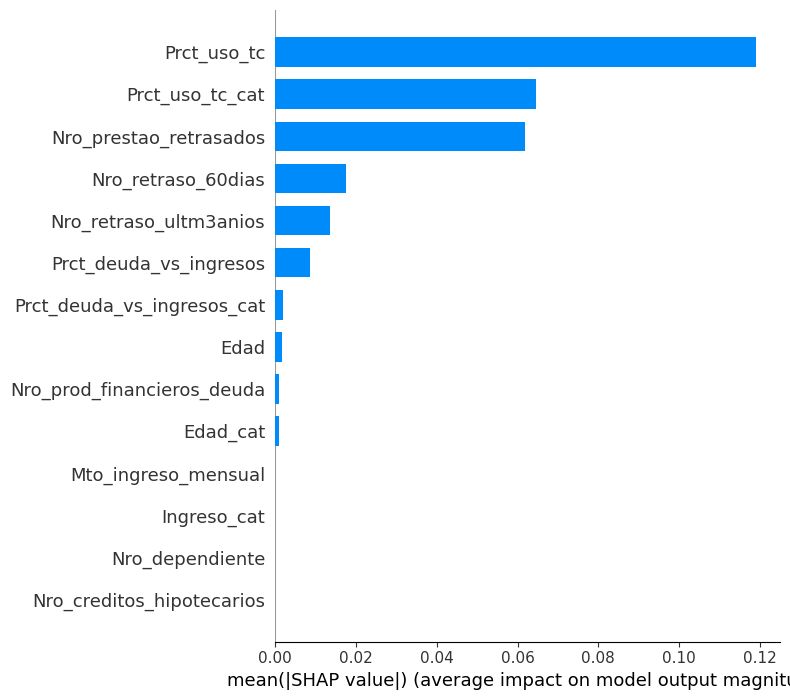

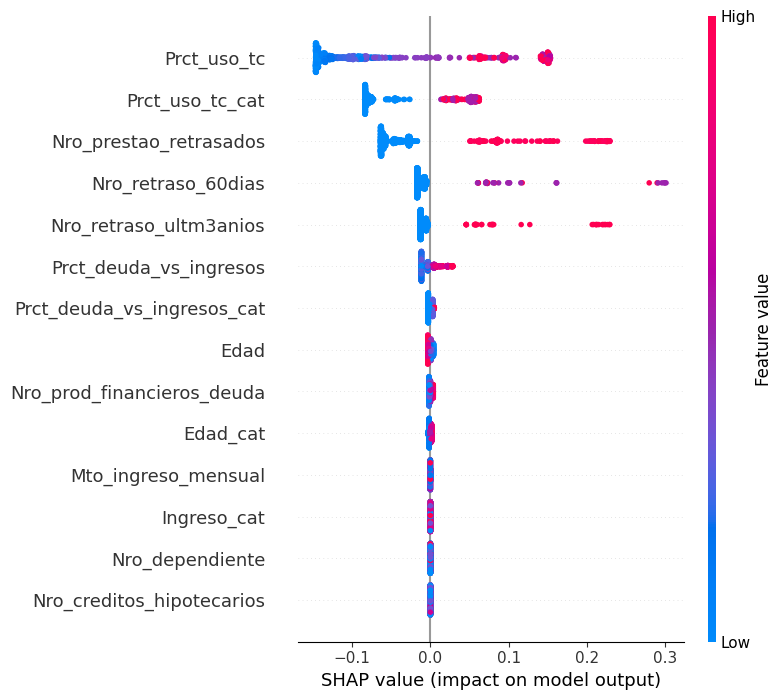

Waterfall


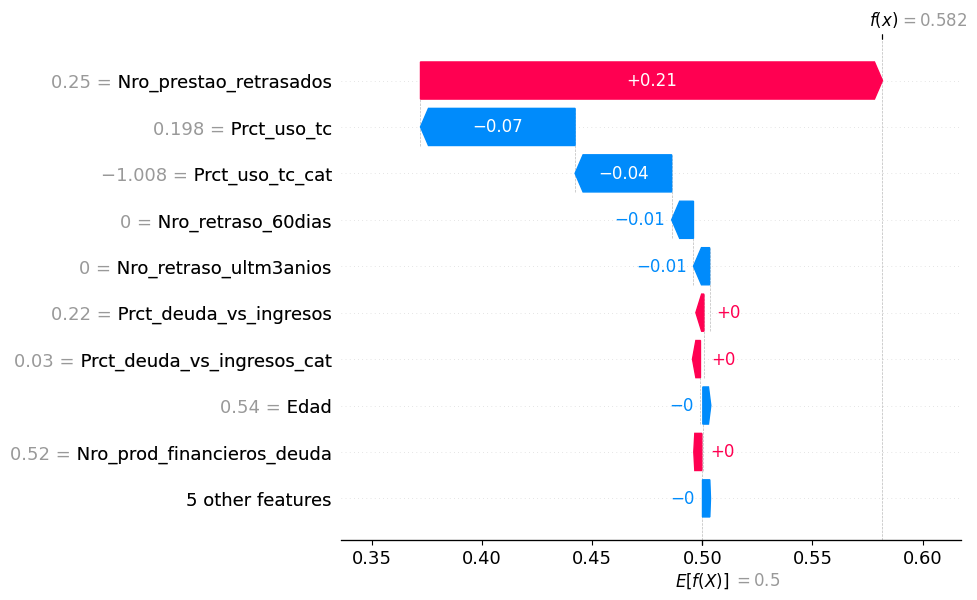

In [251]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Sample
np.random.seed(42)
sample_idx = np.random.choice(X_train_t5_woe.index, size=1000, replace=False)
X_sample = X_train_t5_woe.loc[sample_idx].reset_index(drop=True)

# TreeExplainer
explainer = shap.TreeExplainer(rf_best_ensamblado)
shap_values = explainer.shap_values(X_sample)

# EXTRAER LA CLASE 1 (default/PD) - Shape: (1000, 14)
shap_values_pd = shap_values[:, :, 1]  # ← AQUÍ está la corrección

print(f"shap_values_pd shape: {shap_values_pd.shape}")  # Debe ser (1000, 14)
print(f"X_sample shape: {X_sample.shape}")  # (1000, 14)

# Summary Plot - Ahora funciona
shap.summary_plot(shap_values_pd, X_sample, plot_type="bar")
plt.show()

# Summary Plot dispersión
shap.summary_plot(shap_values_pd, X_sample)
plt.show()

print("Waterfall")
# Waterfall para cliente 0
shap.plots.waterfall(shap.Explanation(
    values=shap_values_pd[0],
    base_values=explainer.expected_value[1],
    data=X_sample.iloc[0],
    feature_names=X_sample.columns.tolist()
))
plt.show()

# Force plot
shap.force_plot(
    explainer.expected_value[1],
    shap_values_pd[0],
    X_sample.iloc[0]
)

## 12. Valoración del modelo

### 12.1 Discriminación / Separación

In [254]:
from yellowbrick.classifier import ROCAUC

#### 12.1.1 Curva ROCAUC

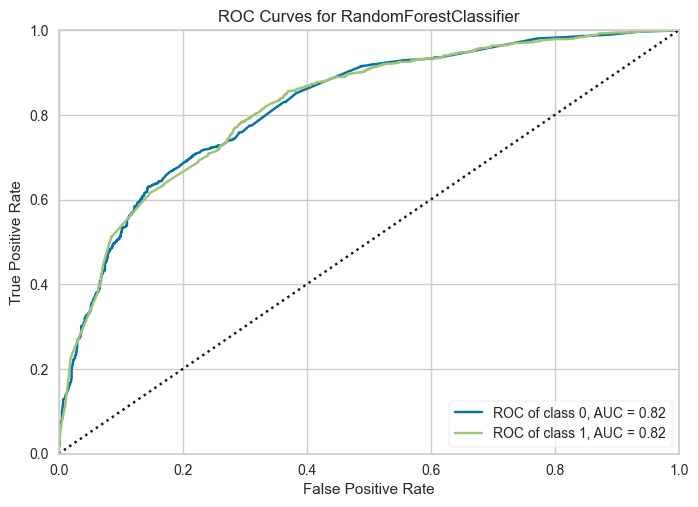

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [255]:
visualizer2 = ROCAUC(rf_best_ensamblado, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t5_woe, y_test)
visualizer2.score(X_test_t5_woe, y_test)
visualizer2.show()

#### 12.1.2 Grafico KS sobre el modelo
**Gráfico KS (Kolmogorov-Smirnov)**

¿Qué mide?

El **KS (Kolmogorov-Smirnov)** mide la **máxima separación entre la distribución de buenos y malos** según el score del modelo.

Es decir: ¿Qué tan bien el modelo **separa** a los clientes buenos de los malos?

---

Fórmula

$$ KS = \max(CDF_{malos} - CDF_{buenos}) $$

Donde:
- **CDF_malos** = Proporción acumulada de malos en cada score
- **CDF_buenos** = Proporción acumulada de buenos en cada score

---

Ejemplo Visual

In [269]:
pred_test_rf = rf_best_ensamblado.predict_proba(X_test_t5_woe)
pred_train_rf = rf_best_ensamblado.predict_proba(X_train_t5_woe)
tot_test_rf=pd.DataFrame(np.concatenate((np.array(y_test).reshape(-1, 1), pred_test_rf[:,1].reshape(-1, 1)), axis=1),columns=['Default','PD'])

In [258]:
tot_test_rf.head()

,Default,PD
0,1.0,0.661459
1,0.0,0.173159
2,0.0,0.439635
3,0.0,0.156232
4,0.0,0.206165


In [259]:
def calcular_ks(data: pd.DataFrame, score_col: str, target_col: str) -> tuple:
    data = data.sort_values(score_col)

    total_goods = data[target_col].value_counts().get(0, 0)
    total_bads = data[target_col].value_counts().get(1, 0)

    data['cum_goods'] = (data[target_col] == 0).cumsum()
    data['cum_bads'] = (data[target_col] == 1).cumsum()

    data['cum_goods_pct'] = data['cum_goods'] / total_goods if total_goods > 0 else 0
    data['cum_bads_pct'] = data['cum_bads'] / total_bads if total_bads > 0 else 0

    data['ks_diff'] = data['cum_goods_pct'] - data['cum_bads_pct']

    ks_value = data['ks_diff'].abs().max()
    ks_pd = data.loc[data['ks_diff'].abs().idxmax(), score_col]

    return ks_value, ks_pd, data

In [260]:
ks_value , ks_pd, data = calcular_ks(tot_test_rf, 'PD', 'Default')
print(f"Estadístico K-S: {ks_value:.4f}")
print(f"PD donde se alcanza el K-S máximo: {ks_pd:.4f}")

Estadístico K-S: 0.4885
PD donde se alcanza el K-S máximo: 0.5961


### 12.2 Clasificación
Porcentaje de predicciones correctas

In [262]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [263]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, Model test:',  balanced_accuracy_score(y_test,rf_best_ensamblado.predict(X_test_t5_woe)))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, Model test: 0.7372038720974088


**¿Como está prediciendo el modelo?**

In [267]:
preds_1 = pd.DataFrame(rf_best_ensamblado.predict(X_test_t5_woe), columns = ['loan_status'])
preds_1.value_counts()

loan_status
0              10680
1               7597
Name: count, dtype: int64

In [268]:
preds_2 = pd.DataFrame(rf_best_ensamblado.predict_proba(X_test_t5_woe)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.15 else 0)
preds_2['loan_status'].value_counts()

loan_status
1    18277
Name: count, dtype: int64

In [270]:
from sklearn.metrics import f1_score, precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, pred_train_rf[:,1])

In [272]:
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores

array([0.11211004, 0.11329303, 0.11399815, ..., 0.11175258, 0.11065235,
       0.        ], shape=(10946,))

In [273]:
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

In [274]:
print(f"Umbral óptimo: {best_threshold}")
print(f"Mejor F1 Score: {best_f1_score}")

Umbral óptimo: 0.6706831227736402
Mejor F1 Score: 0.3549979765277216


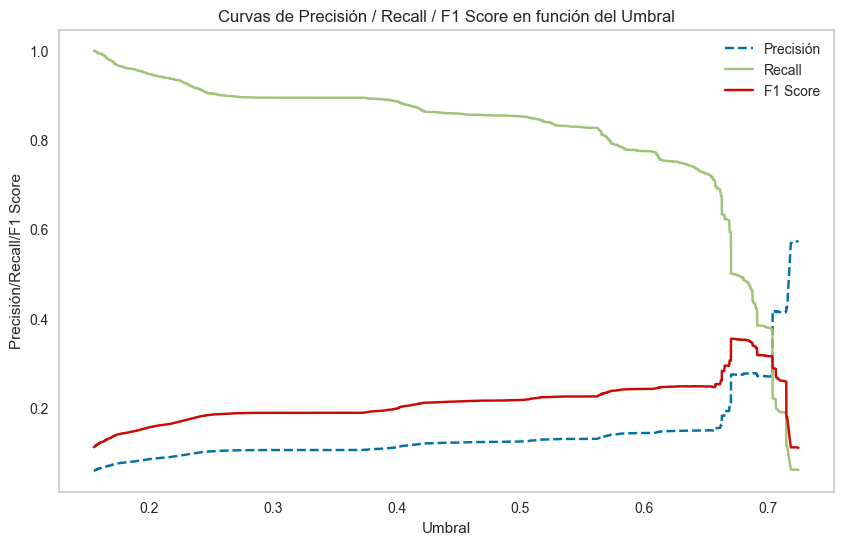

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precisión')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.xlabel('Umbral')
plt.ylabel('Precisión/Recall/F1 Score')
plt.title('Curvas de Precisión / Recall / F1 Score en función del Umbral')
plt.legend(loc='best')
plt.grid()
plt.show()

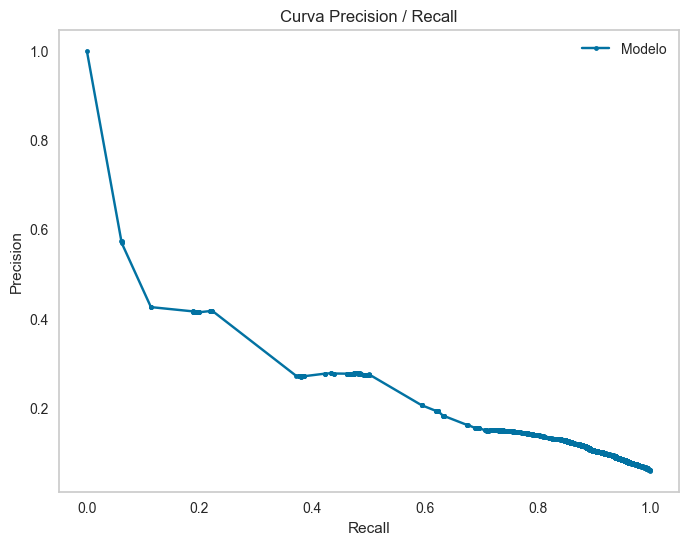

In [276]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Modelo')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision / Recall')
plt.legend(loc='best')
plt.grid()
plt.show()

## 13. Calibración

**Test de Hosmer-Lemeshow**
Mide qué tan bien las probabilidades predichas por el modelo coinciden con las probabilidades observadas en los datos reales.
En otras palabras, verifica si el modelo está bien calibrado:

¿Las probabilidades que predice (por ejemplo, 0.2, 0.7, 0.9) reflejan realmente la frecuencia observada de eventos?

In [282]:
df = pd.DataFrame({'prob': pred_test_rf[:,1], 'observed': y_test})
df = df.sort_values('prob')
df['bin'] = pd.qcut(df['prob'], 10, duplicates='drop')
df

,prob,observed,bin
20531,0.155388,0,"(0.154, 0.161]"
93653,0.155388,0,"(0.154, 0.161]"
53833,0.155388,0,"(0.154, 0.161]"
55550,0.155388,0,"(0.154, 0.161]"
134666,0.155388,0,"(0.154, 0.161]"
...,...,...,...
55818,0.724796,0,"(0.688, 0.725]"
109205,0.724796,0,"(0.688, 0.725]"
83569,0.724796,1,"(0.688, 0.725]"
34920,0.724796,0,"(0.688, 0.725]"


In [283]:
grouped = df.groupby('bin').agg(
    total_count=('observed', 'count'),
    actual_default=('observed', 'sum'),
    bad_rate=('prob', 'mean')).reset_index()
grouped["expected_count"] = grouped["total_count"] * grouped["bad_rate"]

In [284]:
# Test de Hosmer Lemeshow
def hosmer_lemeshow_test(y_true, y_prob, n_bins=10):
    """
    Realiza el test de Hosmer-Lemeshow para evaluar el ajuste de un modelo de regresión logística.

    Parámetros:
    - y_true: valores reales de la variable objetivo
    - y_prob: probabilidades predichas por el modelo
    - num_bins: número de grupos para la prueba

    Retorna:
    - chi2_stat: estadístico de Hosmer-Lemeshow
    - p_value: valor p asociado
    """
    df = pd.DataFrame({'prob': y_prob, 'observed': y_true})

    df = df.sort_values('prob')

    df['bin'] = pd.qcut(df['prob'], 10, duplicates='drop')

    grouped = df.groupby('bin').agg(
        total_count=('observed', 'count'),
        actual_default=('observed', 'sum'),
        bad_rate=('prob', 'mean')
    ).reset_index()

    grouped["expected_default"] = grouped["total_count"] * grouped["bad_rate"]

    chi2_stat = ((grouped['actual_default'] - grouped['expected_default']) ** 2 / grouped['expected_default']).sum()

    from scipy.stats import chi2

    dof = len(grouped) - 2
    p_value = 1 - chi2.cdf(chi2_stat, df=8)

    print(f'Estadístico de Hosmer-Lemeshow: {chi2_stat:.4f}')
    print(f'Valor p: {p_value:.4f}')

    if p_value < 0.05:
        print("El modelo NO se ajusta bien a los datos (rechazamos H0).")
    else:
        print("El modelo se ajusta bien a los datos.")

In [286]:
hosmer_lemeshow_test(y_test, pred_test_rf[:,1])

Estadístico de Hosmer-Lemeshow: 5392.9068
Valor p: 0.0000
El modelo NO se ajusta bien a los datos (rechazamos H0).


### 13.1 **Curvas de Calibración / Brier Score**

In [287]:
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, pred_test_rf[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

(7, 7)

In [288]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Gradient Boosting')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('PDs')
    plt.ylabel('RDs')
    plt.title('Curva de Calibración')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('PDs')
    plt.ylabel('RDs')
    plt.title('Densidad')
    plt.show()

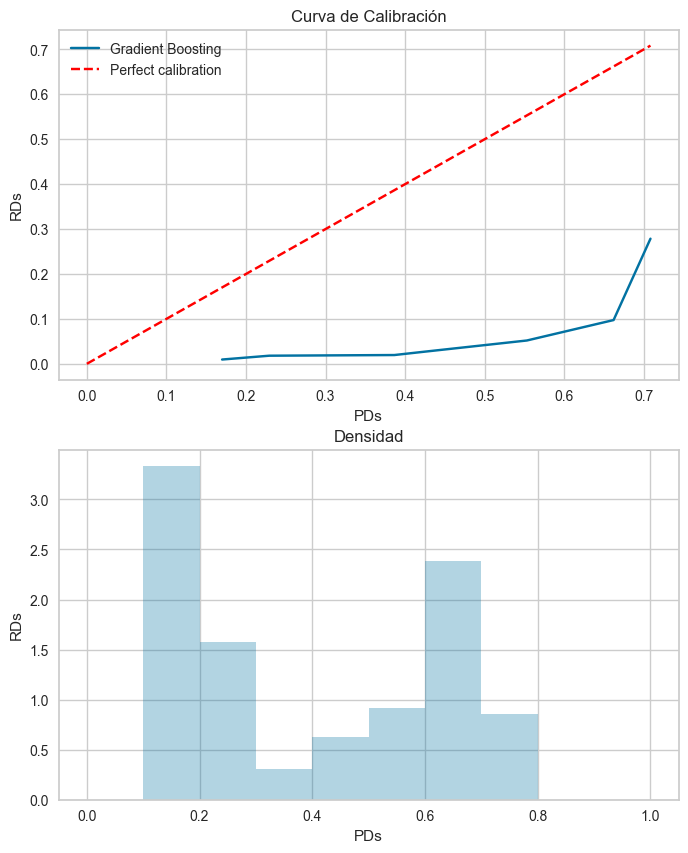

In [289]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_rf[:, 1], bins=10, strategy='uniform')

In [290]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, pred_test_rf[:, 1])

0.19523461743392237

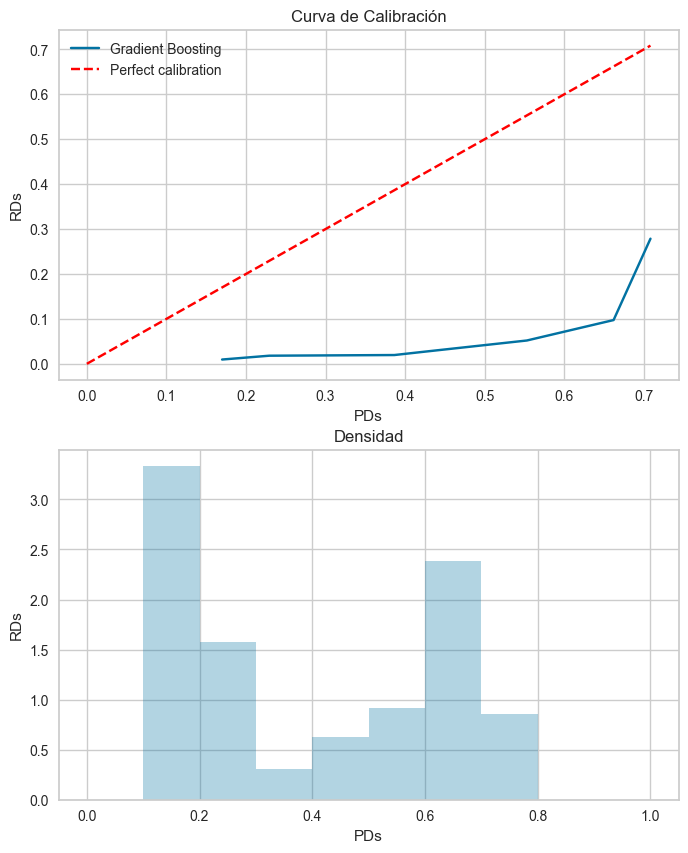

In [296]:
# Modelo con Oversampling
plot_calibration_curve(y_test, pred_test_rf[:, 1], bins=10, strategy='uniform')

In [293]:
brier_score_loss(y_test, pred_test_rf[:, 1])

0.19523461743392237

### 13.2 Planteamos dos métodos

In [294]:
from sklearn.calibration import CalibratedClassifierCV

In [295]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(rf_best_ensamblado, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t5_woe, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t5_woe)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(rf_best_ensamblado, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t5_woe, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t5_woe)[:, 1]

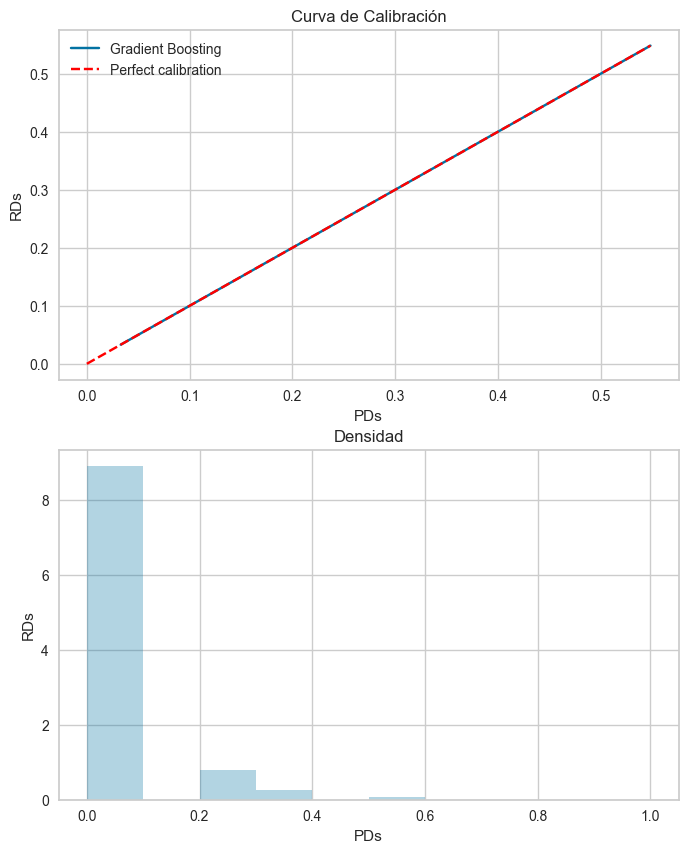

Test set
GBC roc-auc: 0.8206028381540516
Test set con Calibrado
GBC roc-auc: 0.8253376453714457
Test set
Brier Score: 0.19523461743392237
Test set con Calibrado
Brier Score: 0.04868128942067364


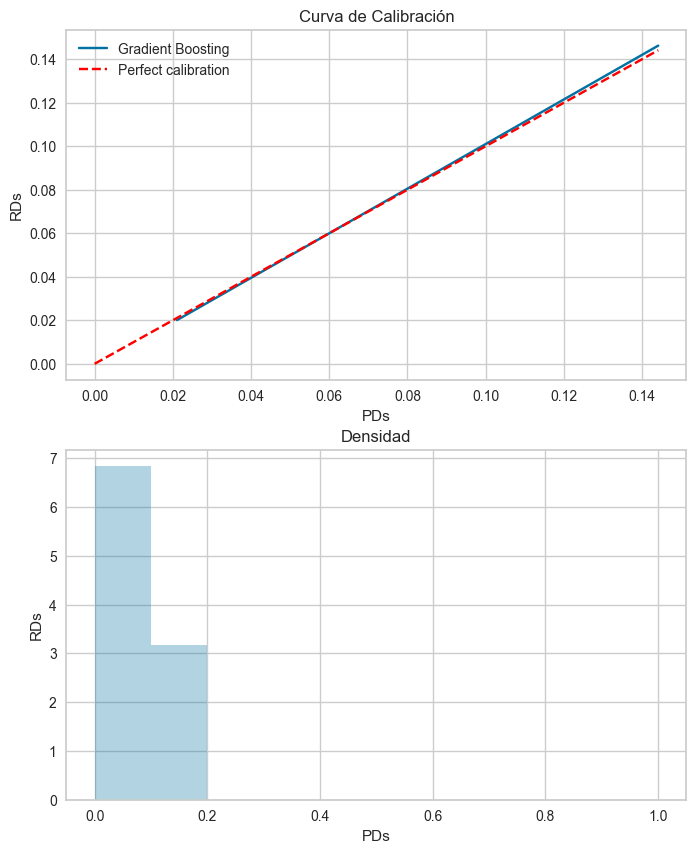

Test set
GBC roc-auc: 0.8206028381540516
Test set con Calibrado
GBC roc-auc: 0.8206028381540516
Test set
Brier Score: 0.19523461743392237
Test set con Calibrado
Brier Score: 0.051944520955082917


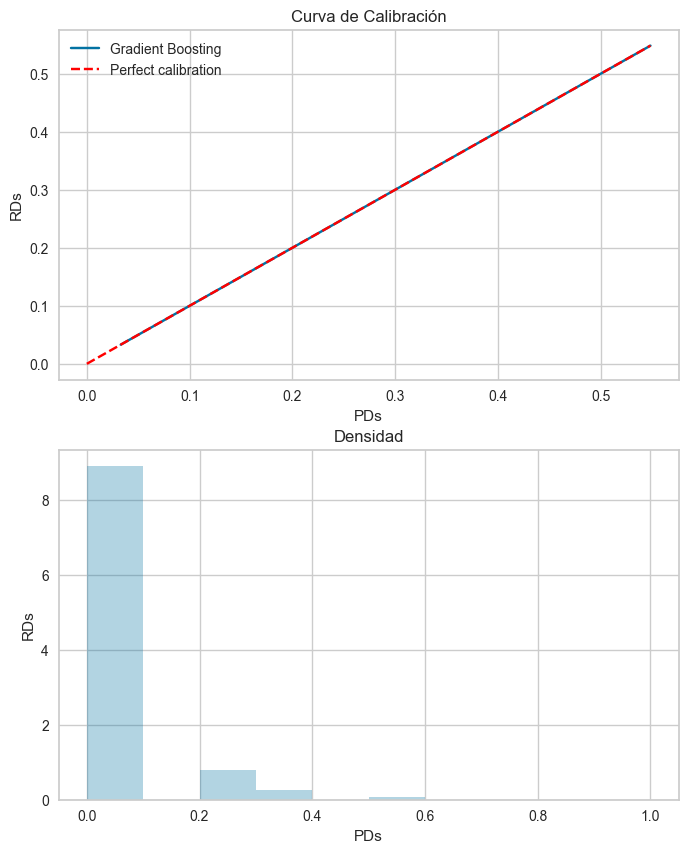

Test set
GBC roc-auc: 0.8206028381540516
Test set con Calibrado
GBC roc-auc: 0.8253376453714457
Test set
Brier Score: 0.19523461743392237
Test set con Calibrado
Brier Score: 0.04868128942067364


In [297]:
##### Ahora revisemos la calibración isotónica

plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

# Sobre el modelo balanceado por oversampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(rf_best_ensamblado, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_t5_woe, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_t5_woe)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(rf_best_ensamblado, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_t5_woe, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_t5_woe)[:, 1]

# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_rf[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

## 14. Resultado general

In [298]:
cal_sigmoid2

,estimator,RandomForestC...andom_state=0)
,method,'sigmoid'
,cv,'prefit'
,n_jobs,None
,ensemble,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,0.3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [299]:
joblib.dump(cal_sigmoid2, os.path.join(ruta_resultados, "rf_best_ensamblado_calibrado.pkl"))

['.\\Resultados\\rf_best_ensamblado_calibrado.pkl']